In [ ]:
# reading data with panda
import pandas as pd

df = pd.read_csv("data/ethanol_IR.csv")
df.head(10)

X = df.values
X.shape

In [ ]:
#plotting data in python with matplotlib
import pylab as plt
plt.style.use('../settings/plot_style.mplstyle')
x = X[:,0] #take the first column as independent variable
y = X[:,1] #take the second column as dependent variable
fig, ax = plt.subplots(figsize=(10, 5)) #create a new figure object (fig) with an associated axis object (ax)
ax.plot(x,y,marker='o', ls='none')
ax.set_xlabel('Wavenumber [cm$^{-1}$]')
ax.set_ylabel('Absorbance [unitless]');

In [ ]:
# numpy array copying
import numpy as np
A = np.array([[1., 2., 3.],[4., 5., 6.],[7., 8., 9.]])
print(A)
b = A[0,:]
print(b)
b[0] = 10
print(b)
print(A)

In [ ]:
#Linear Algebra
#Matrix-vector multiplication 
A  = np.array([[0, 1], [2, 3]])
B = np.array([0, 1])

for i in range(A.shape[0]):
    sum = 0
    for j in range(A.shape[1]):
        sum += A[i][j] * B[j]
    print(sum)


In [ ]:
import numpy as np
import pylab as plt
plt.style.use('../settings/plot_style.mplstyle')

xi = np.linspace(0,10,11)
xi
zi = xi**2
zi
wj = [1.5, 0.8, -0.2]

yi = wj[0] + wj[1]*xi + wj[2]*zi

fig, ax = plt.subplots()

ax.plot(xi, yi, '--o')
ax.set_xlabel('$x_i$')
ax.set_ylabel('$y_i$');

In [ ]:
print("x_i vector shape: {}".format(xi.shape))
#xi_col = xi.reshape((xi.shape[0], 1)) #<- here we "reshape" the matrix into a column
xi_col = xi.reshape(-1, 1) #<- this is equivalent, but less clear. It is a common shortcut.
print("x_i column shape: {}".format(xi_col.shape))

xi = xi_col
X_vdm = np.hstack((xi**0, xi**1, xi**2))
X_vdm

#Next we can directly create $y_i$ using matrix-vector multiplication based on the definition of matrix-vector multiplication:
yi_vdm = X_vdm@wj
fig, ax = plt.subplots()
ax.plot(xi, yi_vdm, '--o');

#We can verify that they are equal:
yi == yi_vdm

#Sometimes it is also useful to use isclose instead of == since numerical methods are prone to very small errors:
np.isclose(yi, yi_vdm)

#The .all() method is a good way to confirm that all values are equal:
M = np.isclose(yi, yi_vdm)
M.all()


In [ ]:
#Ranks/invers/linear systems

In [1]:
#A matrix is invertible if and only if it is a square, full-rank matrix. 
#This is equivalent to saying that a system of equations can only be solved ($\vec{x} = \bar{\bar{A}}^{-1}\vec{b}$) 
#if the number of equations is equal to the number of unknowns (square matrix) and no equations are redundant (full-rank).

In [ ]:
A = X_vdm[1:4, :]
b = yi[1:4]

print('Shape of A: {}'.format(A.shape))
print('Rank of A: {}'.format(np.linalg.matrix_rank(A)))

A_inv = np.linalg.inv(A)
w = A_inv@b

print('Weights: {}'.format(w))

In [ ]:
#Eigen and Singular Value Decompositions¶
#To calculate eigenvalues of a matrix,
#use the eigvals function, and for calculating both eigenvalues and eigenvectors, use the function eig:

In [3]:
import numpy as np
from numpy.linalg import eigvals, eig
A = np.array([[0, 1], [2, 3]])
print('Eigenvalues of A: {}'.format(eigvals(A)))

vals, vecs = eig(A)
print('Eigenvectors of A: {}'.format(vecs))

np.isclose(vals, eigvals(A))

Eigenvalues of A: [-0.56155281  3.56155281]
Eigenvectors of A: [[-0.87192821 -0.27032301]
 [ 0.48963374 -0.96276969]]


array([ True,  True])

In [5]:
#The eigenvectors of a symmetric matrix will always be orthonormal:
A_sym = (A.T + A)/2. #make A symmetric
vals, vecs = eig(A_sym)

vec0 = vecs[:,0]
vec1 = vecs[:,1]

np.isclose(vec0@vec1,0)


True

In [7]:
#Eigendecomposition is only possible for a square matrix.
#However, there is a similar concept called a "singular value decomposition", or SVD, that will work for any matrix:
from numpy.linalg import svd
vecsL, vals, vecsR = svd(A_sym)
np.isclose(vecsR[1,:], vecs[:,1])


array([False, False])

In [ ]:
#The advantage of the SVD is that it will also work for non-square matrices:
vecsL, vals, vecsR = svd(X_vdm)

print('Original matrix shape: {}'.format(X_vdm.shape))
print('Left singular vectors shape: {}'.format(vecsL.shape))
print('Right singular vectors shape: {}'.format(vecsR.shape))
print('Singular Values: {}'.format(vals))

Topic3-Linear_Regression.ipynb

#Linear Regression
#Simple linear regression
#If you recall the Vandermonde matrix, this can be written as:

$\vec{y} = \bar{\bar{X}}\vec{w} + \vec{\epsilon}$

In [ ]:
A = X.T@X
b = X.T@y
w_lsr = np.linalg.solve(A,b)
print('Weights from least-squares regression: {}'.format(w_lsr))
print('Original weights to generate data: {}'.format(w))

In [ ]:
yhat = X@w_lsr
fig, ax = plt.subplots()
ax.plot(x, y, 'o')
ax.plot(x, yhat, '--')
ax.plot(x, X@w, '--');

In [ ]:
#

def vandermonde(x, order):
    cols = []
    for i in range(order):
        cols.append(x**i)
    return np.hstack(cols)

X_vdm = vandermonde(x,4)
X_vdm

In [ ]:
order = 9
X_vdm = vandermonde(x, order)
A = X_vdm.T@X_vdm
b = X_vdm.T@y
w_lsr = np.linalg.solve(A,b)

print('Weights: {}'.format(w_lsr))

yhat = X_vdm@w_lsr
SSE = sum((y - yhat)**2)
print('Sum of Squared Errors (g): {}'.format(SSE))

fig, ax = plt.subplots()
ax.plot(x, y, 'o')
ax.plot(x, yhat, '--*');

We just saw that a model of the form:

$\vec{y} = \bar{\bar{X}}\vec{w} + \vec{\epsilon}$

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('data/ethanol_IR.csv')
x_all = df['wavenumber [cm^-1]'].values
y_all = df['absorbance'].values

fig, ax = plt.subplots()
ax.plot(x_all,y_all)
ax.set_xlabel('wavenumber [cm^-1]')
ax.set_ylabel('absorbance');

In [ ]:
#Let's see what happens if we try to fit this with 
#the polynomials from before:

m = 20

x_peak = x_peak.reshape(-1, 1) #create a column vector
X_vdm = vandermonde(x_peak, m) #generate Vandermonde matrix
b_m = np.dot(X_vdm.T, y_peak) #generate b vector with new features
A_m = np.dot(X_vdm.T, X_vdm) #generate A matrix with new features
w_m = np.linalg.solve(A_m, b_m) #solve Ax=b with new features
print('Weights: {}'.format(w_m))

yhat_m = np.dot(X_vdm, w_m) #compute predictions
SSE_m = np.sum((y_peak - yhat_m)**2) #compute sum of squared errors
print('Sum of Squared Errors: {}'.format(SSE_m))

fig, ax = plt.subplots()
ax.plot(x_peak, y_peak, 'o')
ax.plot(x_peak, yhat_m, '--')
ax.set_xlabel('wavenumber [cm^-1]')
ax.set_ylabel('absorbance');

In [ ]:
# Gaussian fit of two peaks 
# yi=wpexp(-(xi-2900)/2*25wavenumber)+w1exp(-(xi-2980)/2*25wavenumber)

x_peak = x_peak.reshape(-1) #convert x_peak back into a vector
X_gauss = np.zeros((len(x_peak), 2))
X_gauss[:,0] = np.exp(-(x_peak - 2900)**2/(2*(25**2)))
X_gauss[:,1] = np.exp(-(x_peak - 2980)**2/(2*(25**2)))

fig, ax = plt.subplots()
ax.plot(x_peak, X_gauss[:,0])
ax.plot(x_peak, X_gauss[:,1])
ax.plot(x_peak, y_peak, 'o')
ax.set_xlabel('wavenumber [cm^-1]')
ax.set_ylabel('absorbance');

In [ ]:
# find the weights that best match the data from 
#the above basic vectors 
A = X_gauss.T@X_gauss
b = X_gauss.T@y_peak
w_lsr = np.linalg.solve(A,b)
yhat = X_gauss@w_lsr
print('Weights from least-squares regression: {}'.format(w_lsr))

fig, ax = plt.subplots()
ax.plot(x_peak, yhat, '--')
ax.plot(x_peak, y_peak, 'o')
ax.set_xlabel('wavenumber [cm^-1]')
ax.set_ylabel('absorbance');

In [ ]:
#Use a set number of Gaussians with a fixed standard deviation
#with even space 
def gaussian_features(x, N , sigma = 25):
    # x is a vector
    # sigma is the standard deviation
    x = x.reshape(-1) #ensure that x is a vector
    xk_vec = np.linspace(min(x), max(x), N)
    features = []
    for xk in xk_vec:
        features.append(np.exp(-((x - xk)**2/(2*sigma**2))))
    return np.array(features).T

In [ ]:
#Now we can use the gaussian_features function 
#similarly to the vandermonde function to create a matrix $\bar{\bar{X}}$ for our general linear model:
m = 12

X_gauss = gaussian_features(x_peak, m) #generate Vandermonde matrix
b_m = np.dot(X_gauss.T, y_peak) #generate b vector with new features
A_m = np.dot(X_gauss.T, X_gauss) #generate A matrix with new features
w_m = np.linalg.solve(A_m, b_m) #solve Ax=b with new features
print('Weights: {}'.format(w_m))

yhat_m = np.dot(X_gauss, w_m) #compute predictions
SSE_m = np.sum((y_peak - yhat_m)**2) #compute sum of squared errors
print('Sum of Squared Errors: {}'.format(SSE_m))

fig, ax = plt.subplots()
ax.plot(x_peak, y_peak, 'o')
ax.plot(x_peak, yhat_m, '--')
ax.set_xlabel('wavenumber [cm^-1]')
ax.set_ylabel('absorbance');
Weights: [ 0.00618991  0.0128318


Linear Regression in Scikit-Learn

In [ ]:
from sklearn.linear_model import LinearRegression

m = 12

X_m = gaussian_features(x_peak,m,sigma=25) #generate features

model = LinearRegression() #create a linear regression model instance

model.fit(X_m, y_peak) #fit the model (equivalent to the linear solve)

yhat = model.predict(X_m) #create the model prediction (equivalent to the matrix multiplication)

fig, ax = plt.subplots()
ax.plot(x_peak, y_peak, 'o')
ax.plot(x_peak, yhat, '--');

Numerical Optimization¶

linear regression:
yi=w0exp(-(xi-u0)/sigma^2)+w1*exp(-(xi-u1)/sigma^2)
nonlineaer regression:
yi=w0exp(-(xi-u0)/sigma^2)+w1*exp(-(xi-u1)/sigma^2)+epsilon 
introduct a new vector lambda=[w,u,sigma]
 In the case of linear regression, we derived this with matrix algebra then solved the resulting equations but that will be much more difficult in this case, and will not be general to other non-linear forms. Instead, we will use numerical methods this time around.

In [ ]:
#First, we need to implement our loss function, $g$, 
#which we will call gaussian_loss since it results from 
#a sum of $m$ Gaussians:
import numpy as np
def gaussian_loss(lamda, x, y, m=2):
    yhat = np.zeros(len(y))
    for i in range(m):
        w_i = lamda[i]
        mu_i = lamda[m+i]
        sigma_i = lamda[2*m+i]
        yhat = yhat + w_i*np.exp(-(x - mu_i)**2/(2*sigma_i**2))
    squared_error = (y - yhat)**2
    return np.sum(squared_error)/len(y)

In [ ]:
x = np.linspace(-1,1,20)
y = 0.3*np.exp((-(x-0.2)**2)/(2*(0.5**2))) #create a Gaussian with w=0.3, mu=0.2, sigma=0.5
y = y + 0.7*np.exp(-(x-0.5)**2/(2*0.1**2)) #add a Gaussian with w=0.7, mu=0.5, sigma=0.1
lamda = [0.3, 0.7, 0.2, 0.5, 0.5, 0.1] #create a "lamda" vector that should result in the same dataset
test_loss = gaussian_loss(lamda, x, y, m=2)
test_loss

Automatic Differentiation

In [ ]:
import autograd.numpy as np   # autograd has its own "version" of numpy that must be used
from autograd import grad # the "grad" function provides derivatives

def g(lamda, x=x, y=y, m=2):
    return gaussian_loss(lamda, x, y, m)

diff_g = grad(g)
print(g(lamda))
print(diff_g(lamda))
diff_g

bad_guess = [0.1, 1.0, 0.5, 0.3, 0.1, 0.4]
print(g(bad_guess))
print(diff_g(bad_guess))

Gradient Descent
   Gradient descent/ascent: Increase or decrease the guess by "walking" along the gradient.

These are typically "iterative" methods, which means we start with some initial guess then iteratively improve it.

The simplest approach is to use gradient descent with a fixed step size, which we will explore here:

In [ ]:
better_guess = [0.35, 0.75, 0.21, 0.52, 0.53, 0.11]
guess = bad_guess
print('Initial Loss: {:.4f}'.format(g(guess)))

N_iter = 1000
h = 0.1
for i in range(N_iter):
    guess = guess - h*np.array(diff_g(guess))
    
print('Final Loss: {:.4f}'.format(g(guess)))

Optimization with Scipy 

In [ ]:
from  scipy.optimize  import minimize

result = minimize(g, bad_guess, method='BFGS')
result

In [ ]:
guess = [0.545, 0.675, 2900, 2980, 25, 25]
y_guess = two_gaussians(guess, x_peak)

fig, ax = plt.subplots()
ax.plot(x_peak, y_peak)
ax.plot(x_peak, y_guess);

In [ ]:
def g(lamda, x=x_peak, y=y_peak, m=2):
    return gaussian_loss(lamda, x, y, m)

result = minimize(g, guess, method='BFGS')
result

fitted = result.x
y_fitted = two_gaussians(fitted, x_peak)

fig, ax = plt.subplots()
ax.plot(x_peak, y_peak)
ax.plot(x_peak, y_fitted);

We can also add constraints to the loss function. For example, we might expect that the peak width (standard deviation) should be similar for both peaks. We can enforce this by adding an additional term to the loss function:

In [ ]:
def g_simwidth(lamda, x=x_peak, y=y_peak, N=2):
    return gaussian_loss(lamda, x, y, N) + (lamda[-2] - lamda[-1])**2

result = minimize(g_simwidth, guess, method='BFGS')
fitted = result.x
y_fitted = two_gaussians(fitted, x_peak)

fig, ax = plt.subplots()
ax.plot(x_peak, y_peak)
ax.plot(x_peak, y_fitted);
result

Non-Parametric Models
A Machine-Learning Perspective on Regression¶

This number of parameters to include is called a hyperparameter. Hyperparameters control the complexity of the final model, and the parameters will depend on the hyperparameters, 

Machine learning differs from regular regression in that it seeks to optimize $\vec{\lambda}$ (parameter optimization), $\vec{\eta}$ (complexity optimization) in order to obtain a model that generalizes to new input data. Machine learning also sometimes involves selecting $\vec{x}$ (feature selection) or generating $\vec{x}$ from non-vectorized data such as text or images (feature generation).

Non-Parametric Models¶

We covered the basic math behind parameter optimization in the numerical methods module. The basic idea is to follow two steps:

Construct a loss function that quantifies how well your model fits the data

Minimize the loss function with respect to the model parameters

Linear Interpolation¶



In [ ]:

import numpy as np
import pandas as pd

df = pd.read_csv('data/ethanol_IR.csv')
x_all = df['wavenumber [cm^-1]'].values
y_all = df['absorbance'].values

x_peak = x_all[475:575]
y_peak = y_all[475:575]

fig, ax = plt.subplots()
ax.plot(x_peak,y_peak, '-', marker='.')
ax.set_xlabel('wavenumber [$cm^{-1}$]')
ax.set_ylabel('absorbance')
ax.set_title('IR spectra data');

The key is to use a basis of "piecewise linear" functions:

In [ ]:
def piecewise_linear(x):
    N = len(x)
    X = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            X[i,j] = max(0, x[i] - x[j])
    return X
            
X = piecewise_linear(x_peak)

fig, ax = plt.subplots()
ax.plot(x_peak, X[:,50], '-')
ax.set_xlabel('wavenumber [$cm^{-1}$]')
ax.set_title('piecewise linear function');

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False) 
#create a linear regression model instance (no intercept needed)
model.fit(X, y_peak) #fit the model
r2 = model.score(X, y_peak) #get the "score", which is equivalent to r^2

yhat = model.predict(X) #create the model prediction

fig, ax = plt.subplots()
ax.plot(x_peak, y_peak, '.')
ax.plot(x_peak, yhat, 'o', markerfacecolor='none')
ax.set_xlabel('wavenumber [$cm^{-1}$]')
ax.set_ylabel('absorbance')
ax.set_title('IR spectra data')
ax.legend(['Original Data', 'Linear Regression'])
print('r^2 = {}'.format(r2))

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False) 
#create a linear regression model instance (no intercept needed)
model.fit(X, y_peak) #fit the model
r2 = model.score(X, y_peak) #get the "score", which is equivalent to r^2

yhat = model.predict(X) #create the model prediction

fig, ax = plt.subplots()
ax.plot(x_peak, y_peak, '.')
ax.plot(x_peak, yhat, 'o', markerfacecolor='none')
ax.set_xlabel('wavenumber [$cm^{-1}$]')
ax.set_ylabel('absorbance')
ax.set_title('IR spectra data')
ax.legend(['Original Data', 'Linear Regression'])
print('r^2 = {}'.format(r2))

Kernel Regression 

where $f$ can be any function. The most commonly used kernel is the "radial basis function", or rbf kernel:


Let's follow the same procedure as before, but now we will use a "radial basis function":

In [ ]:
def rbf(x_train, x_test=None, gamma=1):
    if x_test is None:
        x_test = x_train
    N = len(x_test) #<- number of data points
    M = len(x_train) #<- number of features
    X = np.zeros((N,M))
    for i in range(N):
        for j in range(M):
            X[i,j] = np.exp(-gamma*(x_test[i] - x_train[j])**2)
    return X

sigma = 100
gamma = 1./(2*sigma**2)
x_test = np.linspace(min(x_peak), max(x_peak), 300)
X_rbf = rbf(x_peak, x_test=x_test, gamma=gamma)

fig, ax = plt.subplots()
ax.plot(x_test, X_rbf[:,50], '-')
ax.set_xlabel('wavenumber [$cm^{-1}$]')
ax.set_ylabel('absorbance')
ax.set_title('rbf basis $\sigma$ = {}'.format(str(sigma)));

In [ ]:
X_train = rbf(x_peak, gamma=gamma)

model_rbf = LinearRegression() #create a linear regression model instance
model_rbf.fit(X_train, y_peak) #fit the model
r2 = model_rbf.score(X_train, y_peak) #get the "score", which is equivalent to r^2
print('r^2 = {}'.format(r2))

X_test = rbf(x_peak, x_test=x_test, gamma=gamma)

yhat_rbf = model_rbf.predict(X_test) #create the model prediction

In [ ]:
spacing = 3
sigma = 10
gamma = 1./(2*sigma**2)

x_train = x_peak[::spacing]
y_train = y_peak[::spacing]

X_train = rbf(x_train, gamma=gamma)

model_rbf = LinearRegression() 
#create a linear regression model instance
model_rbf.fit(X_train, y_train) #fit the model
r2 = model_rbf.score(X_train, y_train) 
#get the "score", which is equivalent to r^2
print('r^2 training = {}'.format(r2))

X_all = rbf(x_train, x_test=x_peak, gamma=gamma)

yhat_rbf = model_rbf.predict(X_all) #create the model prediction

r2 = model_rbf.score(X_all, y_peak) #get the "score", which is equivalent to r^2
print('r^2 testing = {}'.format(r2))

In [ ]:
def rbf(x_train, x_test=None, gamma=1):
    if x_test is None:
        x_test = x_train
    N = len(x_test) #<- number of data points
    M = len(x_train) #<- number of features
    X = np.zeros((N,M))
    for i in range(N):
        for j in range(M):
            X[i,j] = np.exp(-gamma*(x_test[i] - x_train[j])**2)
    return X

sigma = 100
gamma = 1./(2*sigma**2)
x_test = np.linspace(min(x_peak), max(x_peak), 300)
X_rbf = rbf(x_peak, x_test=x_test, gamma=gamma)


In [ ]:
X_train = rbf(x_peak, gamma=gamma)

model_rbf = LinearRegression() #create a linear regression model instance
model_rbf.fit(X_train, y_peak) #fit the model
r2 = model_rbf.score(X_train, y_peak)
#get the "score", which is equivalent to r^2
print('r^2 = {}'.format(r2))

X_test = rbf(x_peak, x_test=x_test, gamma=gamma)

yhat_rbf = model_rbf.predict(X_test) #create the model prediction

In [ ]:
# use fewer inital training points 
spacing = 3
sigma = 10
gamma = 1./(2*sigma**2)

x_train = x_peak[::spacing]
y_train = y_peak[::spacing]

X_train = rbf(x_train, gamma=gamma)

model_rbf = LinearRegression() #create a linear regression model instance
model_rbf.fit(X_train, y_train) #fit the model
r2 = model_rbf.score(X_train, y_train) #get the "score", which is equivalent to r^2
print('r^2 training = {}'.format(r2))

X_all = rbf(x_train, x_test=x_peak, gamma=gamma)

yhat_rbf = model_rbf.predict(X_all) #create the model prediction

r2 = model_rbf.score(X_all, y_peak) #get the "score", which is equivalent to r^2
print('r^2 testing = {}'.format(r2))
fig, ax = plt.subplots()
ax.plot(x_peak, y_peak, 'o', markerfacecolor='none')
ax.plot(x_train, y_train, 'o')
ax.plot(x_peak, yhat_rbf, '-')
ax.set_xlabel('wavenumber [$cm^{-1}$]')
ax.set_ylabel('absorbance')
ax.set_title('kernel regression with fewer points')
ax.legend(['Original Data', 'Training Data', 'Linear Regression'])
plt.show()

Regression-Topic 2 Model_validation

#### Mean absolute error (MAE)



#### Root-mean-sqaured error (RMSE)
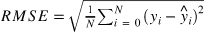

#### Parity plots
Plotting $y$ vs. $\hat{y}$ provides a visual analysis of the error. This can be particularly useful if your model is highly non-linear or has more than one input variable:

In [ ]:
fig, ax = plt.subplots(figsize = (7, 6))
yhat = m * x + b
ax.plot(x, y1, 'o')
ax.plot(x, yhat, ls = '-')
ax.plot([min(x), max(x)], [np.mean(y1), np.mean(y1)], '--')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Dataset 1')
ax.legend(['Original Data', 'Linear Regression', 'Mean of y'])
plt.show()


#### Error Histogram
You can create a histogram of the error between the model and the actual data. This can provide insight into whether the error is normally distributed or not.

In [ ]:
fig, ax = plt.subplots()
yhat = m * x + b
ax.hist(y1 - yhat, bins = 10)
ax.set_xlabel('error')
ax.set_ylabel('count')
ax.set_title('Error Histogram')
plt.show()

homoscedastic: the standard deviation of the Gaussian distribution does not depend on the independent variable.


fig, axes = plt.subplots(1, 2, figsize=(10, 4.5))
x_new = np.linspace(1, 10, 110)
yhat_new = m*x_new + b
noise = np.random.normal(size = len(x_new), loc = 0, scale = 1)
y_homoscedastic = yhat_new + noise
y_heteroscedastic = yhat_new + noise * x_new * 0.1

axes[0].plot(x_new, y_homoscedastic, 'o')
axes[0].set_title('Homoscedastic')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')

axes[1].plot(x_new, y_heteroscedastic, 'o')
axes[1].set_title('Heteroscedastic')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')



Cross Validation

There are many strategies for cross-validation:

hold-out: randomly leave out a percentage (usually ~30%) of the data during training.
k-fold: select k (usually 3-5) randomly-assigned sub-groups of data, and train k times holding each group out.
leave p out: leave p (usually 1) samples out of the training and assess the error for the p that were left out. Repeat for all possible p subsets of the sample.
bootstrapping: random selection with replacement to generate a sample of the same size as the original dataset, with a number of repetitions.

Hold out cross validation¶


In [ ]:
# read csv data
import pandas as pd

df = pd.read_csv('data/ethanol_IR.csv')
x_all = df['wavenumber [cm^-1]'].values
y_all = df['absorbance'].values

x_peak = x_all[475:575]
y_peak = y_all[475:575]

fig, ax = plt.subplots()
ax.plot(x_peak,y_peak, '-', marker='.')
ax.set_xlabel('wavenumber [$cm^-1$]')
ax.set_ylabel('absorbance');

In [ ]:
# RBF kernel regression
def rbf(x_train, x_test=None, gamma=1):
    if x_test is None:
        x_test = x_train
    N = len(x_test) #<- number of data points
    M = len(x_train) #<- number of features
    X = np.zeros((N,M))
    for i in range(N):
        for j in range(M):
            X[i,j] = np.exp(-gamma*(x_test[i] - x_train[j])**2)
    return X

In [ ]:
# determine the width of the kernels 
from sklearn.linear_model import LinearRegression

spacing = 3
sigma = 10
gamma = 1. / 2 / sigma**2

x_train = x_peak[::spacing]
y_train = y_peak[::spacing]

X_train = rbf(x_train, gamma=gamma)

model_rbf = LinearRegression() #create a linear regression model instance
model_rbf.fit(X_train, y_train) #fit the model
r2 = model_rbf.score(X_train, y_train) #get the "score", which is equivalent to r^2
print('r^2 training = {}'.format(r2))

X_all = rbf(x_train, x_test=x_peak, gamma=gamma)

yhat_rbf = model_rbf.predict(X_all) #create the model prediction

r2 = model_rbf.score(X_all, y_peak) #get the "score", which is equivalent to r^2
print('r^2 testing = {}'.format(r2))

fig, ax = plt.subplots()
ax.plot(x_peak, y_peak, 'o', markerfacecolor='none')
ax.plot(x_train, y_train, 'o')
ax.plot(x_peak, yhat_rbf, '-')
ax.set_xlabel('wavenumber [$cm^{-1}$]')
ax.set_ylabel('absorbance')
ax.legend(['Original Data', 'Training Set', 'Linear Regression'])

plt.show()

In [ ]:
# use scikit-learn to randomly select some subset for training
from sklearn.model_selection import train_test_split
np.random.seed(0) #makes this cell run the same every time
# to make sure everytime it is the same train/same test

x_train, x_test, y_train, y_test = train_test_split(x_peak, y_peak, test_size=0.4)

fig, ax = plt.subplots()

ax.plot(x_train, y_train, 'o')
ax.plot(x_test, y_test, 'o', markerfacecolor='none')
ax.set_xlabel('wavenumber [$cm^-1$]')
ax.set_ylabel('absorbance')
ax.legend(['Training Set', 'Testing Set']);

In [ ]:
sigma = 5
gamma = 1. / 2 / sigma**2

X_train = rbf(x_train, gamma=gamma)

model_rbf = LinearRegression() #create a linear regression model instance
model_rbf.fit(X_train, y_train) #fit the model
r2 = model_rbf.score(X_train, y_train) #get the "score", which is equivalent to r^2
print('r^2 training = {}'.format(r2))

X_test = rbf(x_train, x_test=x_test, gamma=gamma)

yhat_rbf = model_rbf.predict(X_test) #create the model prediction

r2 = model_rbf.score(X_test, y_test) #get the "score", which is equivalent to r^2
print('r^2 testing = {}'.format(r2))


In [ ]:
# plot out the partity plot and the model performs very poorly.
fig, ax = plt.subplots()

ax.plot(y_test, yhat_rbf, 'o')
ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
ax.set_xlabel("Actual Value")
ax.set_ylabel("Predicted Value");

Cross Validation¶

hold-out: randomly leave out a percentage (usually ~30%) of the data during training.
k-fold: select k (usually 3-5) randomly-assigned sub-groups of data, and train k times holding each group out.
leave p out: leave p (usually 1) samples out of the training and assess the error for the p that were left out. Repeat for all possible p subsets of the sample.
bootstrapping: random selection with replacement to generate a sample of the same size as the original dataset, with a number of repetitions.

In [ ]:
#Hold out cross validation¶

import pandas as pd

df = pd.read_csv('data/ethanol_IR.csv')
x_all = df['wavenumber [cm^-1]'].values
y_all = df['absorbance'].values

x_peak = x_all[475:575]
y_peak = y_all[475:575]

fig, ax = plt.subplots()
ax.plot(x_peak,y_peak, '-', marker='.')
ax.set_xlabel('wavenumber [$cm^-1$]')
ax.set_ylabel('absorbance');

In [ ]:
#We will start by looking at the case of regression with "radial basis function" kernels:
def rbf(x_train, x_test=None, gamma=1):
    if x_test is None:
        x_test = x_train
    N = len(x_test) #<- number of data points
    M = len(x_train) #<- number of features
    X = np.zeros((N,M))
    for i in range(N):
        for j in range(M):
            X[i,j] = np.exp(-gamma*(x_test[i] - x_train[j])**2)
    return X

In [ ]:
#determine the width of the kernels:
from sklearn.linear_model import LinearRegression

spacing = 3
sigma = 10
gamma = 1. / 2 / sigma**2

x_train = x_peak[::spacing]
y_train = y_peak[::spacing]

X_train = rbf(x_train, gamma=gamma)

model_rbf = LinearRegression() #create a linear regression model instance
model_rbf.fit(X_train, y_train) #fit the model
r2 = model_rbf.score(X_train, y_train) #get the "score", which is equivalent to r^2
print('r^2 training = {}'.format(r2))

X_all = rbf(x_train, x_test=x_peak, gamma=gamma)

yhat_rbf = model_rbf.predict(X_all) #create the model prediction

r2 = model_rbf.score(X_all, y_peak) #get the "score", which is equivalent to r^2
print('r^2 testing = {}'.format(r2))

fig, ax = plt.subplots()
ax.plot(x_peak, y_peak, 'o', markerfacecolor='none')
ax.plot(x_train, y_train, 'o')
ax.plot(x_peak, yhat_rbf, '-')
ax.set_xlabel('wavenumber [$cm^{-1}$]')
ax.set_ylabel('absorbance')
ax.legend(['Original Data', 'Training Set', 'Linear Regression'])

plt.show()

In [ ]:
#test and train with scikit-learn 

from sklearn.model_selection import train_test_split
np.random.seed(0)

x_train, x_test, y_train, y_test = train_test_split(x_peak, y_peak, test_size=0.4)

fig, ax = plt.subplots()

ax.plot(x_train, y_train, 'o')
ax.plot(x_test, y_test, 'o', markerfacecolor='none')
ax.set_xlabel('wavenumber [$cm^-1$]')
ax.set_ylabel('absorbance')
ax.legend(['Training Set', 'Testing Set']);


k-fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5)
sigma = 100
gamma = 1. / 2 / sigma**2

fig, ax = plt.subplots()
ax.plot(x_peak, y_peak, '-o', markerfacecolor='none')

r2_test = []

for train_index, test_index in kf.split(x_peak):
    x_train, x_test = x_peak[train_index], x_peak[test_index]
    y_train, y_test = y_peak[train_index], y_peak[test_index]
    
    X_train = rbf(x_train, gamma=gamma)

    model_rbf = LinearRegression() #create a linear regression model instance
    model_rbf.fit(X_train, y_train) #fit the model
    r2 = model_rbf.score(X_train, y_train) #get the "score", which is equivalent to r^2
    print('r^2 training = {}'.format(r2))

    X_test = rbf(x_train, x_test=x_test, gamma=gamma)

    yhat_rbf = model_rbf.predict(X_test) #create the model prediction

    r2 = model_rbf.score(X_test, y_test) #get the "score", which is equivalent to r^2
    print('r^2 testing = {}'.format(r2))
    r2_test.append(r2)
    
    ax.plot(x_test, yhat_rbf, '-')

ax.set_xlabel('wavenumber [$cm^{-1}$]')
ax.set_ylabel('absorbance')
ax.set_title('{}-fold cross validation'.format(str(kf.n_splits)));

Model cross validation and ansocom's quartet

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])

Anscomb's quartet is interesting because the statistics of all 4 datasets are the same!

In [ ]:
def calc_stats(x,y):    
    y_bar = np.mean(y)
    y_std = np.std(x)
    m, b = np.polyfit(x,y,deg=1)
    SST = sum((y - y_bar)**2)
    SSE = sum((y - (m*x+b))**2)
    R2 = (SST - SSE)/SST
    return y_bar, y_std, m, b, R2

stats1 = calc_stats(x,y1)
print("Dataset 1: mean={:.2f}, stdev={:.2f}, m={:.2f}, b={:.2f}, R2={:.2f}".format(*stats1))
stats2 = calc_stats(x,y2)
print("Dataset 2: mean={:.2f}, stdev={:.2f}, m={:.2f}, b={:.2f}, R2={:.2f}".format(*stats2))
stats3 = calc_stats(x,y3)
print("Dataset 3: mean={:.2f}, stdev={:.2f}, m={:.2f}, b={:.2f}, R2={:.2f}".format(*stats3))
stats4 = calc_stats(x4,y4)
print("Dataset 4: mean={:.2f}, stdev={:.2f}, m={:.2f}, b={:.2f}, R2={:.2f}".format(*stats4))
avg, std, m, b, r2 = stats1

In [ ]:
# get estimated yhat with linear fit
fig, axes = plt.subplots(1,4,figsize=(15,4))
yhat = m*x + b
axes[0].plot(x, y1, 'o')
axes[0].plot(x, yhat, ls = '-')

axes[1].plot(x, y2, 'o')
axes[1].plot(x, yhat, ls = '-')

axes[2].plot(x, y3, 'o')
axes[2].plot(x, yhat, ls = '-')

axes[3].plot(x4, y4, 'o')
axes[3].plot(x4, m * x4 + b, ls = '-')

for i, ax in enumerate(axes):
    if not i == 3:
        ax.set_xticks([4, 6, 8, 10, 12, 14])
    else:
        ax.set_xticks([8, 10, 12, 14, 16, 18])
    ax.set_ylim([3, 13])    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Dataset {}'.format(str(i + 1)))

plt.show()

Quantifying Error and Uncertainty¶

In [ ]:
fig, axes = plt.subplots(1, 4, figsize = (15, 4))
yhat = m * x + b
axes[0].scatter(x, y1)
axes[0].plot(x, yhat, ls = '-', color = 'k')
axes[1].scatter(x, y2)
axes[1].plot(x, yhat, ls = '-', color = 'k')
axes[2].scatter(x, y3)
axes[2].plot(x, yhat, ls = '-', color = 'k')
axes[3].scatter(x4, y4)
axes[3].plot(x4, m*x4 + b, ls = '-', color = 'k');

In [ ]:
#Standard Deviation of Error
#One simple way of quantifying uncertainty 
#is to assess the standard deviation of the error:

error_stdev = np.std(y3 - yhat, ddof = 2)
print(error_stdev)    

$\vec{\sigma_y} = \sigma_{error} \sqrt{\left(1 + \frac{1}{n} + \frac{(\vec{x}-\bar{x})^2}{(\sum_j x_j - \bar{x})^2} \right)}$

where $\sigma_{error}$ is the standard deviation of the error.

this is only valid under the case that all assumptions of linear regression hold:

Error is normally distributed
Error is homoscedastic
The relationship between the variables is linear

In [ ]:
#Standard deviation error for Anscomb's quartet:
##Discussion: Are these uncertainty bounds valid for 
#all datasets in Anscomb's quartet?
#Not at all. Uncertainty bounds do not look right for all datasets.
#Not at all. Uncertainty bounds do not look right for all datasets.
def regression_error(x,y, x_data, yhat):
    sigma_error = np.std(y-yhat, ddof=2)
    xbar = np.mean(x_data)
    y_error = sigma_error * np.sqrt(1 + 1/len(y) + ((x-xbar)**2)/(np.sum((x_data-xbar)**2)))
    return y_error

x_dense = np.linspace(min(x) - 5, max(x4) + 5, 50)

y_error = regression_error(x_dense, y1, x, m * x + b)

fig, axes = plt.subplots(1, 4, figsize = (15, 4))

axes[0].plot(x, y1, 'o')
axes[1].plot(x, y2, 'o')
axes[2].plot(x, y3, 'o')
axes[3].plot(x4, y4, 'o')

for i, ax in enumerate(axes):
    ax.plot(x_dense, m*x_dense+b)
    ax.plot(x_dense, m*x_dense+b + y_error, ls = '--', color = '0.5')
    ax.plot(x_dense, m*x_dense+b - y_error, ls = '--', color = '0.5')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Dataset {}'.format(str(i + 1)))

Resampling or "bootstrapping"¶


Another possibility that avoids the assumptions of homoskedastic and normally-distributed errors is to use resampling techniques to generate a distribution of models. These models have distributions of parameters that capture the deviations in the data



In [ ]:
from numpy.random import choice #<- randomly select items from a list

def bootstrap_linregress(x_all, y_all, N):
    m_list = []
    b_list = []
    for n in range(N):
        subset = choice(range(len(x_all)), size=len(x_all), replace=True)
        xprime = [x_all[j] for j in subset]
        yprime = [y_all[j] for j in subset]
        if np.std(xprime) > 0:
            m, b = np.polyfit(xprime, yprime, deg=1)
        else:
            m = 0
            b = np.mean(yprime)
        
        m_list.append(m)
        b_list.append(b)
    return m_list, b_list

anscombs = [[x, y1], [x, y2], [x, y3], [x4, y4]]
fig, axes = plt.subplots(1, 4, figsize = (15, 4))
fig_m, axes_m = plt.subplots(1, 4, figsize = (15, 4))
fig_b, axes_b = plt.subplots(1, 4, figsize = (15, 4))

N = 100

for i, xy in enumerate(anscombs):
    xi, yi = xy
    m, b = np.polyfit(xi, yi, deg = 1)
    axes[i].plot(xi, yi, 'o')
    axes[i].plot(xi, m * xi + b, lw = 2)
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')
    axes[i].set_title('Dataset {}'.format(str(i + 1)))

    
    m_list, b_list = bootstrap_linregress(xi, yi, N)
    for mj, bj in zip(m_list, b_list):
        axes[i].plot(xi, mj * xi + bj, alpha = 0.05)
        
    axes_m[i].hist(m_list)
    axes_m[i].set_xlabel('m')
    axes_m[i].set_ylabel('Counts')
    axes_m[i].set_ylim([0, 50])
    axes_b[i].hist(b_list)
    axes_b[i].set_xlabel('b')
    axes_b[i].set_ylabel('Counts')
    axes_b[i].set_ylim([0, 50])

Gaussian Process Regression¶

Gaussian process regression (GPR) is an extension of kernel regression that uses the distance of prediction points from the training points to estimate errors. The math behind this is beyond the scope of this course, but we will briefly demonstrate it for the spectra dataset:

In [ ]:
rom sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

x_peak = x_peak.reshape(-1, 1)
y_peak = y_peak.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x_peak, y_peak, test_size = 0.4)

gpr = GaussianProcessRegressor(kernel = RBF(1), alpha = 0.000005)

gpr.fit(x_train, y_train)

y_gpr, y_std = gpr.predict(x_peak, return_std = True)

fig, ax = plt.subplots()
ax.plot(x_train, y_train, 'o')
ax.plot(x_peak, y_gpr, '--')
ax.fill_between(x_peak[:, 0], y_gpr[:, 0] - y_std, y_gpr[:, 0] + y_std, alpha = 0.2)
ax.set_xlabel('wavenumber [$cm^{-1}$]')
ax.set_ylabel('absorbance')
ax.legend(['Training Set', 'Prediction'])
ax.set_title('Gaussian Process Regression');

Resampling or "bootstrapping"

In a bootstrapping approach the data is re-sampled by choosing the same number of points N randomly from the real dataset, but this is done with replacement 
so that each re-sample is slightly different.

In [ ]:
from numpy.random import choice #<- randomly select items from a list

def bootstrap_linregress(x_all, y_all, N):
    m_list = []
    b_list = []
    for n in range(N):
        subset = choice(range(len(x_all)), size=len(x_all), replace=True)
        xprime = [x_all[j] for j in subset]
        yprime = [y_all[j] for j in subset]
        if np.std(xprime) > 0:
            m, b = np.polyfit(xprime, yprime, deg=1)
        else:
            m = 0
            b = np.mean(yprime)
        
        m_list.append(m)
        b_list.append(b)
    return m_list, b_list

anscombs = [[x, y1], [x, y2], [x, y3], [x4, y4]]
fig, axes = plt.subplots(1, 4, figsize = (15, 4))
fig_m, axes_m = plt.subplots(1, 4, figsize = (15, 4))
fig_b, axes_b = plt.subplots(1, 4, figsize = (15, 4))

N = 100

for i, xy in enumerate(anscombs):
    xi, yi = xy
     m, b = np.polyfit(xi, yi, deg = 1)
    axes[i].plot(xi, yi, 'o')
    axes[i].plot(xi, m * xi + b, lw = 2)
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')
    axes[i].set_title('Dataset {}'.format(str(i + 1)))

    
    m_list, b_list = bootstrap_linregress(xi, yi, N)
    for mj, bj in zip(m_list, b_list):
        axes[i].plot(xi, mj * xi + bj, alpha = 0.05)
        
    axes_m[i].hist(m_list)
    axes_m[i].set_xlabel('m')
    axes_m[i].set_ylabel('Counts')
    axes_m[i].set_ylim([0, 50])
    axes_b[i].hist(b_list)
    axes_b[i].set_xlabel('b')
    axes_b[i].set_ylabel('Counts')
    axes_b[i].set_ylim([0, 50])

Gaussian Process Regression

Gaussian process regression (GPR) is an extension of kernel regression that uses the distance of prediction points from the training points to estimate errors. The math behind this is beyond the scope of this course, but we will briefly demonstrate it for the spectra dataset:

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

x_peak = x_peak.reshape(-1, 1)
y_peak = y_peak.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x_peak, y_peak, test_size = 0.4)

gpr = GaussianProcessRegressor(kernel = RBF(1), alpha = 0.000005)

gpr.fit(x_train, y_train)

y_gpr, y_std = gpr.predict(x_peak, return_std = True)

fig, ax = plt.subplots()
ax.plot(x_train, y_train, 'o')
ax.plot(x_peak, y_gpr, '--')
ax.fill_between(x_peak[:, 0], y_gpr[:, 0] - y_std, y_gpr[:, 0] + y_std, alpha = 0.2)
ax.set_xlabel('wavenumber [$cm^{-1}$]')
ax.set_ylabel('absorbance')
ax.legend(['Training Set', 'Prediction'])
ax.set_title('Gaussian Process Regression');


GPR is great for estimating uncertainty, but it is very sensitive to the input parameters and can be quite slow. We will not cover it in this course, but it is worth knowing about if you want to estimate uncertainty.

Complexity Optimization

1. Underfitting: The model is just "guessing" at the data, and will be equally bad at the data it has been trained on and the data that it is tested on.

2. Overfitting: The model has memorized all of the training data, and will be perfect on training data and terrible on testing data.

3. Optimal complexity: The model has learned from the training data and can generalize to the training data. The performance should be approximately as good for both sets.

optimize the complexity of a model so that it generalizes to new examples. In order to achieve this goal we first need a way to quantify complexity so that we can optimize it.

In general there are a few strategies:

Number of parameters: "Complexity" varies linearly with number of parameters
Information criteria: "Complexity" varies with number of parameters and is balanced by the model error.
"Smoothness": "Complexity" is related to the maximum curvature of the model


$Information Criteria$


The idea behind an "information criterion" is that it quantifies the tradeoff between the number of parameters and the model error. The most commonly used information criterion is the "Bayesian Information Criterion", or BIC. The derivation of the BIC is beyond the scope of this course, but conceptually a lower BIC corresponds to a more probable model.

If we assume that our error is normally distributed, the BIC can be easily computed as:

$ BIC = n\times\ln{(\sigma^2_e)} + k\times\ln(n)$

where $n$ is the number of data points, $\sigma_e$ is the standard deviation of the error, and $k$ is the number of parameters.

There are a few other "information critera", with the Akaike Information Criterion, or AIC, being the other most commonly used. For now we will just consider the BIC, but they typically yield similar optimal models.

Let's implement the BIC in Python:

In [ ]:
def BIC(y, yhat, k):
    err = y - yhat
    sigma = np.std(np.real(err))
    n = len(y)
    B = n*np.log(sigma**2) + k*np.log(n)
    return B

In [ ]:
#Now we will apply it to models with the spectra dataset:


import numpy as np
import pandas as pd

df = pd.read_csv('data/ethanol_IR.csv')
x_all = df['wavenumber [cm^-1]'].values
y_all = df['absorbance'].values

x_peak = x_all[475:575]
y_peak = y_all[475:575]

fig, ax = plt.subplots()
ax.plot(x_peak,y_peak, '-', marker='.')
ax.set_xlabel('wavenumber [cm$^{-1}$]')
ax.set_ylabel('absorbance');

In [ ]:
# use polynomional fit of the spectra data and implement BIC
from sklearn.linear_model import LinearRegression

def polynomial_features(x, N):
    # function to return a matrix of polynomials for x to order N
    # One-liner uses "list comprehension" to iterate through range 0 - N (note N+1 since range function is not inclusive)
    # The input, x, is raised to the power of N for each value of N
    # The result is converted to an array and transposed so that columns correspond to features and rows correspond to data points (individual x values)
    return np.array([x**k for k in range(0,N)]).T

N = 40
X_poly = polynomial_features(x_peak, N)

LR_poly = LinearRegression() #create a linear regression model instance
LR_poly.fit(X_poly, y_peak) #fit the model
yhat_poly = LR_poly.predict(X_poly)

BIC_poly = BIC(y_peak, yhat_poly, N)
print(BIC_poly)

In [ ]:
def gaussian_features(x, N , sigma = 25):
    # x is a vector
    # sigma is the standard deviation
    xk_vec = np.linspace(min(x), max(x), N)
    features = []
    for xk in xk_vec:
        features.append(np.exp(-((x - xk)**2/(2*sigma**2))))
    return np.array(features).T

N = 20
X_gauss = gaussian_features(x_peak, N)

LR_gauss = LinearRegression() #create a linear regression model instance
LR_gauss.fit(X_gauss, y_peak) #fit the model
yhat_gauss = LR_gauss.predict(X_gauss)

BIC_gauss = BIC(y_peak, yhat_gauss, N)
print(BIC_gauss)

When BIC is less, the model is better

One other challenge with information criteria is that non-parametric models have parameters that are not defined in the same way (the parameters and their values change depending on the training data). This makes it difficult (or impossible) to apply information critera with non-parametric models.



# Regularization

Another way of penalizing complexity is by trying to penalize models that change very sharply. This is achieved by adding a penalty for parameters with very large values in the loss function. For example:



In this case, we introduce a new hyperparameter, $\alpha$, which controls the strength of regularization. 

We also choose to regularize on the square root of the sum of squared parameters, which is often called the "L2 norm" and written as:

Regularization is especially critical in the case of non-parametric models, where the number of parameters is always greater than the number of data points. If we use a kernel and regularize on the sum of squared parameters it is called Kernel Ridge Regression, or KRR. We will not derive the equations here, but it can be done analytically 

In [ ]:
from sklearn.kernel_ridge import KernelRidge
#help(KernelRidge)
gamma = 1./(2*sigma**2)

alpha = 0.1

KRR = KernelRidge(alpha=alpha, kernel='rbf', gamma=gamma)
x_peak = x_peak.reshape(-1,1) #we need to convert these to columns
y_peak = y_peak.reshape(-1,1)

KRR.fit(x_peak, y_peak)

x_predict = np.linspace(min(x_peak), max(x_peak), 300) #create prediction data
yhat_KRR = KRR.predict(x_predict)

fig, ax = plt.subplots()
ax.plot(x_peak, y_peak, 'o')
ax.plot(x_predict, yhat_KRR, '--', markerfacecolor='none')
ax.set_xlabel('wavenumber [$cm^{-1}$]')
ax.set_ylabel('absorbance')
ax.legend(['Original Data', 'Prediction'])
ax.set_title(r'$\alpha$ = {}'.format(alpha));

Discussion: What happens as $\alpha \rightarrow$ 0 and $\alpha \rightarrow$ $\infty$?
$\alpha \rightarrow$ 0: no regularization
$\alpha \rightarrow \infty$: flat line

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(0)

x_train, x_test, y_train, y_test = train_test_split(x_peak, y_peak, test_size=0.4)

fig, ax = plt.subplots()

ax.plot(x_train, y_train, 'o')
ax.plot(x_test, y_test, 'o', markerfacecolor='none');

We can use hold out to compute the error on the testing data as we vary the regularization strength:



In [ ]:

sigma = 10
gamma = 1. / 2 / sigma**2

alpha = 1e-3

KRR = KernelRidge(alpha=alpha, kernel='rbf', gamma=gamma)
KRR.fit(x_train, y_train)

x_predict = np.linspace(min(x_peak), max(x_peak), 300) #create prediction data
yhat_KRR = KRR.predict(x_predict)

r2_test = KRR.score(x_test, y_test)
print('r2 on the test set: {}'.format(r2_test))

fig, ax = plt.subplots()
ax.plot(x_train, y_train, 'o')
ax.plot(x_test, y_test, 'o');
ax.plot(x_predict, yhat_KRR, '--', markerfacecolor='none')
ax.set_xlabel('wavenumber [$cm^{-1}$]')
ax.set_ylabel('absorbance')
ax.legend(['Training Data', 'Testing Data', 'Prediction'])
ax.set_title(r'$\alpha$ = {}'.format(alpha));

You can also see how the regularization affects the parameters, $\vec{w}$, by looking at the (not intuitively named) dual_coef_ attribute of the KRR model:



In [ ]:
coeffs= KRR.dual_coef_
print('The model has {} coefficients.'.format(len(coeffs)))

fig, ax = plt.subplots()
ax.hist(coeffs)
ax.set_xlabel('Coefficients')
ax.set_ylabel('Counts')
print('The largest coefficient is {:.3f}.'.format(max(abs(coeffs))[0]));

The model has 60 coefficients.
The largest coefficient is 10.984.

#LASSO Regularization¶

Ridge regression provides a good way to penalize model "smoothness", but it doesn't actually reduce the number of parameters. We can see that all of the coefficients are non-zero:



where $|.|$ is the absolute value. This is called "least absolute shrinkage and selection operator" regression, which is a terrible name with a great acronym: LASSO. The loss function for LASSO is defined as:

This can be compared to the loss function for ridge regression:


In [ ]:
nonzero = [f for f in np.isclose(coeffs,0) if f == False]
print('Total number of non-zero parameters: {}'.format(len(nonzero)))

In [ ]:
from sklearn.metrics.pairwise import rbf_kernel

sigma = 10
gamma = 1./(2*sigma**2)

X_train = rbf_kernel(x_train, x_train, gamma=gamma)

In [ ]:
from sklearn.linear_model import Lasso

sigma = 10
gamma = 1./(2*sigma**2)

alpha = 1e-4

LASSO = Lasso(alpha=alpha)
LASSO.fit(X_train, y_train)
print('The number of coefficients: {}'.format(len(LASSO.coef_)))

x_predict = np.linspace(min(x_peak), max(x_peak), 300) #create prediction data
X_predict = rbf_kernel(x_predict, x_train, gamma=gamma)

yhat_LASSO = LASSO.predict(X_predict)



In [ ]:
fig, ax = plt.subplots()
ax.plot(x_train, y_train, 'o')
ax.plot(x_test, y_test, 'o')
ax.plot(x_predict, yhat_LASSO, '--')
ax.set_xlabel('wavenumber [$cm^{-1}$]')
ax.set_ylabel('absorbance')
ax.legend(['Training Data', 'Testing Data', 'Prediction'])
ax.set_title(r'$\alpha$ = {}'.format(alpha));

The results look similar to KRR. Now we can see how many non-zero parameters there are, and check the parameter values


In [ ]:

coeffs = LASSO.coef_

fig, ax = plt.subplots()
ax.hist(coeffs)
ax.set_xlabel('Coefficients')
ax.set_ylabel('Counts')

nonzero = [f for f in np.isclose(coeffs,0) if f == False]
print('Total number of non-zero parameters: {}'.format(len(nonzero)))

Hyperparameter Tuning¶


The KRR and LASSO models above have 2 hyperparameters: $\gamma$ $\left(=\frac{1}{2\sigma^2}\right)$ and $\alpha$. So far, we have optimized $\alpha$, but the model performance (and optimal $\alpha$) will also depend on $\sigma$. You can probably see that optimizing these will get rather tedious.

Fortunately, scikit-learn has some nice built-in tools to help. The most commonly used is GridSearchCV, which is a brute-force approach that searches over a grid of hyperparameters, and uses cross-validation at each grid point to assess model performace.

Here we will use GridSearchCV to find the optimum KRR model and its score (related to $R^2$):

In [ ]:
from sklearn.model_selection import GridSearchCV

sigmas = np.array([5, 10, 15, 20, 25, 30,35, 40])
gammas = 1./(2*sigmas**2)

alphas = np.array([1e-9, 1e-5, 1e-4,1e-3, 1e-2,1e-1, 1])

parameter_ranges = {'alpha':alphas, 'gamma':gammas}

KRR = KernelRidge(kernel='rbf')

KRR_search = GridSearchCV(KRR, parameter_ranges, cv=3)
KRR_search.fit(x_train,y_train)
KRR_search.best_estimator_, KRR_search.best_score_

(KernelRidge(alpha=0.01, gamma=0.0005555555555555556, kernel='rbf'),
 0.9953287405140007)

This tells us that the best performance comes from a model with $\alpha=0.01$ and $\gamma=0.000555$. We can check the performance of the model:



In [ ]:
yhat_KRR = KRR_search.best_estimator_.predict(x_predict)

fig, ax = plt.subplots()
ax.plot(x_train, y_train, 'o')
ax.plot(x_test, y_test, 'o')
ax.plot(x_predict, yhat_KRR, '--', markerfacecolor='none')
ax.set_xlabel('wavenumber [$cm^{-1}$]')
ax.set_ylabel('absorbance')
ax.legend(['Training Data', 'Testing Data', 'Prediction'])
ax.set_title(r'$\alpha$ = {}, $\gamma$ = {:.6f}'.format(KRR_search.best_estimator_.alpha, KRR_search.best_estimator_.gamma));

This is much faster than doing all the work yourself!

One note is that the best model will depend on the parameters you search over, as well as the cross-validation strategy. In this case, cv=3 means that the model performs 3-fold cross-validation at each gridpoint.

Topic4-High-dimensional_Regression.ipynb

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_excel('data/impurity_dataset-training.xlsx')
df.head(10) #<- shows the first 10 entries

In [ ]:

def is_real_and_finite(x):
    if not np.isreal(x):
        return False
    elif not np.isfinite(x):
        return False
    else:
        return True

all_data = df[df.columns[1:]].values #drop the first column (date)
numeric_map = df[df.columns[1:]].applymap(is_real_and_finite)
real_rows = numeric_map.all(axis=1).copy().values #True if all values in a row are real numbers
X = np.array(all_data[real_rows,:-5], dtype='float') #drop the last 5 cols that are not inputs
y = np.array(all_data[real_rows,-3], dtype='float')
y = y.reshape(-1,1)
print(X.shape, y.shape)


(10297, 40) (10297, 1)

This is the dataset we will work with. We have 10297 data points, with 40 input variables (features) and one output variable. We can pull the names of the features (and output) in case we forget later:

In [ ]:

x_names = [str(x) for x in df.columns[1:41]]
y_name = str(df.columns[-3])
print(y_name)
x_names


y:Impurity
Out[4]:
['x1:Primary Column Reflux Flow',
 'x2:Primary Column Tails Flow',
 'x3:Input to Primary Column Bed 3 Flow',
 'x4:Input to Primary Column Bed 2 Flow',
 'x5:Primary Column Feed Flow from Feed Column',
 'x6:Primary Column Make Flow',
 'x7:Primary Column Base Level',
 'x8:Primary Column Reflux Drum Pressure',
 'x9:Primary Column Condenser Reflux Drum Level',
 'x10:Primary Column Bed1 DP',
 'x11:Primary Column Bed2 DP',
 'x12:Primary Column Bed3 DP',
 'x13:Primary Column Bed4 DP',
 'x14:Primary Column Base Pressure',
 'x15:Primary Column Head Pressure',
 'x16:Primary Column Tails Temperature',
 'x17:Primary Column Tails Temperature 1',
 'x18:Primary Column Bed 4 Temperature',
 'x19:Primary Column Bed 3 Temperature',
 'x20:Primary Column Bed 2 Temperature',
 'x21:Primary Column Bed 1 Temperature',
 'x22: Secondary Column Base Concentration',
 'x23: Flow from Input to Secondary Column',
 'x24: Secondary Column Tails Flow',
 'x25: Secondary Column Tray DP',
 'x26: Secondary Column Head Pressure',
 'x27: Secondary Column Base Pressure',
 'x28: Secondary Column Base Temperature',
 'x29: Secondary Column Tray 3 Temperature',
 'x30: Secondary Column Bed 1 Temperature',
 'x31: Secondary Column Bed 2 Temperature',
 'x32: Secondary Column Tray 2 Temperature',
 'x33: Secondary Column Tray 1 Temperature',
 'x34: Secondary Column Tails Temperature',
 'x35: Secondary Column Tails Concentration',
 'x36: Feed Column Recycle Flow',
 'x37: Feed Column Tails Flow to Primary Column',
 'x38: Feed Column Calculated DP',
 'x39: Feed Column Steam Flow',
 'x40: Feed Column Tails Flow']

# Visualization of features¶
Unlike working with a single variable where we can plot "x vs. y", but it is difficult to get a feel for higher-dimension data since it is hard to visualize. One good thing to start with is looking at histograms of each input variable:

In [ ]:
print('X dimensions: {}'.format(X.shape))
print('Feature names: {}'.format(x_names))
N = X.shape[-1]
n = int(np.sqrt(N))
fig, axes = plt.subplots(n, n+1, figsize = (6*n, 6*n))
ax_list = axes.ravel()
for i in range(N):
    ax_list[i].hist(X[:,i])
    ax_list[i].set_xlabel(x_names[i])

We can also look for feature "correlations" through the covariance matrix. The covariance explains how features vary with each other. We won't go through the math here, but we will discuss the concepts:

In [ ]:
covar = np.cov(X.T)
fig,ax = plt.subplots()
c = ax.imshow(covar)
fig.colorbar(c);

This matrix tells us that some features seem highly correlated. We can look at some specific entries:


In [ ]:
covar[2,2]
#covar[2,3]
#covar[1,3]
covar[1,1]

These numbers don't seem to mean much right now. The "covariance" between feature 2 and itself is higher than the covariance between feature 1 and itself. We will return to this later.


# Scaling Features and Outputs¶


We can see that different features have very different ranges, and different units (e.g. degrees, percent, count). Scaling data is like "non-dimensionalizing" or normalizing for different units. This is often critical to ensure that certain variables are not weighted more than others.

Statistical methods don't know about physical units, so we can normalize or "scale" features to aid in comparison:

rescaling: 0 = min, 1 = max

mean scaling: 0 = mean, 1 = max, -1 = min

standard scaling: 0 = mean, 1 = standard deviation

unit vector: the length of each multi-dimensional vector is 1


Discussion: What could go wrong with rescaling or mean scaling?¶
Cannot handle outliers.

In [ ]:
X_scaled = (X - X.mean(axis=0))/X.std(axis=0)
print("Minimum: {}, Maximum: {}".format(X.min(), X.max()))
print("Minimum scaled: {}, Maximum scaled: {}".format(X_scaled.min(), X_scaled.max()))


Minimum: -6.91425, Maximum: 5176.74
Minimum scaled: -8.12009681442378, Maximum scaled: 38.10583689480496

# Multi-Linear Regression¶


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() #create a linear regression model instance
model.fit(X_scaled, y) #fit the model
r2 = model.score(X_scaled, y) #get the "score", which is equivalent to r^2

yhat = model.predict(X_scaled) #create the model prediction

print("r^2 = {}".format(r2))

r^2 = 0.7168241690081087

We see that the $r^2$ score is 0.71, which is not terrible, but not great either. We can't really visualize the model since we have 40-dimensional inputs. However, we can make a "parity plot":

In [ ]:
fig, ax = plt.subplots(figsize = (8, 7))

ax.scatter(y, yhat,alpha=0.15)
ax.plot(y,y, '-k')
ax.set_xlabel('Actual Data')
ax.set_ylabel('Predicted Data');


This looks reasonable, although there are quite a few outliers. We should also remember that we trained on all the data, so this might be over-fit. We can quickly test using hold out cross validation:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

model = LinearRegression() #create a linear regression model instance
model.fit(X_train, y_train) #fit the model to training data
r2_train = model.score(X_train, y_train) #get the score for training data

yhat = model.predict(X_test) #create the model prediction
r2_test = model.score(X_test, y_test) #get the score for testing data

print("r^2 train = {}".format(r2_train))
print("r^2 test = {}".format(r2_test))

r^2 train = 0.7121412699693521
r^2 test = 0.7204661189558348

We see that they are comparable, which indicates that we have not over-fit. We can also visualize both training and testing errors with a parity plot:

In [ ]:
fig, ax = plt.subplots(figsize = (8, 7))

yhat_train = model.predict(X_train)
ax.scatter(y_train, yhat_train,alpha=0.1, label = 'Training Set')
ax.scatter(y_test, yhat,alpha=0.1, label = 'Test Set')

ax.plot(y, y, '-k')
ax.set_xlabel('Actual Data')
ax.set_ylabel('Predicted Data')
ax.legend();

# Dimensionality Reduction¶


An alternative approach to creating high-dimensional models is to reduce the dimensionality. We will briefly look at some techniques here, and revisit this idea later in the course.

Forward Selection

The simplest strategy to select or rank features is to try them one-by-one, and keep the best feature at each iteration:

In [ ]:
N_features = 40
X_subset = X_scaled.copy()
x_names_subset = np.copy(x_names)
new_X = []
new_X_names = []

while len(new_X) < N_features:
    r2_list = []
    for j in range(X_subset.shape[1]):
        model = LinearRegression() #create a linear regression model instance
        xj = X_subset[:,j].reshape(-1,1)
        model.fit(xj, y) #fit the model
        r2 = model.score(xj, y) #get the "score", which is equivalent to r^2
        r2_list.append([r2, j])
    r2_list.sort() #sort lowest to highest
    r2_max, j_max = r2_list[-1] #select highest r2 value
    new_X.append(X_subset[:,j_max].copy())
    new_X_names.append(x_names_subset[j_max])
    x_names_subset = np.delete(x_names_subset, j_max)
    X_subset = np.delete(X_subset, j_max, axis=1)
    
print('The {} most linearly correlated features are: {}'.format(N_features, new_X_names))

new_X = np.array(new_X).T

The 40 most linearly correlated features are: ['x10:Primary Column Bed1 DP', 'x5:Primary Column Feed Flow from Feed Column', 'x11:Primary Column Bed2 DP', 'x6:Primary Column Make Flow', 'x13:Primary Column Bed4 DP', 'x40: Feed Column Tails Flow', 'x24: Secondary Column Tails Flow', 'x1:Primary Column Reflux Flow', 'x12:Primary Column Bed3 DP', 'x4:Input to Primary Column Bed 2 Flow', 'x37: Feed Column Tails Flow to Primary Column', 'x21:Primary Column Bed 1 Temperature', 'x3:Input to Primary Column Bed 3 Flow', 'x26: Secondary Column Head Pressure', 'x20:Primary Column Bed 2 Temperature', 'x31: Secondary Column Bed 2 Temperature', 'x27: Secondary Column Base Pressure', 'x14:Primary Column Base Pressure', 'x7:Primary Column Base Level', 'x19:Primary Column Bed 3 Temperature', 'x9:Primary Column Condenser Reflux Drum Level', 'x39: Feed Column Steam Flow', 'x18:Primary Column Bed 4 Temperature', 'x36: Feed Column Recycle Flow', 'x2:Primary Column Tails Flow', 'x34: Secondary Column Tails Temperature', 'x22: Secondary Column Base Concentration', 'x38: Feed Column Calculated DP', 'x16:Primary Column Tails Temperature', 'x28: Secondary Column Base Temperature', 'x15:Primary Column Head Pressure', 'x30: Secondary Column Bed 1 Temperature', 'x8:Primary Column Reflux Drum Pressure', 'x29: Secondary Column Tray 3 Temperature', 'x23: Flow from Input to Secondary Column', 'x32: Secondary Column Tray 2 Temperature', 'x35: Secondary Column Tails Concentration', 'x17:Primary Column Tails Temperature 1', 'x25: Secondary Column Tray DP', 'x33: Secondary Column Tray 1 Temperature']


We can see how the $r^2$ score changes with the reduced features:

In [ ]:
model = LinearRegression() #create a linear regression model instance
model.fit(new_X, y) #fit the model
r2 = model.score(new_X, y) #get the "score", which is equivalent to r^2
print("r^2 = {}".format(r2))

Be careful, since just because features are linearly correlated does not mean that they are non-linearly correlated. There is also no guarantee that we are not finding correlated features, since if one feature has a high correlation with the output, and is also correlated with another feature, then that feature will also be correlated with the output. One way to avoid this is to ensure that features are orthogonal using the eigenvectors of the covariance matrix.


In [ ]:
from scipy.linalg import eigvals, eig

eigvals, eigvecs = eig(corr)

print(eigvals)
print(np.dot(eigvecs[:,1], eigvecs[:,1]))

[2.34052441e+01+0.j 4.18467850e+00+0.j 2.33189497e+00+0.j
 1.76263895e+00+0.j 1.36335613e+00+0.j 1.20647404e+00+0.j
 1.01834809e+00+0.j 9.05685161e-01+0.j 7.82566892e-01+0.j
 6.10463149e-01+0.j 3.47530730e-01+0.j 2.80455458e-01+0.j
 2.36849052e-01+0.j 2.16544576e-01+0.j 1.89968154e-01+0.j
 1.60761700e-01+0.j 1.48884172e-01+0.j 1.13320844e-01+0.j
 1.05664747e-01+0.j 9.52653929e-02+0.j 9.08781901e-02+0.j
 7.52340536e-02+0.j 6.42007155e-02+0.j 6.07057147e-02+0.j
 5.12602559e-02+0.j 3.50465495e-02+0.j 3.13477717e-02+0.j
 2.77621926e-02+0.j 2.56492205e-02+0.j 2.11399627e-02+0.j
 1.51029602e-02+0.j 1.25073823e-02+0.j 1.01495039e-02+0.j
 4.49361769e-03+0.j 3.70219711e-03+0.j 2.62771559e-03+0.j
 1.40665188e-03+0.j 9.42919677e-05+0.j 4.92952293e-05+0.j
 4.69580556e-05+0.j]
 
1.0


It turns out that by taking the eigenvalues of the covariance matrix you are actually doing something called "principal component analysis" (PCA). The eigenvectors of the covariance matrix identify the "natural" coordinate system of the data.

In [ ]:
x = np.random.normal(0, 3, 150)
y = x - 15 + 2 - 3 * np.random.random(len(x))
plt.plot(x, y, '.')
plt.xlabel('x')
plt.ylabel('y')
plt.title('PCA');

The eigenvalues provide the variance in each direction, and we can use this to determine how much variance each principal component contributes:



In [ ]:
PCvals, PCvecs = eigvals, eigvecs
total_variance = np.sum(np.real(PCvals))
explained_variance = np.real(PCvals)/total_variance
print(total_variance)
print(explained_variance)

fig, ax = plt.subplots()
ax.plot(explained_variance, 'o')
ax.plot(np.cumsum(explained_variance),'o')
ax.plot([0,10],[0.9, 0.9])
ax.set_xlabel('PCA #th Dimension')
ax.set_ylabel('Variance')
ax.legend(['Variance', 'Cumulated Variance']);

40.00000000000003
[5.85131103e-01 1.04616962e-01 5.82973742e-02 4.40659737e-02
 3.40839033e-02 3.01618510e-02 2.54587022e-02 2.26421290e-02
 1.95641723e-02 1.52615787e-02 8.68826826e-03 7.01138646e-03
 5.92122630e-03 5.41361439e-03 4.74920386e-03 4.01904250e-03
 3.72210430e-03 2.83302111e-03 2.64161866e-03 2.38163482e-03
 2.27195475e-03 1.88085134e-03 1.60501789e-03 1.51764287e-03
 1.28150640e-03 8.76163737e-04 7.83694293e-04 6.94054814e-04
 6.41230512e-04 5.28499069e-04 3.77574006e-04 3.12684559e-04
 2.53737597e-04 1.12340442e-04 9.25549278e-05 6.56928898e-05
 3.51662969e-05 2.35729919e-06 1.23238073e-06 1.17395139e-06]

We can use this to say that 90% of the variance in the data is explained by the first 7 principal components.

Finally, we can "project" the data onto the principal components. This is equivalent to re-defining the axes of the data.

In [ ]:
PC_projection = np.dot(X_scaled, PCvecs)
print(PC_projection.shape)

corr_PCs = np.corrcoef(PC_projection.T)
fig,ax = plt.subplots()
c = ax.imshow(corr_PCs)
fig.colorbar(c);


After projection, we still have 40 features but they are now orthogonal - there is no covariance! This means that each one contains unique information.

We will talk a lot more about PCA throughout the course, but for now you should know:

*Principal component vectors are obtained from the eigenvalues of the covariance matrix

*Principal components are orthogonal

*Principal components explain the variance in multi-dimensional data

*Data can be projected onto principal components

# Principal Component Regression¶


We can also use the projected data as inputs to a regression model:



In [ ]:
y = np.array(all_data[real_rows, -3], dtype = 'float')
y = y.reshape(-1, 1)
model = LinearRegression() #create a linear regression model instance
model.fit(PC_projection, y) #fit the model
r2 = model.score(PC_projection, y) #get the "score", which is equivalent to r^2
print("r^2 = {}".format(r2))

r^2 = 0.7168241690081087


In [ ]:
model = LinearRegression() #create a linear regression model instance
model.fit(X_scaled, y) #fit the model
r2 = model.score(X_scaled, y) #get the "score", which is equivalent to r^2
print("r^2 = {}".format(r2))

r^2 = 0.7168241690081087


We see that the answer is the same. This is because we are still ultimately including all the same information. However, if we want to reduce the number of features we will see a difference:


In [ ]:
N = 8

model_PC = LinearRegression() #create a linear regression model instance
model_PC.fit(PC_projection[:, :N], y) #fit the model
r2 = model_PC.score(PC_projection[:, :N], y) #get the "score", which is equivalent to r^2
print("r^2 PCA = {}".format(r2))

model = LinearRegression() #create a linear regression model instance
model.fit(X_scaled[:, :N], y) #fit the model
r2 = model.score(X_scaled[:, :N], y) #get the "score", which is equivalent to r^2
print("r^2 regular = {}".format(r2))

r^2 PCA = 0.581112317254554
r^2 regular = 0.4756455003059684

Discussion: Why is the model with principal components not always better than direct linear regression?
PCA only takes account of variance of the data. This does not necessarily relate to a linear correlation with the y data.


The PCA projection collects as much information as possible in each feature, and orders them by the amount of variance. We can also check them one-by-one to see how they correlate:



In [ ]:
score_list = []
for j in range(PC_projection.shape[1]):
    model = LinearRegression() #create a linear regression model instance
    xj = PC_projection[:,j].reshape(-1, 1)
    model.fit(xj, y) #fit the model
    r2 = model.score(xj, y) #get the "score", which is equivalent to r^2
    score_list.append([r2, j])
score_list.sort()
score_list.reverse()

for r, j in score_list:
    print("{} : r^2 = {}".format(j, r))


1 : r^2 = 0.20685135722275394
0 : r^2 = 0.1740523250716769
6 : r^2 = 0.06122482871680679
7 : r^2 = 0.06048989471356614
4 : r^2 = 0.04417209773857633
25 : r^2 = 0.017497338519021688
8 : r^2 = 0.016205721751366142
5 : r^2 = 0.013951580686418774
2 : r^2 = 0.013223153135118348
16 : r^2 = 0.013047707758553573
33 : r^2 = 0.011755340770010725
18 : r^2 = 0.009381481309652218
9 : r^2 = 0.009144490126667848
15 : r^2 = 0.008497745937736667
3 : r^2 = 0.007147079969638592
21 : r^2 = 0.006899441884438029
31 : r^2 = 0.006459664342175042
22 : r^2 = 0.005113590985049377
14 : r^2 = 0.003515332215412892
11 : r^2 = 0.0033082402426461988
39 : r^2 = 0.0032105781156153146
38 : r^2 = 0.002510692114693458
10 : r^2 = 0.0023541786992695712
27 : r^2 = 0.0022663723214013665
32 : r^2 = 0.002216144465406411
13 : r^2 = 0.0019406439983040702
37 : r^2 = 0.0019400593063266802
20 : r^2 = 0.0018165356203503347
28 : r^2 = 0.00147546784014152
12 : r^2 = 0.000987838964638721
36 : r^2 = 0.000725629300603714
34 : r^2 = 0.0006972577893930021
24 : r^2 = 0.0006704453274830602
26 : r^2 = 0.0005656925838350979
17 : r^2 = 0.0004727962229361671
35 : r^2 = 0.00044635061456155256
30 : r^2 = 0.00035149123509436997
19 : r^2 = 0.00020390636051270672
29 : r^2 = 3.351129185191759e-05
23 : r^2 = 1.63738252623169e-07


We see that the second principal component is actually the best, the first is the second best, and the seventh is third. This is because the principal components only use variance of the inputs, which may or may not correlate to the outputs.

It is common to use PCA or other dimensionality techniques prior to regression when working with high-dimensional data. It is often possible to construct models that have better performance with fewer input dimensions.

# Classification Overview

Problem statement and datasets

A model that maps continuous or discrete inputs to a discrete (ordinal, categorical, or integer) output space. In this course we will focus primarily on problems with continuous inputs.

Toy datasets

Since this problem type is significantly different than what we have seen before, we will introduce a few new datasets in this module. First, we will consider some "toy" datasets that can be generated using scikit-learn:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('../settings/plot_style.mplstyle')


In [ ]:
import numpy as np
import pandas as pd

clrs = np.array(['#003057', '#EAAA00', '#4B8B9B', '#B3A369', '#377117', '#1879DB', '#8E8B76', '#F5D580', '#002233'])

In [ ]:
from sklearn.datasets.samples_generator import make_blobs, make_moons, make_circles
np.random.seed(1) #make sure the same random samples are generated each time

noisiness = 1

X_blob, y_blob = make_blobs(n_samples=200, centers=2, cluster_std=2*noisiness, n_features=2)

X_mc, y_mc = make_blobs(n_samples=200, centers=3, cluster_std=0.5*noisiness, n_features=2)

X_circles, y_circles = make_circles(n_samples=200, factor=0.3, noise=0.1*noisiness)

X_moons, y_moons = make_moons(n_samples=200, noise=0.1*noisiness)

fig, axes = plt.subplots(1, 4, figsize=(22, 5))

all_datasets = [[X_blob, y_blob], [X_mc, y_mc], [X_circles, y_circles], [X_moons, y_moons]]
titles = ['2-class blobs dataset', '3-class blobs dataset', 'circles dataset', 'moons dataset']

for i, Xy_i in enumerate(all_datasets):
    Xi, yi = Xy_i
    axes[i].scatter(Xi[:,0], Xi[:,1], c = clrs[yi])
    axes[i].set_xlabel('$x_0$')
    axes[i].set_ylabel('$x_1$')
    axes[i].set_title(titles[i])
    
plt.show()

A few things to note:

The "random seed" is set to 1, so these will be the same every time.

There is a "noisiness" variable that allows us to easily add more noise to these datasets.

The outputs, y, are approximately evenly divided between [0, 1] for 2-class datasets, or [0, 1, 2] for the 3 class dataset.

# Types Classification Datasets

There are a few different things to consider when examining a classification dataset:

Linearly separable: A problem where it is possible to exactly separate the classes with a straight line (or plane) in the feature space.
Binary vs. Multi-class: A binary classification problem has only 2 classes, while a multi-class problem has more than 2 classes.
There are two approaches to dealing with multi-class problems:

1) Convert multi-class problems to binary problems using a series of "one vs. the rest" binary classifiers

2) Consider the multi-class nature of the problem when deriving the method (e.g. kNN) or determining the cost function (e.g. logistic regression)

In the end, the difference between these approaches tend to be relatively minor, although the training procedures can be quite different. One vs. the rest is more efficient for parallel training, while multi-class objective functions are more efficient in serial.

Balanced vs. Imbalanced: A balanced problem has roughly equal numbers of examples in all classes, while an imbalanced problem has an (typically significantly) higher number of examples of some classes. Strategies for overcoming class imbalance will be briefly discussed in subsequent lectures.

General types of classification models
There are two distinct types of classification models: discriminative and generative. We will focus on discriminative models, but will also discuss and see examples of generative models.

Discriminative models:
These models are most similar to regression. Rather than learning a line\model that best represents the data we want to learn a line\model that best separates (discriminates) between different classes. For a binary classifier we can write this as:

$f(\vec{x}) &gt; p$ if class 1

$f(\vec{x}) &lt; p$ if class 2

where $p$ is some constant threshold that separates the classes.

Another way to think of this is that we will establish a function that estimates the probability of a point belonging to a particular class, given its features:

$P(y_i|\vec{x}) = f(\vec{x})$

Then the classes can be discretized by establishing probability cutoffs. Conceptually, discriminative models separate classes by identifying differences between classes, and directly solve the problem of estimating class probability.

Generative models
Generative models are somewhat less intuitive, but can be very powerful. In a generative model the goal is to solve the "inverse problem" of predicting the probability of features given a class label output. Conceptually, you can think of this as identifying similarities between points within a given class. Mathematically:

$P(\vec{x}|y_i) = f(\vec{x})$

This is counter-intuitive, but the model can then be used in conjunction with Bayes' rule to indirectly solve the classification problem. Bayes rule is:

$P(A|B) = \frac{P(B|A) P(A)}{P(B)} \rightarrow P(y_i|\vec{x}) = \frac{P(\vec{x}|y_i) P(y_i)}{P(\vec{x})}$

The $P(y_i)$ term is available from the data (number of times each class appears) and the $P(\vec{x})$ term is a constant so it can be dropped when computing relative probabilities.

Generative models are more difficult to understand, but they have a key advantage: new synthetic data can be generated by using the function $P(\vec{x}|y_i)$. This opens the possibility of iterative training schemes that systematically improve the estimate of $P(\vec{x}|y_i)$ (e.g. Generative Artificial Neural Networks) and can also aid in diagnosing problems in models.

# Accuracy metrics and model validation
Assessing the accuracy of a classification model requires different metrics from regression. We will explore a few here.

False positives and false negatives

Since the output of a classification problem is discrete, we can have different types of errors. In particular, there are 2 types of errors for any 2-class problem:

False positives (Type I error): A point is classified as 1 but should be 0./
False negatives (Type II error): A point is classified as 0 but should be 1./
Note that in most problems we will work with the definition of 0 and 1 is arbitrary, so these types can be arbitrarily switched. However, they are still distinctly different kinds of failures of the model, and in some cases it can make a big difference.

Discussion: Consider a chemical process where your model is predicting whether or not a reactor is near runaway conditions. What are the implications of a false positive or negative?/
Accuracy, Precision, Recall, and F1 scores//
The accuracy, precision, and recall are 3 common metrics for evaluating 2-class models:

Accuracy = (number correct)/(total) = (TP + TN)/(TP + TN + FP + FN)
Precision = TP/(TP + FP)
Recall = TP/(TP + FN)
An additional metric, the F1 score, is sometimes used to summarize precision and recall:

F1 = $\frac{2 Precision \times Recall}{Precision + Recall}$
This is the "harmonic mean" of precision and recall and ranges from 0 for a model with 0 precision or recall to 1 for a model with perfec precision and recall.

We can implement this with a simple Python function:

In [ ]:

def acc_prec_recall(y_model, y_actual):
    TP = np.sum(np.logical_and(y_model == y_actual, y_model == 1))
    TN = np.sum(np.logical_and(y_model == y_actual, y_model == 0))
    FP = np.sum(np.logical_and(y_model != y_actual, y_model == 1))
    FN = np.sum(np.logical_and(y_model != y_actual, y_model == 0))
    acc = (TP + TN) / (TP + TN + FP + FN)
    if TP == 0:
        prec = 0
        recall = 0
    else:
        prec = TP / (TP + FP)
        recall = TP / (TP + FN)
    return acc, prec, recall

In [ ]:
N_include = 30

#only include N_include examples of class 1
y_imbalanced = []
Ni = 0
for i, yi in enumerate(y_moons):
    if yi == 1 and Ni < N_include:
        y_imbalanced.append(yi)
        Ni += 1
    elif yi == 0:
        y_imbalanced.append(yi)

y_imbalanced = np.array(y_imbalanced)
fig, ax = plt.subplots()
ax.hist(y_imbalanced)
ax.set_xticks([0, 1])
ax.set_xlabel('Class')
ax.set_ylabel('Counts');

Now we can calculate the accuracy, precision, and recall when our classifier simply guesses that every point is 0:



In [ ]:
y_guess = np.zeros(len(y_imbalanced))

acc_prec_recall(y_guess, y_imbalanced)

(0.7692307692307693, 0, 0)


## Receiver Operating Characteristic (ROC) curves

The "receiver operating characteristic", or ROC curve, is useful for models where a threshold is used to tune the rate of false positives and false negatives. The area under the curve can be used as a metric for how well the model performs.

We will discuss this metric more once the meaning of a "threshold" has been described.

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

svc = SVC()
sgd = SGDClassifier()
rf = RandomForestClassifier()

sgd.fit(X_blob2, y_blob2)
y_sgd = sgd.predict(X_blob2)

rf.fit(X_blob2, y_blob2)
y_rf = rf.predict(X_blob2)

fpr, tpr, threshold = roc_curve(y_blob2, y_rf)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot(fpr, fpr, '#C0C0C0')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC AUC');

# Confusion matrices
False positives and false negatives only apply to binary problems. The "confusion matrix" is a multi-class generalization of the concept, and can help identify which classes are "confusing" the algorithm.

In a confusion matrix the diagonal elements correspond to true positives and true negatives, while the off-diagonal elements correspond to false postives and false negatives, with false positives above the diagonal and false negatives below (or vice versa, depending on label definitions).

## Cross-validation and Resampling
Similar to the case of regression, cross-validation is an important tool for classification models. The general idea is the same: We hide some of the data from the model when we train it, then we test the model on the hidden data.

However, there are a few wrinkles in classification that arise in the case of class imbalance. When constructing test/train sets, it is important to ensure that all classes are represented in a manner consistent with the overall set. This can be a major challenge if the classes are highly imbalanced. The best approach is to balance classes prior to cross validation. There are a few strategies for doing this:

1) Re-balancing the cost function to penalize mis-classification of the under-represented class more. This works well, but requires that you know the relative importance of the 2 classes, and requires modifying the inner working of the algorithms. It also suffers from some of the same disadvantages as over-sampling.

2) Undersampling: discarding information from over-represented class. This is inefficient since not all information is used.

3) Oversampling: add repeates of the under-represented class (very similar to re-balancing the cost function). This can lead to over-fitting of the decision boundary to the few examples of the under-represented class.

4) Resampling: Re-sample from the under-represented class, but add some noise. This is a robust solution, but requires some knowledge of the distribution of the under-represented data (e.g. generative models) or special techniques (e.g. SMOTE).

# Multi-class classification¶


np.random.seed(9)
X_blob1, y_blob1 = make_blobs(n_samples = 200, centers = 2, cluster_std = 2 * noisiness, n_features = 2)

np.random.seed(248)
X_blob3, y_blob3 = make_blobs(n_samples = 200, centers = 3, cluster_std = .6 * noisiness, n_features = 2)

In [ ]:
all_datasets = [[X_blob1, y_blob1], [X_blob3, y_blob3]]
fig, axes = plt.subplots(1, 2, figsize=(11, 5))

for i, Xy_i in enumerate(all_datasets):
    Xi, yi = Xy_i
    axes[i].scatter(Xi[:,0], Xi[:,1], c = clrs[yi])
    axes[i].set_xlabel('$x_0$')
    axes[i].set_ylabel('$x_1$')
    
axes[0].set_title('Binary')
axes[1].set_title('Multi-class')
plt.show()

In [ ]:
np.random.seed(1)
X_mc, y_mc = make_blobs(n_samples = 200, centers = 3, cluster_std = 0.5*noisiness, n_features = 2)

model = SVC(kernel = 'linear', C = 1, decision_function_shape = 'ovr')

model.fit(X_mc, y_mc)
y_mc_hat = model.predict(X_mc)

fig, axes = plt.subplots(1, 2, figsize = (15, 6))
axes[0].scatter(X_mc[:, 0], X_mc[:, 1], c = clrs[y_mc])

x_min, x_max = X_mc[:, 0].min() - 1, X_mc[:, 0].max() + 1
y_min, y_max = X_mc[:, 1].min() - 1, X_mc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axes[1].contourf(xx, yy, Z, alpha = 0.4)
axes[1].scatter(X_mc[:, 0], X_mc[:, 1], c = clrs[y_mc_hat])
axes[0].set_title('Original Data')
axes[1].set_title('Prediction');

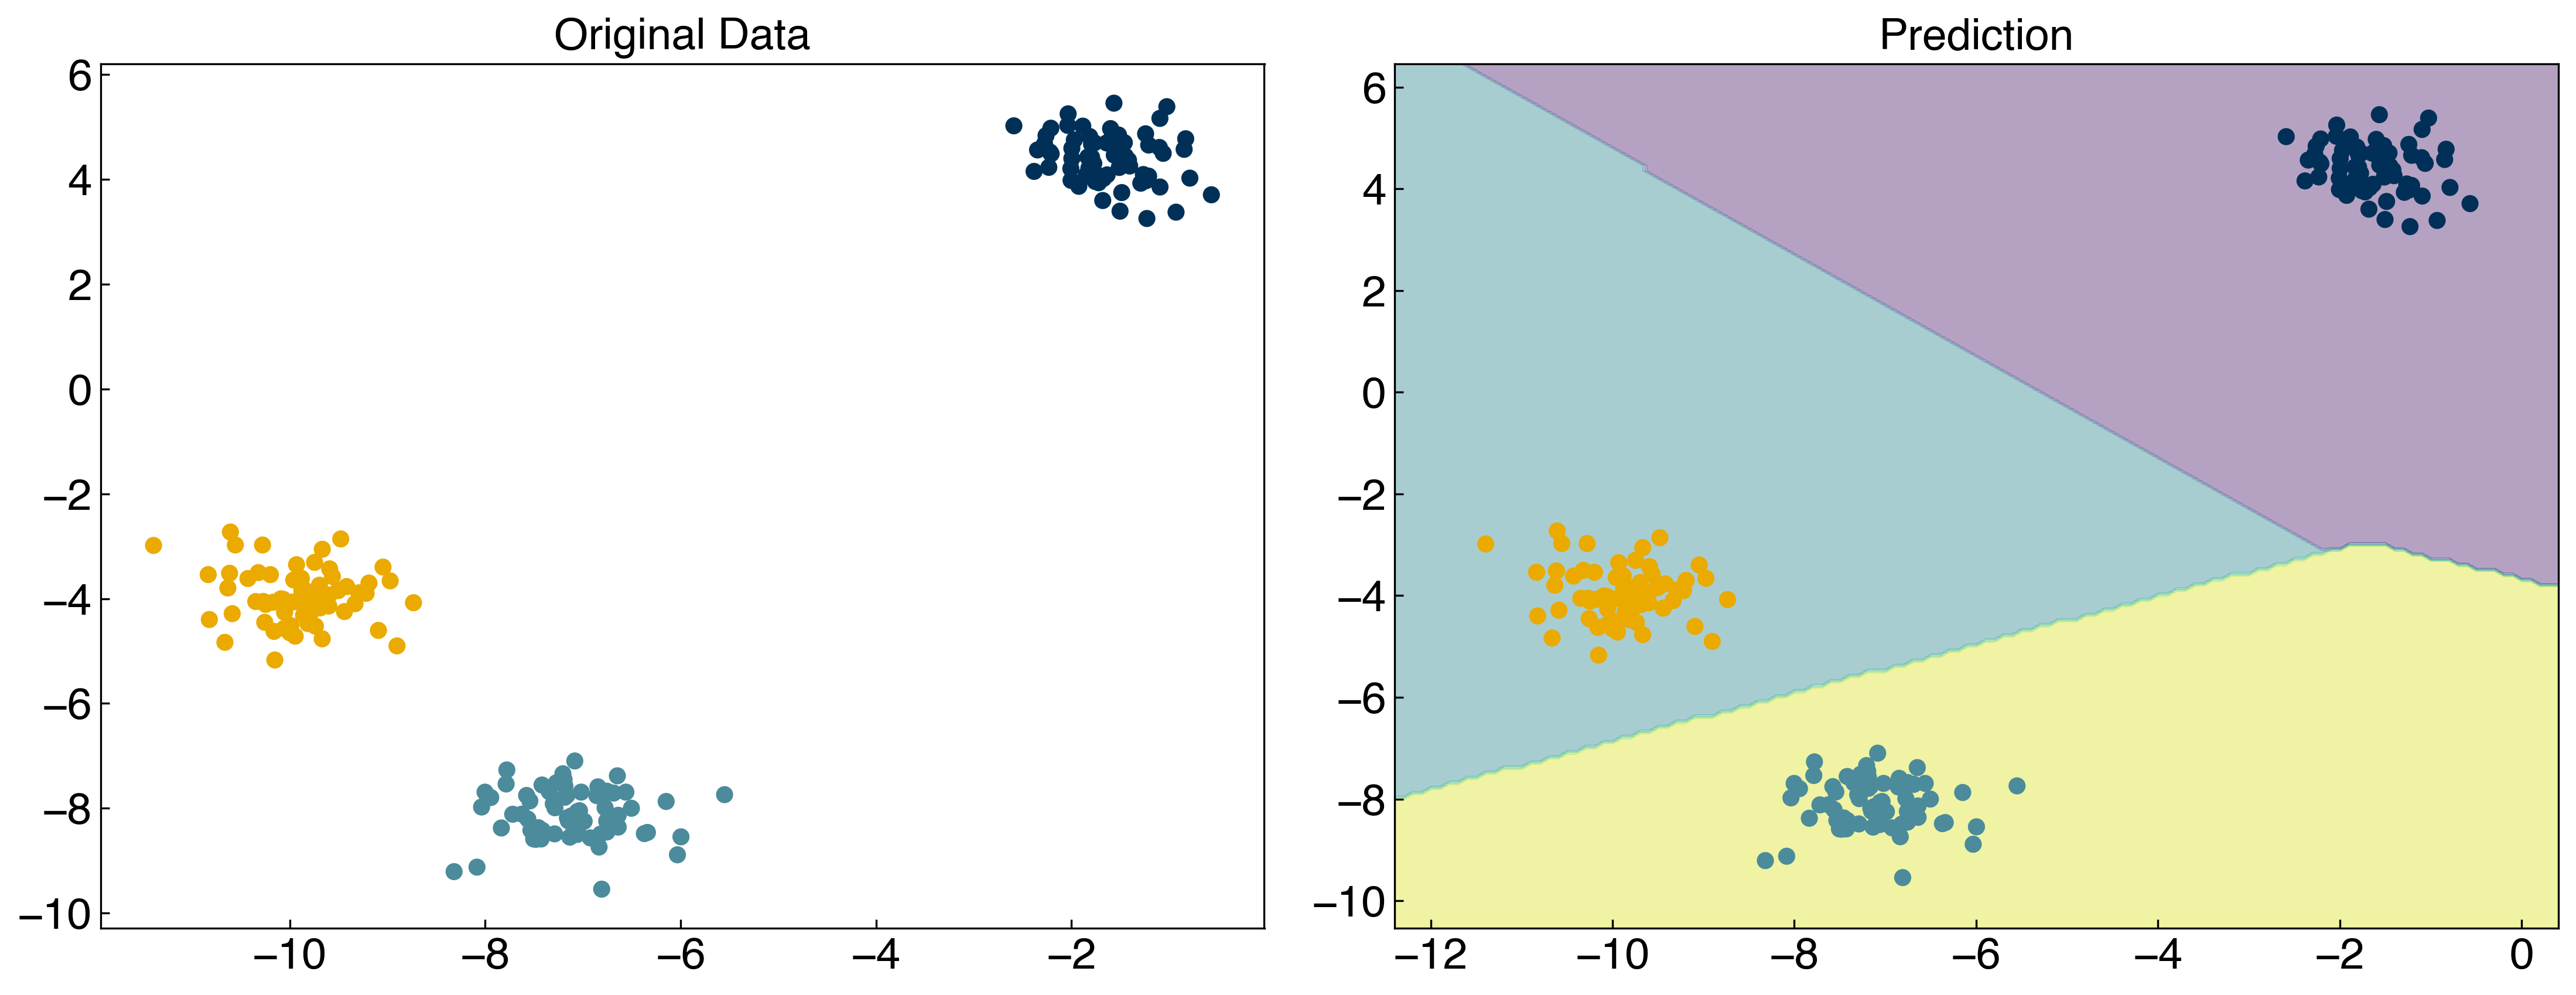

Deriving a loss function for discrimination
So far we have not actually discussed how to create a classification model. We will start by investigating discriminative models, since these are most similar to regression. The difference is that instead of regressing a line that fits the input data, we are regressing a line that discriminates between the two classes. This requires a new loss function. We can derive one such loss function by considering the following mathematical definition of a classification model.

We will start by considering a discrimination problem:

$f(\vec{x}) &gt; p$ if class 1

$f(\vec{x}) &lt; p$ if class 2

and let $f(\vec{x}) = \bar{\bar{X}}\vec{w}$, where $\bar{\bar{X}} = [\vec{x}, \vec{1}]$ similar to linear regression.

We can use $y$ as the output variable and arbitrarily assign "class 1" to 1 and "class 2" to -1, such that $p = 0$.

$\bar{\bar{X}}\vec{w} &gt; 0$ if $y_i=1$ (class 1)

$\bar{\bar{X}}\vec{w} &lt; 0$ if $y_i=-1$ (class 2)

Let's take a look at this in code with some toy data:

In [ ]:
def add_intercept(X):
    intercept = np.ones((X.shape[0],1))
    X_intercept = np.append(intercept,X,1)
    return X_intercept

def linear_classifier(X, w):
    X_intercept = add_intercept(X)
    p = np.dot(X_intercept, w)
    return p > 0

X = X_blob
y = y_blob
y = y_blob*2 - 1 #convert to -1, 1

w = np.array([-10, -4, -10])
prediction = linear_classifier(X, w)

fig, axes = plt.subplots(1, 2, figsize = (15, 6))
axes[0].scatter(X[:, 0], X[:, 1], c = clrs[y_blob + 1])
axes[1].scatter(X[:, 0], X[:, 1], c = clrs[prediction + 1])

#plot line
m = -w[1] / w[2]
b = -w[0] / w[2]
axes[1].plot(X[:, 0], m*X[:, 0]+b, ls = '-')

axes[0].set_title('Original Data')
axes[1].set_title('Prediction');

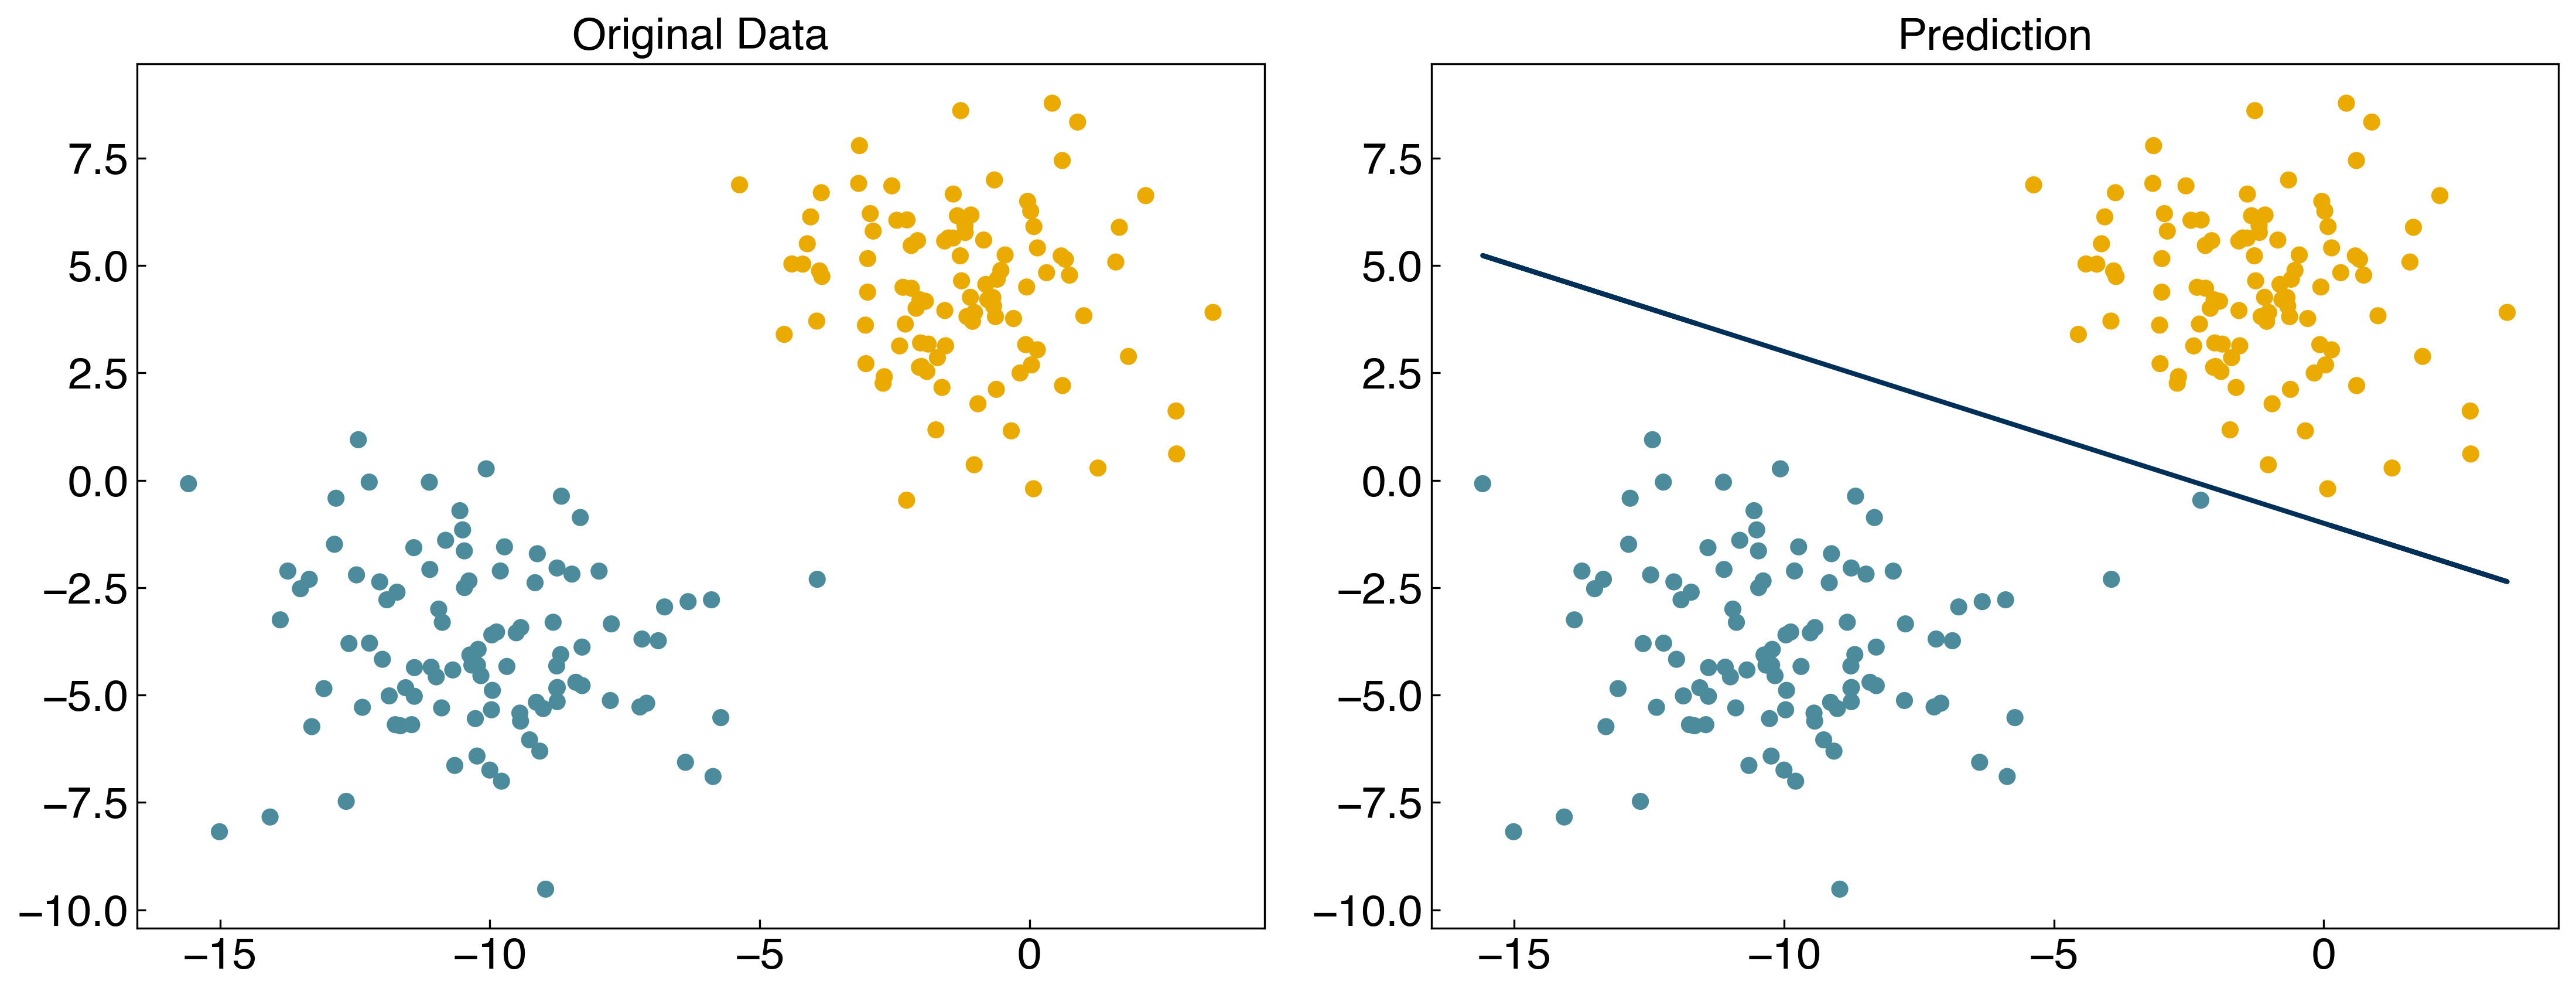


Exercise: Derive the slope and intercept of the line that discriminates between the two classes.
Consider a model of the form:

$\bar{\bar{X}}\vec{w} &gt; 0$ if $y_i=1$ (class 1)

$\bar{\bar{X}}\vec{w} &lt; 0$ if $y_i=-1$ (class 2)

where $\bar{\bar{X}} = [\vec{x_0}, \vec{x_1}, \vec{1}]$ and $\vec{w} = [w_0, w_1, w_2]$.

Then, the equation will be

$x_0w_0 + x_1w_1 + w_2 = 0$

$x_1 = -\frac{w_0}{w_1}x_0 - \frac{w_2}{w_1}$

The slope will be $-\frac{w_0}{w_1}$ and the intercept will be $-\frac{w_2}{w_1}$.

This looks a lot like linear regression, but we still need an objective function. This is where things get tricky. Based on the definition of $\pm$1 for classes, and the algebraic rules for inequalities, we can multiply by $y_i$ and re-write this as a single line:

$-y_i \bar{\bar{X}}\vec{w} &lt; 0$

Convince yourself that this is true!

Now we can turn this into an equality by taking the maximum:

$max(0, -y_i \bar{\bar{X}}\vec{w}) = 0$

Now we are getting close. If a point $y_i$ is mis-classified then this will give a positive value, but if it is correctly classified it will return zero. Therefore we can get a cost for the entire dataset by summing the function over all data points:

$g(\vec{w}) = \sum_i max(0, -y_i \bar{\bar{X}}\vec{w})$

and we can find the optimal $\vec{w}$ by minimizing $g$ with respect to $\vec{w}$

This is the "max cost" function, often commonly referred to as the "perceptron" model. We can implement this loss function:

In [ ]:
def max_cost(w, X, y):
    X_intercept = add_intercept(X)
    Xb = np.dot(X_intercept,w)
    return sum(np.maximum(0, -y*Xb))

print(max_cost(w, X, y))

# Counting loss function
We can also modify the loss function so that we count the number of points that are incorrect by taking the "sign" before summing over the points:

In [ ]:
def n_wrong(w, X = X, y = y):
    X_intercept = add_intercept(X)
    Xb = np.dot(X_intercept,w)
    return sum(np.maximum(0, np.sign(-y*Xb)))

print(n_wrong(w,X,y))

In principle, we can also minimize this directly:



In [ ]:
from scipy.optimize import minimize

result = minimize(n_wrong, w)

w_count = result.x
print(n_wrong(w_count))

prediction = linear_classifier(X, w_count)
fig, axes = plt.subplots(1, 2, figsize = (15, 6))
axes[0].scatter(X[:, 0], X[:, 1], c = clrs[(y + 3) // 2])
axes[1].scatter(X[:, 0], X[:, 1], c = clrs[prediction + 1])

#plot line
m = -w_count[1] / w_count[2]
b = -w_count[0] / w_count[2]
axes[1].plot(X[:, 0], m*X[:, 0] + b, ls = '-')
result;

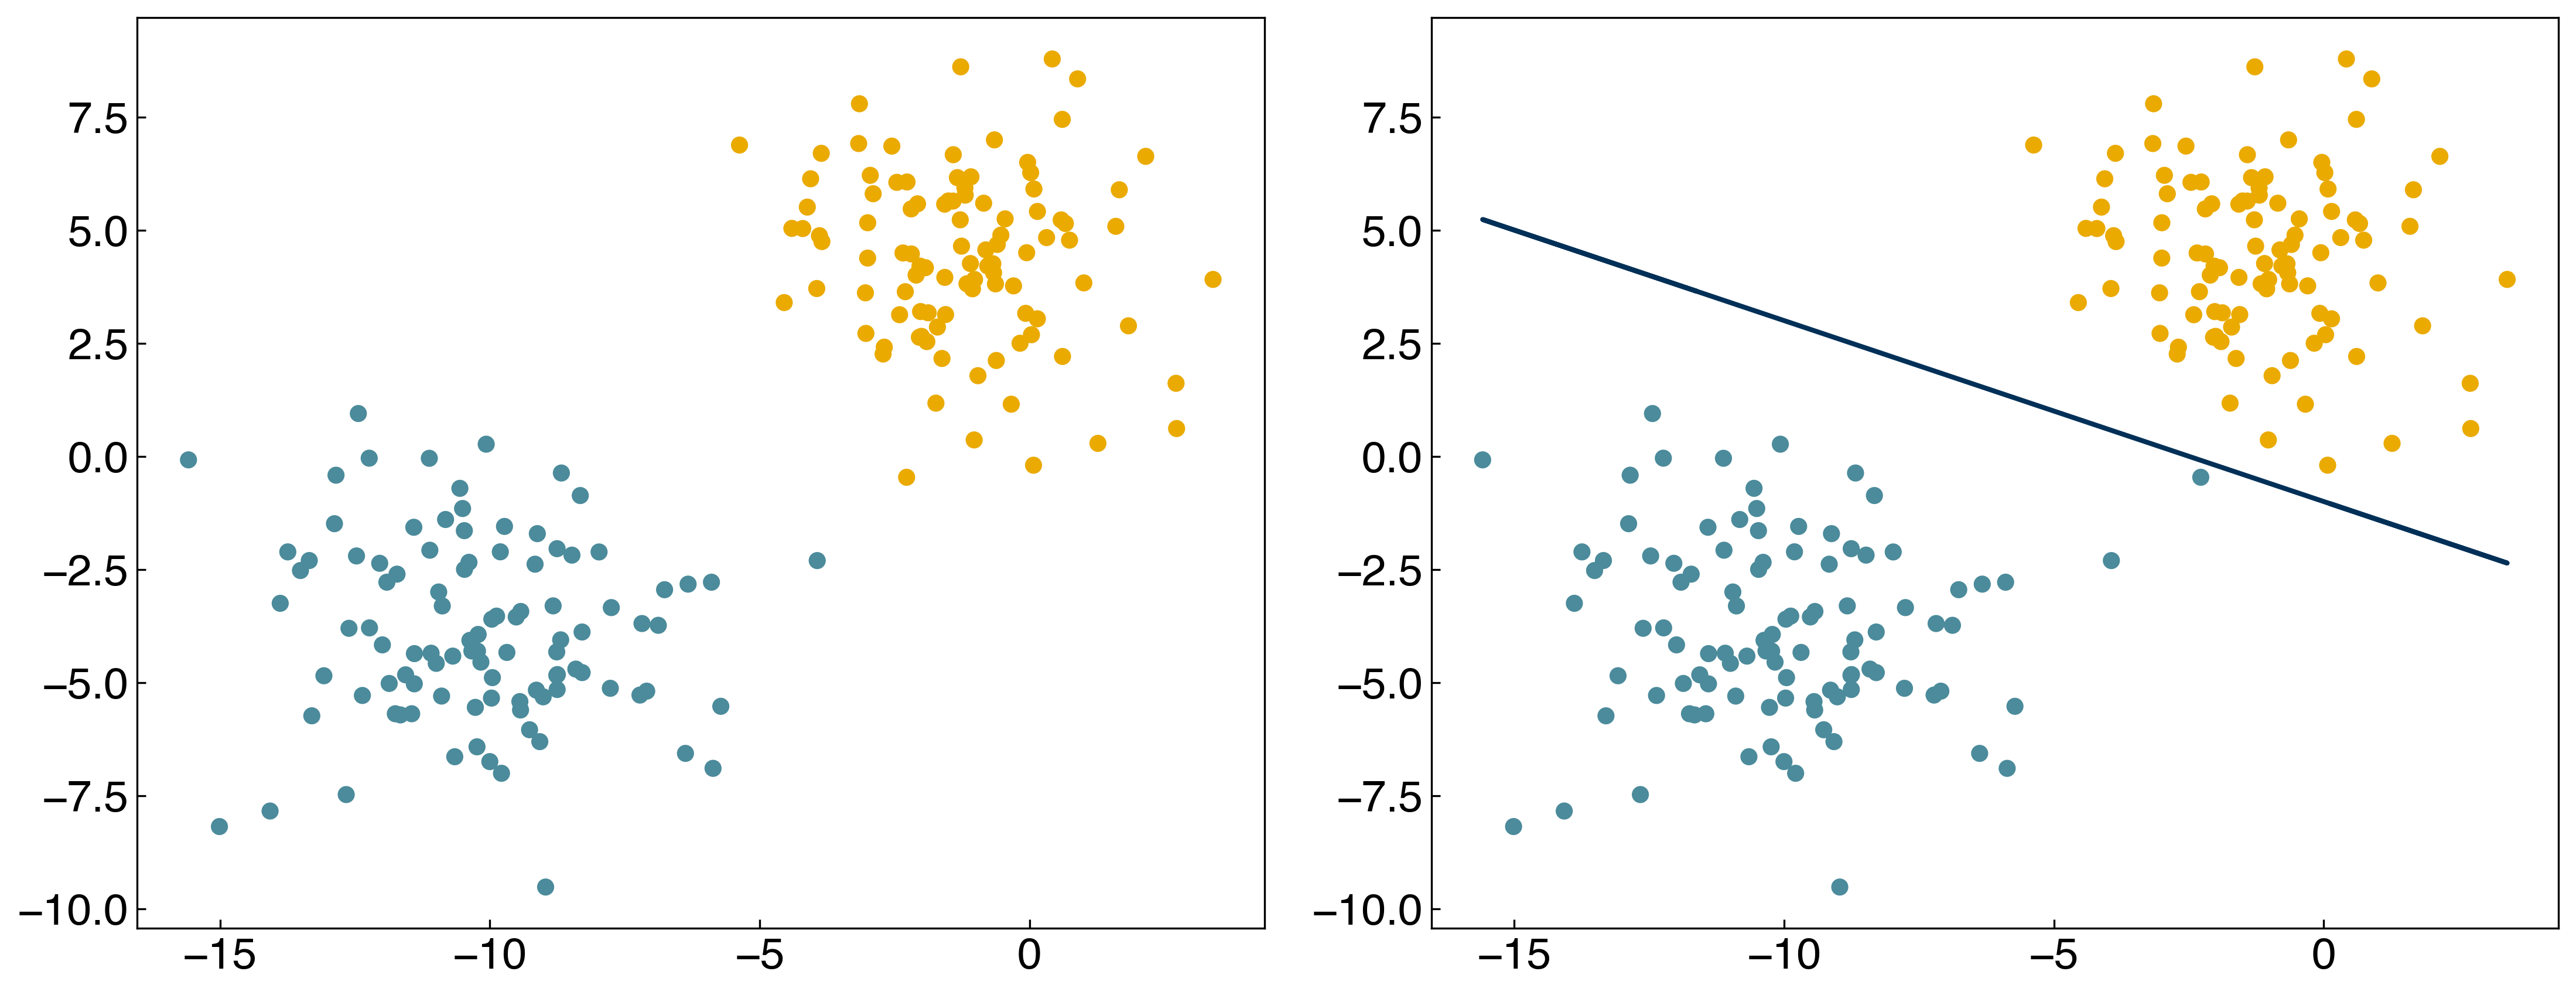

The problem is that the "sign" function is not differentiable! This makes it a bad loss function. In general, we expect that minimizing the loss functions should also minimize the number of incorrect points, but this isn't always the case.

Discussion: What are some differences between these two loss functions?
The max cost function tells how far the input is from the discrimination line, while the counting loss function only tells the number of misclassification.

# Generalized Linear Models
In this lecture we will explore a type of discriminative classification model called "generalized linear models". This is slightly different from the "general linear model" we discussed for regression, but there are also some similarities.

Recall the general form of a linear model:

$y_i = \sum_j w_j X_{ij} + \epsilon_i$

or

$\vec{y} = \bar{\bar{X}}\vec{w} + \vec{\epsilon}$

In the case of a "general linear model", we assume that the error, $\vec{\epsilon}$, follows a normal distribution. However, in a generalized linear model the error follows other types of distributions. This is handled by taking a non-linear tranform:

$\vec{y_{GLM}} = \sigma(\bar{\bar{X}}\vec{w}) + \sigma(\vec{\epsilon})$

where $\sigma(\vec{z})$ is a non-linear function that "links" the normal distribution to the distribution of interest. These "link functions" can be derived from probability theory, but we will derive them from the loss function perspective.

# Perceptron loss function
Recall the derivation of the "perceptron" loss function from the last lecture. We start with a model that discriminates between two classes:

$\bar{\bar{X}}\vec{w} &gt; 0$ if $y_i=1$ (class 1)

$\bar{\bar{X}}\vec{w} &lt; 0$ if $y_i=-1$ (class 2)

Then multiply by $y_i$ to form a single inequality:

$-y_i \bar{\bar{X}}\vec{w} &lt; 0$

and take the maximum to create an equality:

$max(0, -y_i \bar{\bar{X}}\vec{w}) = 0$

We will apply this to the toy datasets:

In [ ]:
from sklearn.datasets.samples_generator import make_blobs, make_moons, make_circles
np.random.seed(1) #make sure the same random samples are generated each time

noisiness = 1

X_blob, y_blob = make_blobs(n_samples=200, centers=2, cluster_std=2*noisiness, n_features=2)

X_mc, y_mc = make_blobs(n_samples=200, centers=3, cluster_std=0.5*noisiness, n_features=2)

X_circles, y_circles = make_circles(n_samples=200, factor=0.3, noise=0.1*noisiness)

X_moons, y_moons = make_moons(n_samples=200, noise=0.1*noisiness)

fig, axes = plt.subplots(1, 4, figsize=(22, 5))

all_datasets = [[X_blob, y_blob], [X_mc, y_mc], [X_circles, y_circles], [X_moons, y_moons]]
titles = ['2-class blobs dataset', '3-class blobs dataset', 'circles dataset', 'moons dataset']

for i, Xy_i in enumerate(all_datasets):
    Xi, yi = Xy_i
    axes[i].scatter(Xi[:,0], Xi[:,1], c = clrs[yi])
    axes[i].set_xlabel('$x_0$')
    axes[i].set_ylabel('$x_1$')
    axes[i].set_title(titles[i])
    
plt.show()

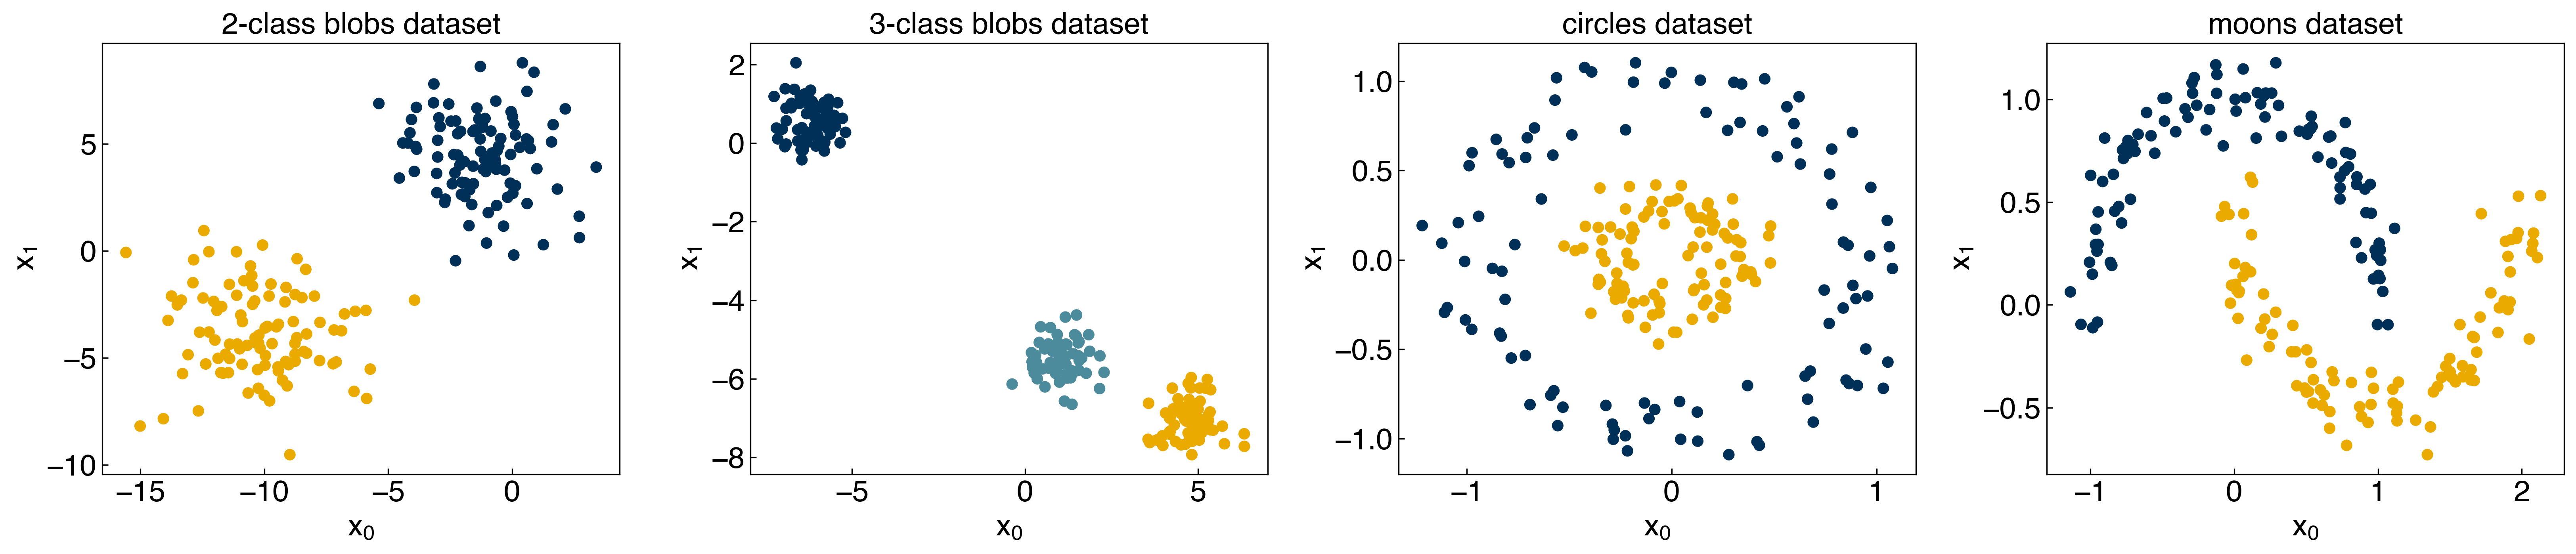

In [ ]:
def add_intercept(X):
    intercept = np.ones((X.shape[0],1))
    X_intercept = np.append(intercept,X,1)
    return X_intercept

def linear_classifier(X, w):
    X_intercept = add_intercept(X)
    p = np.dot(X_intercept, w)
    return p > 0

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(8,5))

X = X_blob
y = y_blob
axes[0].hist(y)
axes[0].set_title('Original Class Definitions')
y = y_blob*2 - 1 #convert to -1, 1
axes[1].hist(y)
axes[1].set_title('Re-scaled Class Definitions')

Note that this re-scaling is only necessary if we are using our own model. The scikit-learn implementation is clever enough to take care of this automatically.

Now we can select some arbitrary parameters and evaluate the model:

In [ ]:
w = np.array([-10, -4, -10])
prediction = linear_classifier(X, w)

fig, axes = plt.subplots(1, 2, figsize = (15, 6))
axes[0].scatter(X[:, 0], X[:, 1], c = clrs[y_blob + 1])
axes[1].scatter(X[:, 0], X[:, 1], c = clrs[prediction + 1])

#plot line
m = -w[1] / w[2]
b = -w[0] / w[2]
axes[1].plot(X[:, 0], m*X[:, 0]+b, ls = '-')

axes[0].set_title('Original Data')
axes[1].set_title('Prediction');

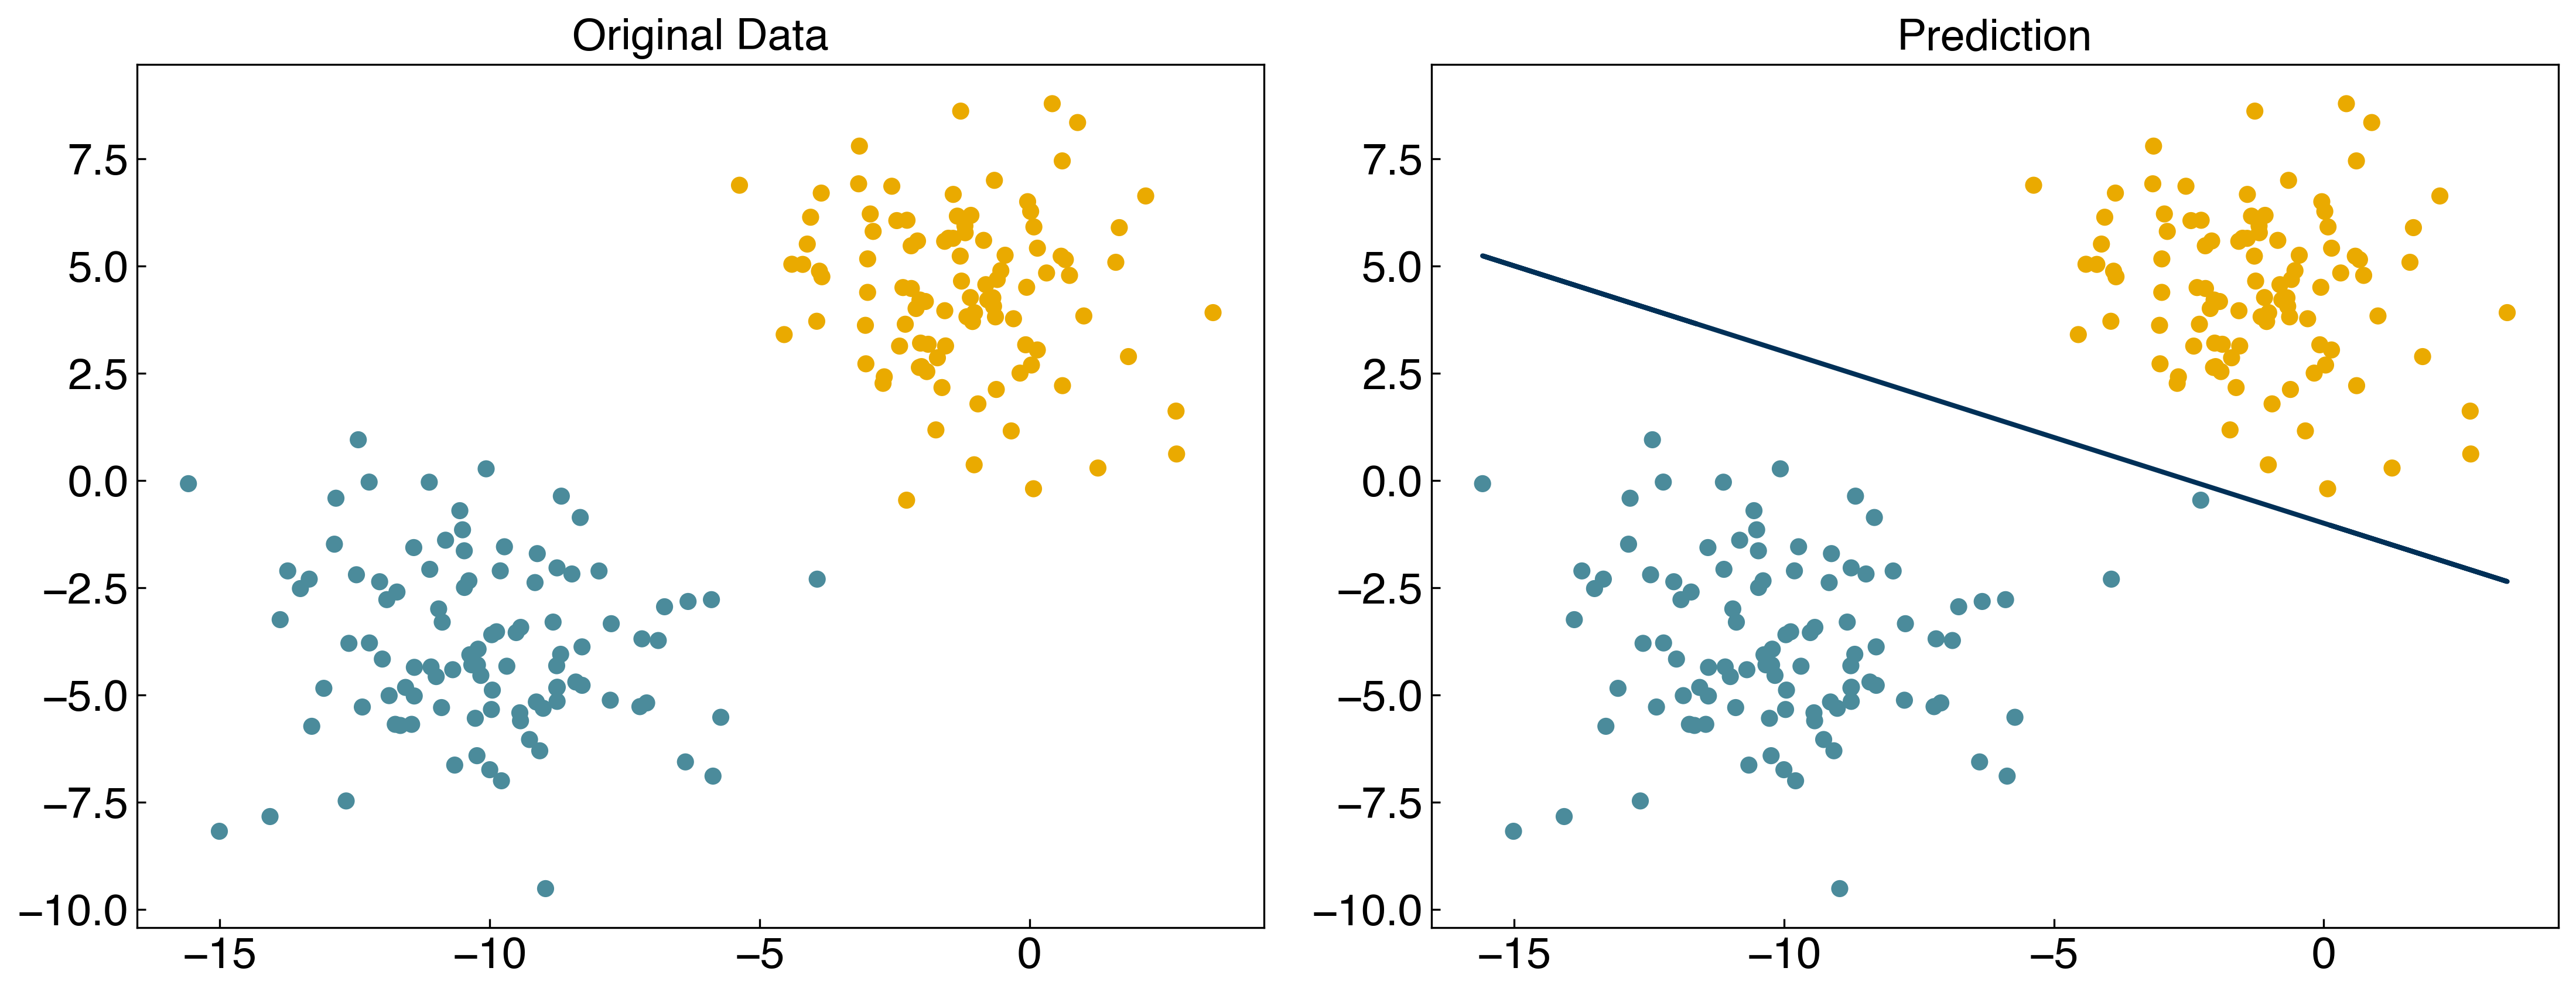

and we can implement the max cost loss function to compute the cost of a given set of parameters:

In [ ]:
def max_cost(w, X=X, y=y):
    X_intercept = add_intercept(X)
    Xb = np.dot(X_intercept,w)
    return sum(np.maximum(0, -y*Xb))

print(max_cost(w,X,y))

3.75103040564972

Now, we can solve the model by minimizing the loss function with respect to the parameters:

In [ ]:
from scipy.optimize import minimize

result = minimize(max_cost, w)
w_perceptron = result.x
result

Out[8]:
      fun: 0.0
 hess_inv: array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])
      jac: array([0., 0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 1
     njev: 4
   status: 0
  success: True
        x: array([-10.69214391,  -2.42205481,  -9.67940886])
        
        

In [ ]:
prediction = linear_classifier(X, w_perceptron)

fig, axes = plt.subplots(1, 2, figsize = (15, 6))
axes[0].scatter(X[:, 0], X[:, 1], c = clrs[y_blob + 1])
axes[1].scatter(X[:, 0], X[:, 1], c = clrs[prediction + 1])

#plot line
m = -w_perceptron[1] / w_perceptron[2]
b = -w_perceptron[0] / w_perceptron[2]
axes[1].plot(X[:, 0], m*X[:, 0] + b, ls = '-')

axes[0].set_title('Original Data')
axes[1].set_title('Prediction');

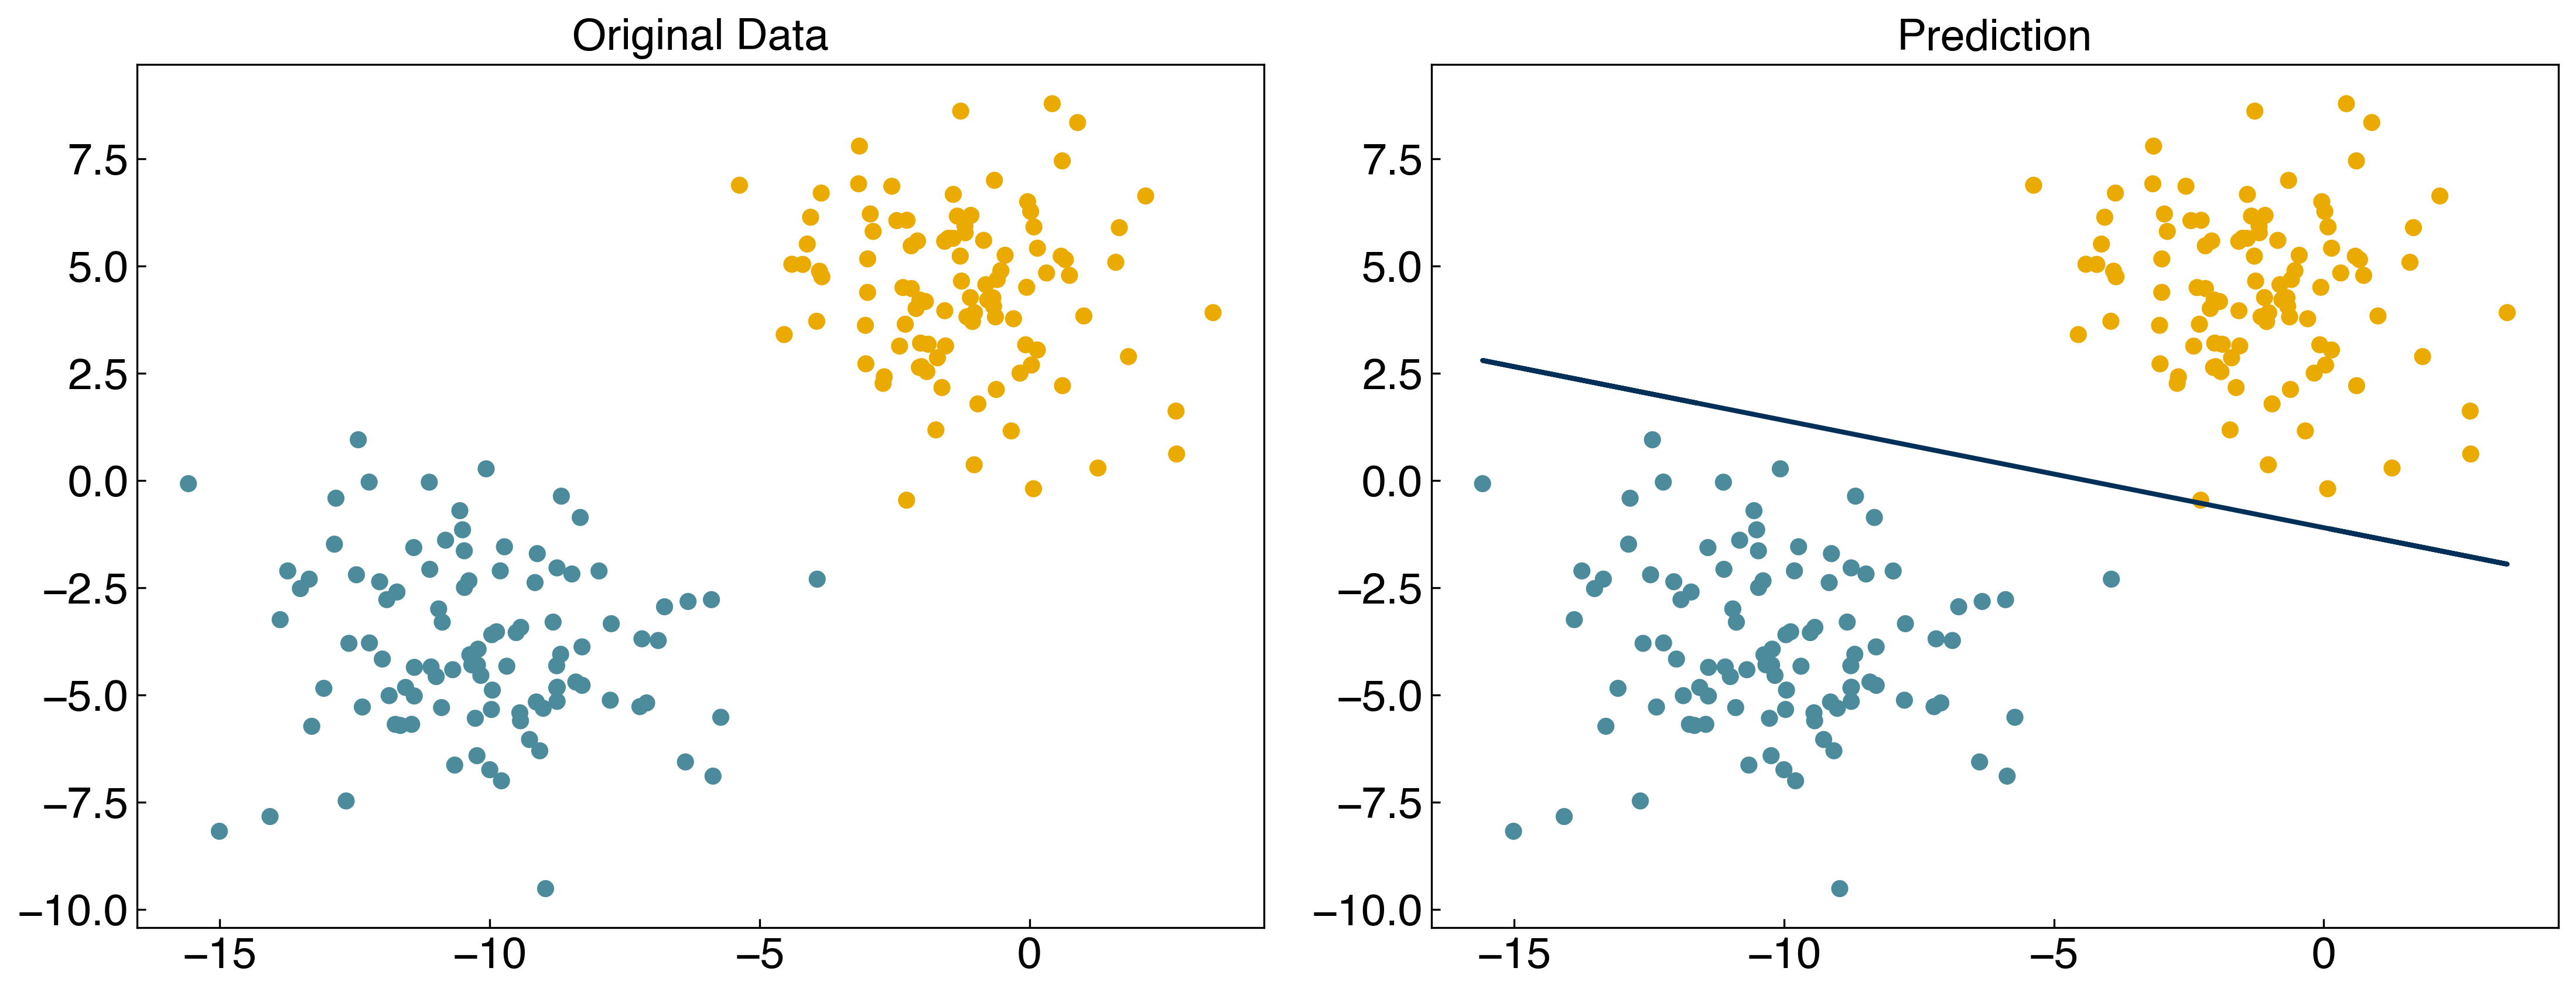

Discussion: What can go wrong with the max cost loss function?
The first derivative of the max cost loss function is non differentiable.
An initial guess of $\vec{0}$ makes the max cost zero, which is a trivial solution.
The perceptron as a neural network
It turns out that the "perceptron", invented by Frank Rosenblatt in 1958, was the original neural network. The structure of the perceptron is similar to a biological neuron which "fires" if the sum of its inputs exceed some threshold:

The "perceptron" is equivalent to a "single layer" neural network with a step activation function. In fact, all the generalized linear models for classification are single layer neural networks, but with slightly different types of activation functions.


Logistic regression
The max cost loss function has two main problems:

(1) There is a trivial solution at $\vec{w} = 0$.

(2) The $max$ function is not differentiable.

We can overcome the second problem by creating some smooth approximation of the maximum function. This is achieved using the "softmax" function:

$max(x,y) \approx soft(x,y) = log(exp(x) + exp(y))$

In [ ]:

x = np.linspace(-5, 5, 100)

fig, ax = plt.subplots(figsize = (6, 5), dpi = 100)

ax.plot(x, np.maximum(0, x), ls = '-')
ax.plot(x, np.log(np.exp(0) + np.exp(x)), ls = '--')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(['Max', 'Softmax'])
ax.set_title('Max vs. Softmax');

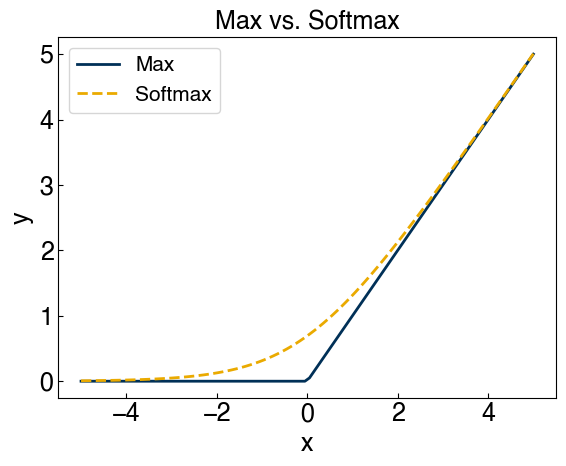

We can see that this also gets rid of the "trivial solution" at $\vec{w}=0$, so our problems are solved!

Now we can write a "softmax" cost function:

def softmax_cost(w, X = X, y = y):
    X_intercept = add_intercept(X)
    Xb = np.dot(X_intercept, w)
    exp_yXb = np.exp(-y * Xb)
    return sum(np.log(1 + exp_yXb))

print(softmax_cost(w, X, y))

3.7745706457998764

This function is differentiable, so we can minimize this with respect to $\vec{w}$ by setting the derivative equal to zero and solving for $\vec{w}$:

It turns out this problem is not linear, and needs to be solved iteratively using e.g. Newton's method. The math is a little more complex than before, so we won't cover it in lecture, but it is covered in Ch. 4 of "Machine Learning Refined" if you are interested. This approximation is called logistic regression.

The key concept to understand is that $\vec{w}$ is determined by minimizing the softmax cost function. We can do this numerically for our toy model:

In [ ]:
from scipy.optimize import minimize

result = minimize(softmax_cost, w, args = (X, y))
w_logit = result.x

prediction = linear_classifier(X, w_logit)
fig, axes = plt.subplots(1, 2, figsize = (15, 6))
axes[0].scatter(X[:, 0], X[:, 1], c = clrs[y_blob + 1])
axes[1].scatter(X[:, 0], X[:, 1], c = clrs[prediction + 1])

#plot line
m = -w_logit[1] / w_logit[2]
b = -w_logit[0] / w_logit[2]
axes[1].plot(X[:, 0], m*X[:, 0] + b, ls = '-')

axes[0].set_title('Original Data')
axes[1].set_title('Prediction');

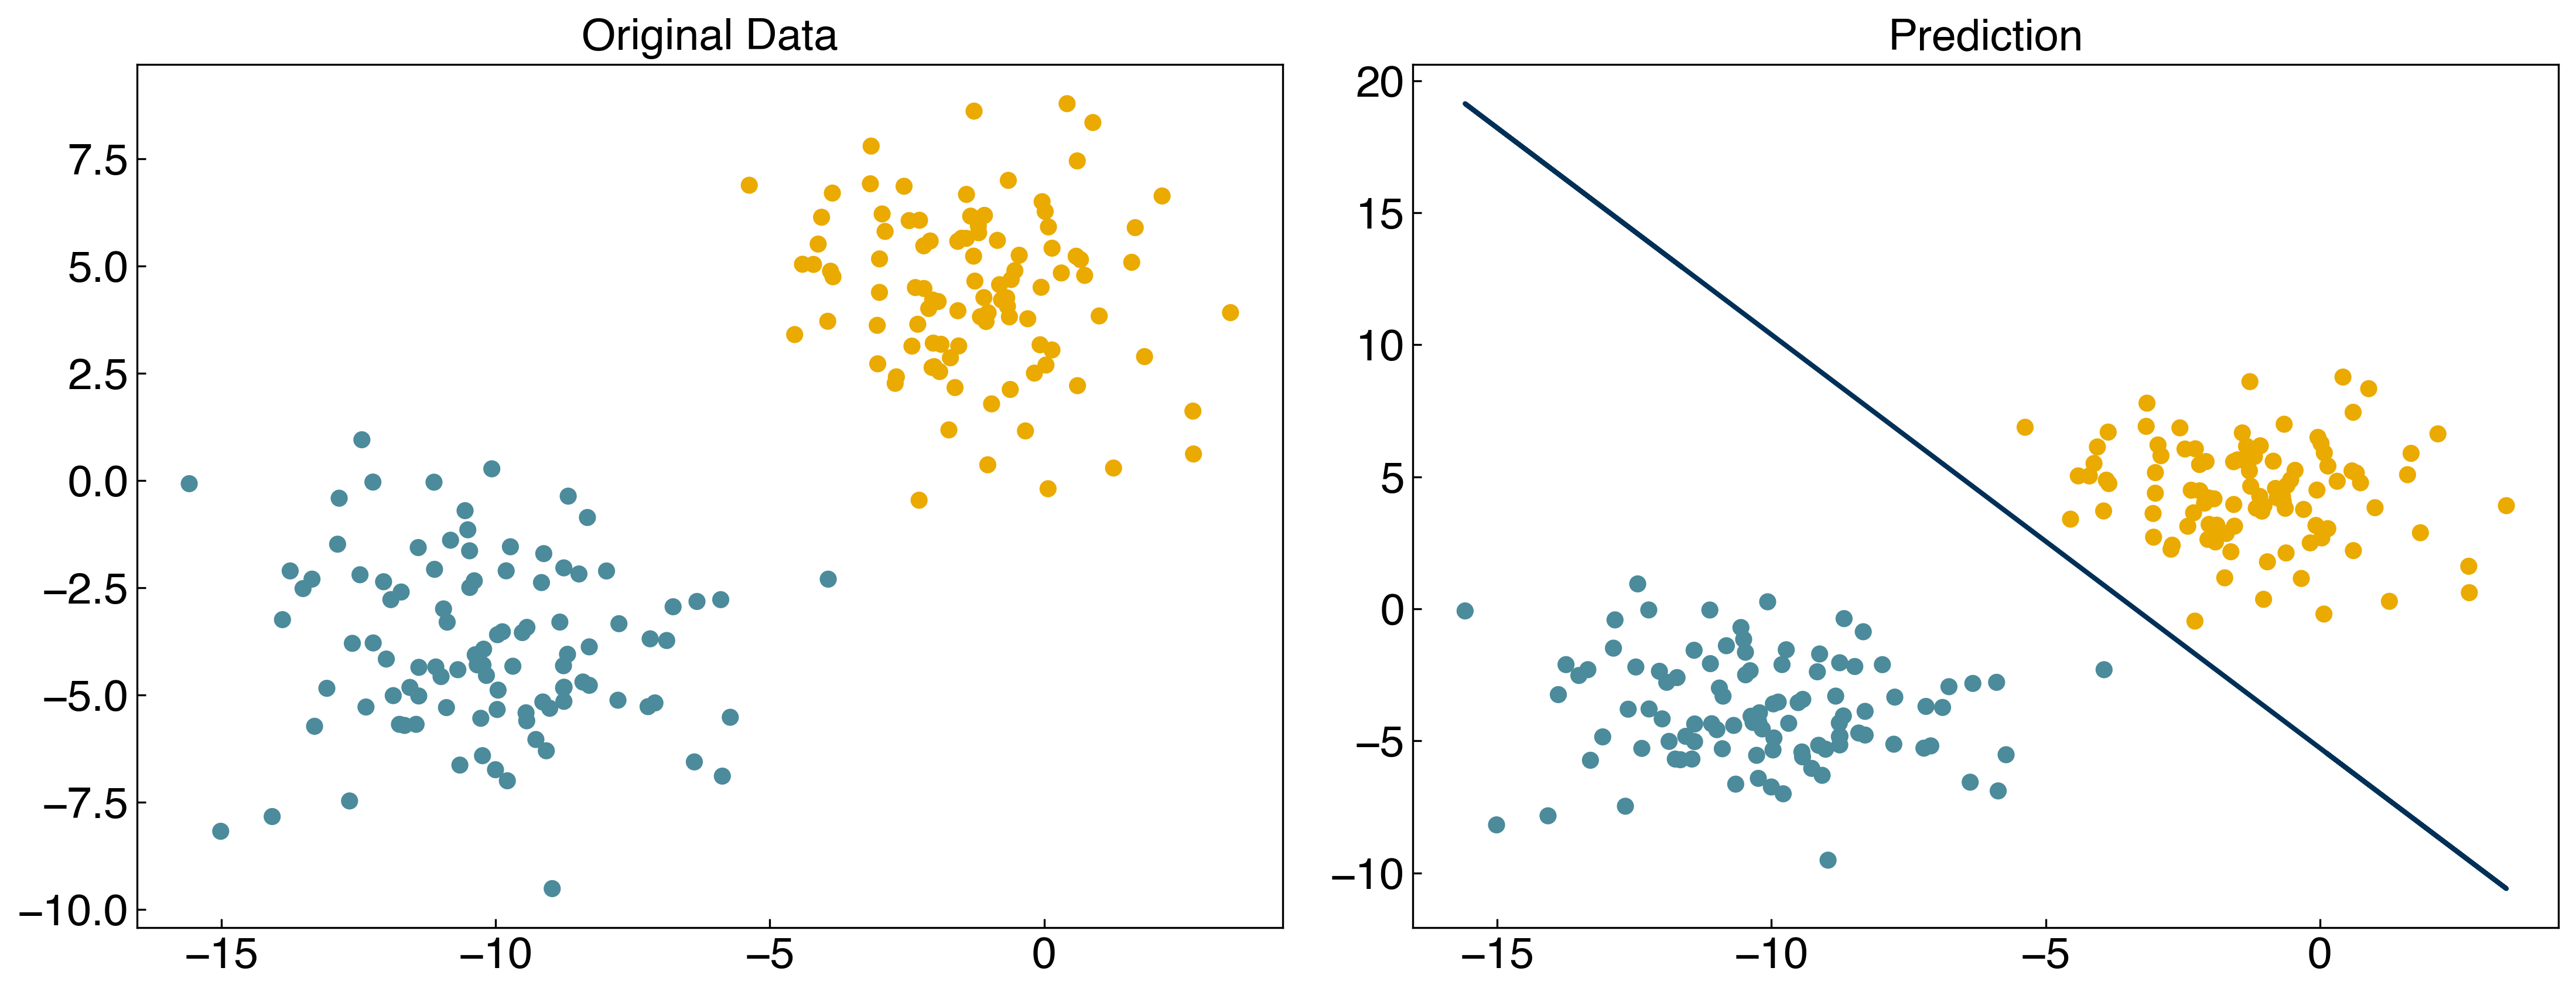

Exercise: Compare the loss function for the perceptron and logistic regression after optimization for the "moons" dataset.

In [ ]:
from scipy.optimize import minimize

y_moons_scaled = 2 * y_moons - 1

w = [-10, 10, 5]

result = minimize(max_cost, w, args = (X_moons, y_moons_scaled))
print('Perceptron loss function: {}'.format(max_cost(result.x, X_moons, y_moons_scaled)))

result = minimize(softmax_cost, w, args = (X_moons, y_moons_scaled))
print('Logistic regression loss function: {}'.format(softmax_cost(result.x, X_moons, y_moons_scaled)))


Perceptron loss function: 4.5796169252392186e-07
Logistic regression loss function: 53.939495485292476

# Margin loss function¶
Recall the two problems with the max cost function:

1) There is a "trivial solution" at $\vec{w} = 0$

2) The cost function is not differentiable at all points

Logistic regression uses a smooth approximation of the maximum to ensure differentiability, and the "trivial solution" goes away as a side effect.

An alternative approach is to directly eliminate the trivial solution by introducing a "margin" cost function, where we recognize that there will be some "buffer zone" between the classes:

We can write this mathematically as:

$\bar{\bar{X}}\vec{w} \geq 1$ if $y_i=1$ (class 1)

$\bar{\bar{X}}\vec{w} \leq -1$ if $y_i=-1$ (class 2)

by using the same trick of multiplying by $y_i$ and taking a maximum we can write this as an equality:

$max(0, 1 -y_i \bar{\bar{X}}\vec{w}) = 0$

and the corresponding cost/objective function:

$g_{margin}(\vec{w}) = \sum_i max(0, 1-y_i \bar{\bar{X}}\vec{w})$

Note that this is very similar to the cost function for the perceptron, but now there is no trivial solution at $\vec{w} = 0$. However, we can solve this with a few approaches:

1) Use derivative-free numerical approximations

2) Replax $max$ with a differentiable function like $softmax$ or $max^2$

Let's see what happens with strategy 1:

In [ ]:
def margin_cost(w, X = X, y = y):
    X_intercept = add_intercept(X)
    Xb = np.dot(X_intercept,w)
    return sum(np.maximum(0, 1 - y * Xb))

print(margin_cost(w,X,y))

In [ ]:
result = minimize(margin_cost, w)

w_opt_margin = result.x

prediction = linear_classifier(X, w_opt_margin)
fig, axes = plt.subplots(1, 2, figsize = (15, 6))
axes[0].scatter(X[:, 0], X[:, 1], c = clrs[y_blob + 1])
axes[1].scatter(X[:, 0], X[:, 1], c = clrs[prediction + 1])

#plot line
m = - w_opt_margin[1] / w_opt_margin[2]
b = - w_opt_margin[0] / w_opt_margin[2]
axes[1].plot(X[:, 0], m * X[:, 0] + b, ls = '-');

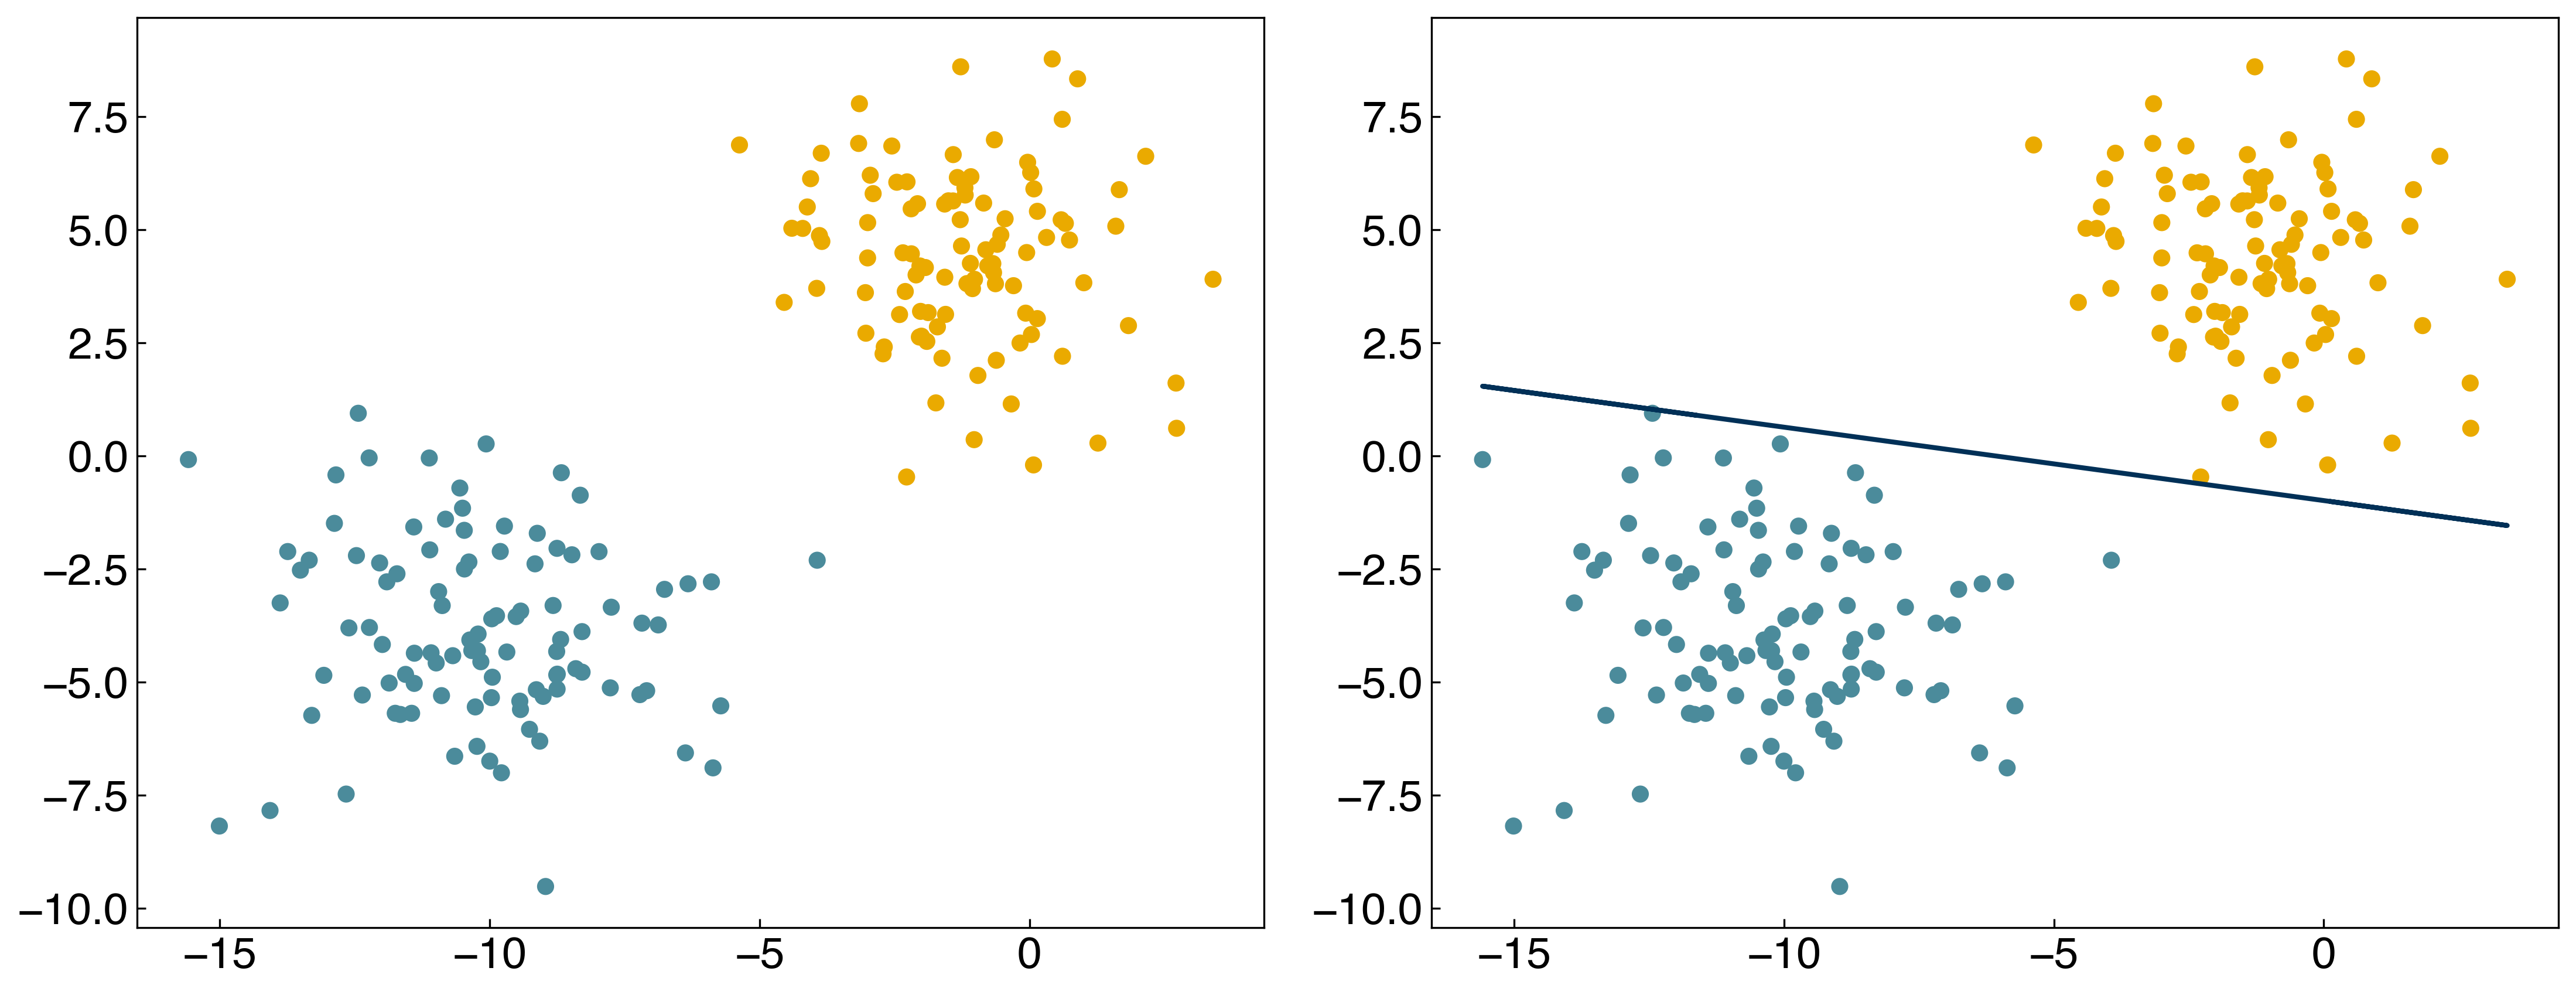


It works, but we get a different solution from logistic regression. Let's see how this compares to the $max^2$ and $softmax$ approximations:

In [ ]:
def margin_cost_squared(beta, X = X, y = y):
    X_intercept = add_intercept(X)
    Xb = np.dot(X_intercept, beta)
    return sum(np.maximum(0, 1 - y * Xb)**2)

def margin_cost_softmax(beta, X = X, y = y):
    X_intercept = add_intercept(X)
    Xb = np.dot(X_intercept,beta)
    exp_yXb = np.exp(1 - y * Xb)
    return sum(np.log(1 + exp_yXb))

In [ ]:
result = minimize(margin_cost_squared, w)
w_opt_margin2 = result.x

result = minimize(margin_cost_softmax, w)
w_opt_softmax = result.x

prediction = linear_classifier(X, w_opt_softmax)
fig, axes = plt.subplots(1, 2, figsize = (15, 6))
axes[0].scatter(X[:, 0], X[:, 1], c = clrs[y_blob + 1])
axes[1].scatter(X[:, 0], X[:, 1], c = clrs[prediction + 1])

#plot lines
def plot_line(ax, color, w, X, label):
    m = -w[1] / w[2]
    b = -w[0] / w[2]
    ax.plot(X[:, 0], m*X[:, 0] + b, ls = '-', color = color, label = label)
    
labels = ['perceptron', 'logistic regression', 'max margin', 'softmax margin', 'max^2 margin']
w_set = [w_perceptron, w_logit,w_opt_margin, w_opt_margin2, w_opt_softmax]

for w_i, color, label in zip(w_set, clrs[:5], labels):
    plot_line(axes[1], color, w_i, X, label)
    
axes[1].legend();

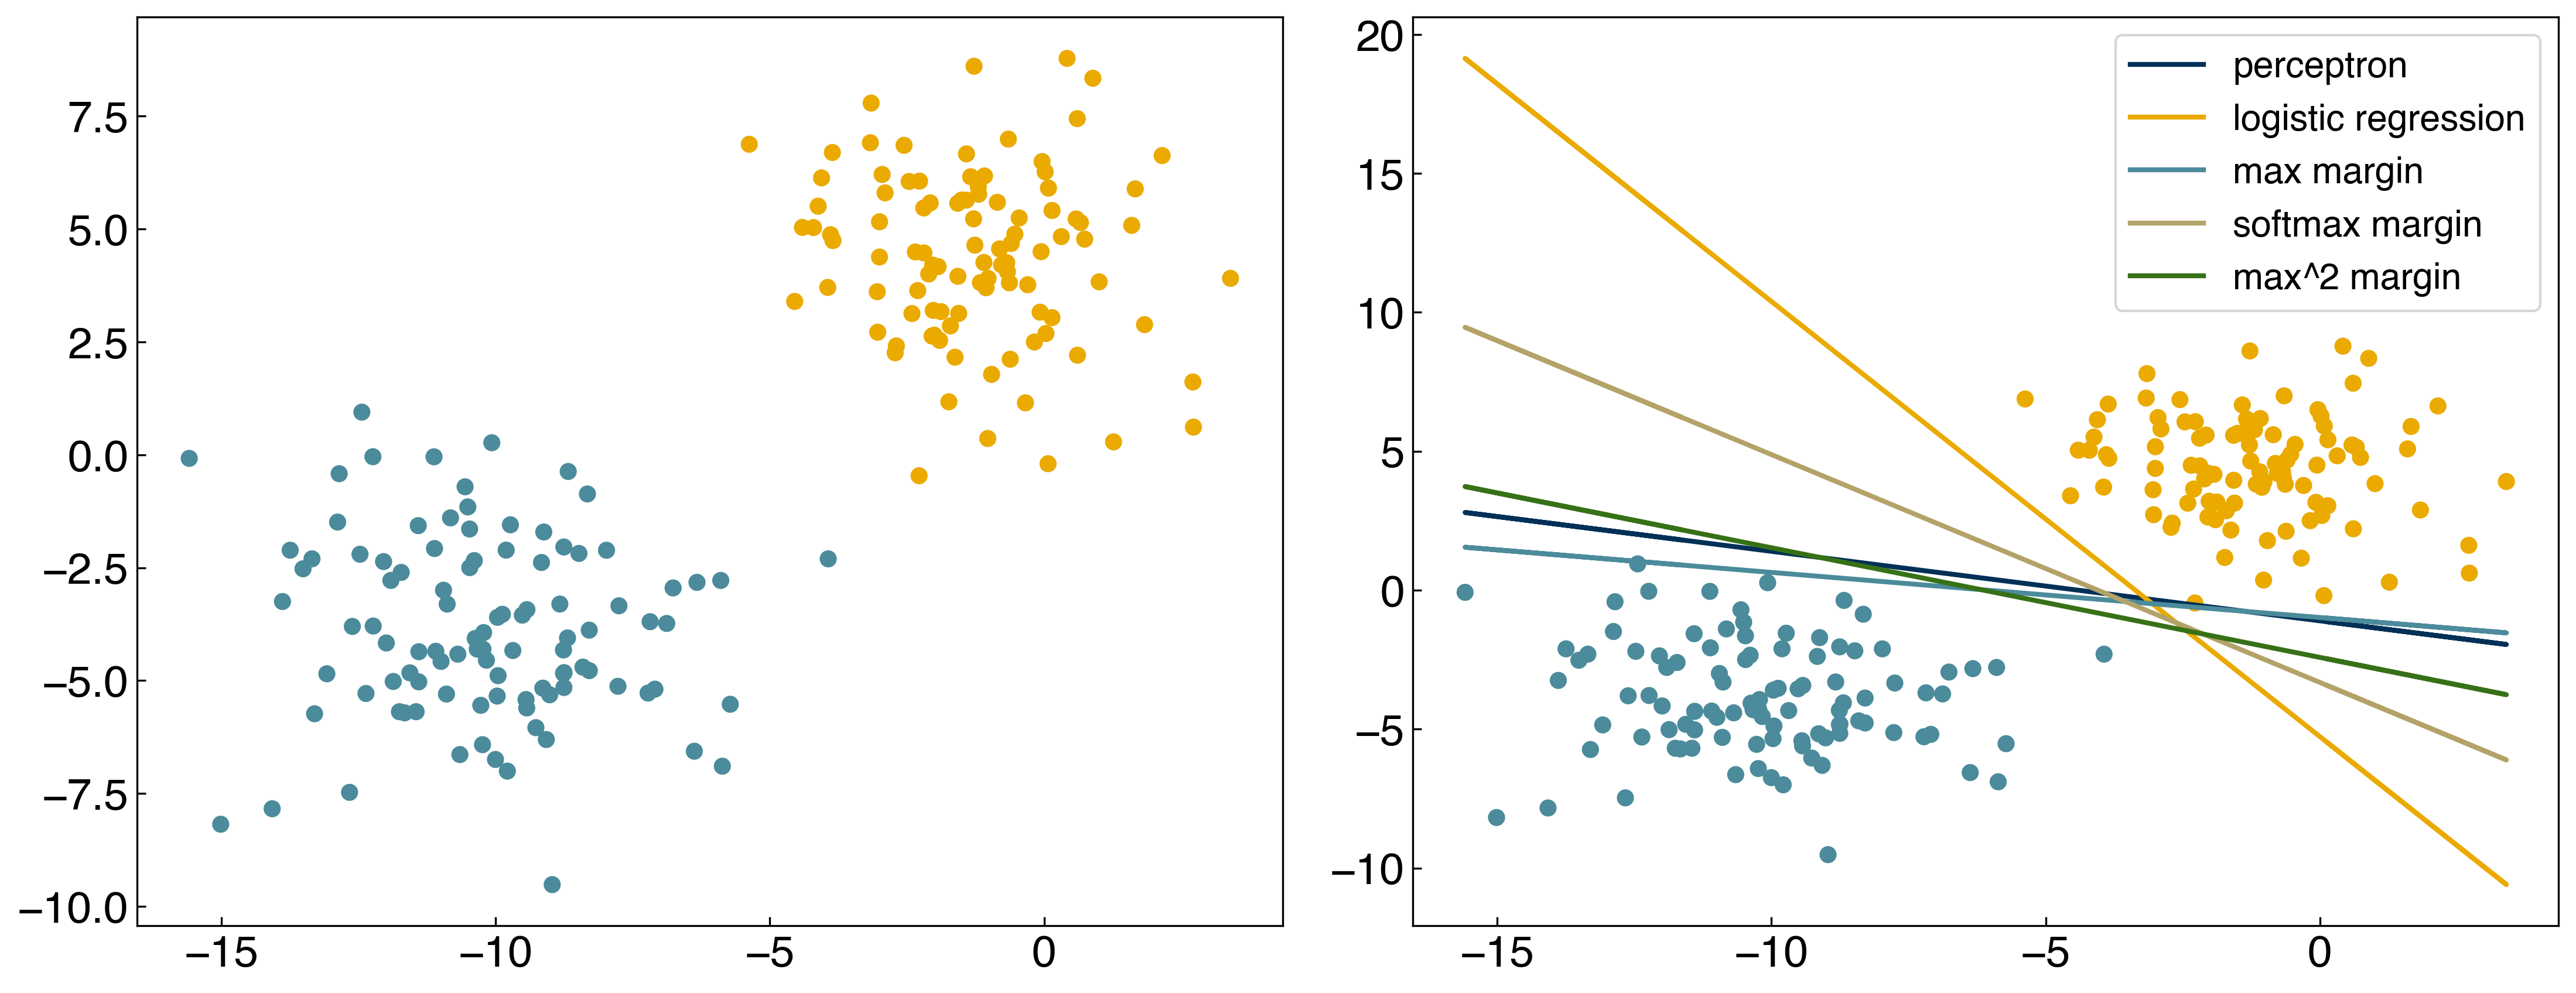

Support Vector Machine
From margins to support vectors
One of the most powerful classification models, "support vector machines", are very closely related to the margin cost function:

$\bar{\bar{X}}\vec{w} \geq 1$ if $y_i=1$ (class 1)

$\bar{\bar{X}}\vec{w} \leq -1$ if $y_i=-1$ (class 2)

Multiply by $y$ and convert to an equality:

$max(0, 1 -y_i \bar{\bar{X}}\vec{w}) = 0$

and sum over all points to get the loss function:

$g_{margin}(\vec{w}) = \sum_i max(0, 1-y_i \bar{\bar{X}}\vec{w})$

We can visualize this geometrically as:

The distance between the discrimination line and the closest points is called the "margin" of the model, and the points that define the margin are called the "support vectors". It can be shown with geometric arguments that the width of the margins is inversely proportional to the size of the weight vector (without the intercept term):

For support vector machines, the goal is to maximize the margins between the "support vectors". This is achieved by minimizing the value of the weights, $\vec{w}$. This can be done by "regularization", as we discussed in the regression lectures. Specifically, support vector machines use $L_2$ regularization:

$g_{SVM}(\vec{w}) = \sum_i max(0, 1-y_i \bar{\bar{X}}\vec{w}) + \alpha ||\vec{\tilde{w}}||_2 $

where $\vec{\tilde{w}}$ are the weights with the intercept omitted.

Let's use the new regularized cost function:

In [ ]:

X = X_blob
y = y_blob * 2 - 1

def regularized_cost(w, X = X, y = y, alpha = 1):
    X_intercept = add_intercept(X)
    Xb = np.dot(X_intercept, w)
    cost = sum(np.maximum(0, 1 - y*Xb))
    cost += alpha*np.linalg.norm(w[1:], 2)
    return cost

In [ ]:
# and optimize it with the minimize function:
from scipy.optimize import minimize

w_guess = np.array([-10, -4, -10])
result = minimize(regularized_cost, w_guess, args = (X, y, 1))
w_svm = result.x

prediction = linear_classifier(X, w_svm)

fig, axes = plt.subplots(1, 2, figsize = (15, 6))
axes[0].scatter(X[:, 0], X[:, 1], c = clrs[y_blob + 1])
axes[1].scatter(X[:, 0], X[:, 1], c = clrs[prediction + 1])

#plot line
m = -w_svm[1] / w_svm[2]
b = -w_svm[0] / w_svm[2]
axes[1].plot(X[:, 0], m*X[:, 0] + b, ls = '-')
axes[0].set_title('Original Data')
axes[1].set_title('Prediction');


Support vector machines may sound scary, but as you can see above they are really just a very minor modification to ridge regression (least-squares regression regularized by the $L_2$ norm:

(1) The loss function is the "margin" loss function instead of the sum of squares.

(2) The model must be solved numerically because it is non-linear.

# Non-linearity and Kernels¶
We have seen lots of ways to find discrimination lines for linearly separable datasets, but they do not work well for non-linearly separable datasets:

In [ ]:
X = X_circles
y = y_circles*2 - 1

w_guess = np.array([-10, -4, -10])
result = minimize(regularized_cost, w_guess, args=(X, y, 1))
w_svm = result.x

prediction = linear_classifier(X, w_svm)

fig, axes = plt.subplots(1, 2, figsize = (15, 6))
axes[0].scatter(X[:, 0], X[:, 1], c = clrs[y_circles + 1])
axes[1].scatter(X[:, 0], X[:, 1], c = clrs[prediction + 1])

#plot line
m = -w_svm[1] / w_svm[2]
b = -w_svm[0] / w_svm[2]
axes[1].plot(X[:, 0], m*X[:,0]+b, ls = '-')
axes[0].set_title('Original Data')
axes[1].set_title('Prediction');

For the case of general linear regression, we saw that we could endow a model with non-linear behavior by transforming the input features using polynomials, Gaussians, or other non-linear transforms. We can do something similar here, but it is slightly trickier since there are two variables. We can use a Gaussian transform as before:



where we have arbitrarily set the standard deviation to 1. We can add this as a third feature:



In [ ]:

X_new = np.exp(-(X[:,0]**2 + X[:,1]**2))
X_new = X_new.reshape(-1, 1)
X_nonlinear = np.append(X, X_new, 1)
print(X_nonlinear.shape)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15, 6))
axes[0].scatter(X_nonlinear[:, 0],X_nonlinear[:, 1],c = clrs[y_circles + 1])
axes[0].set_xlabel('$x_0$')
axes[0].set_ylabel('$x_1$')
axes[1].scatter(X_nonlinear[:, 0],X_nonlinear[:, 2],c = clrs[y_circles + 1])
axes[1].set_xlabel('$x_0$')
axes[1].set_ylabel('$x_2$');

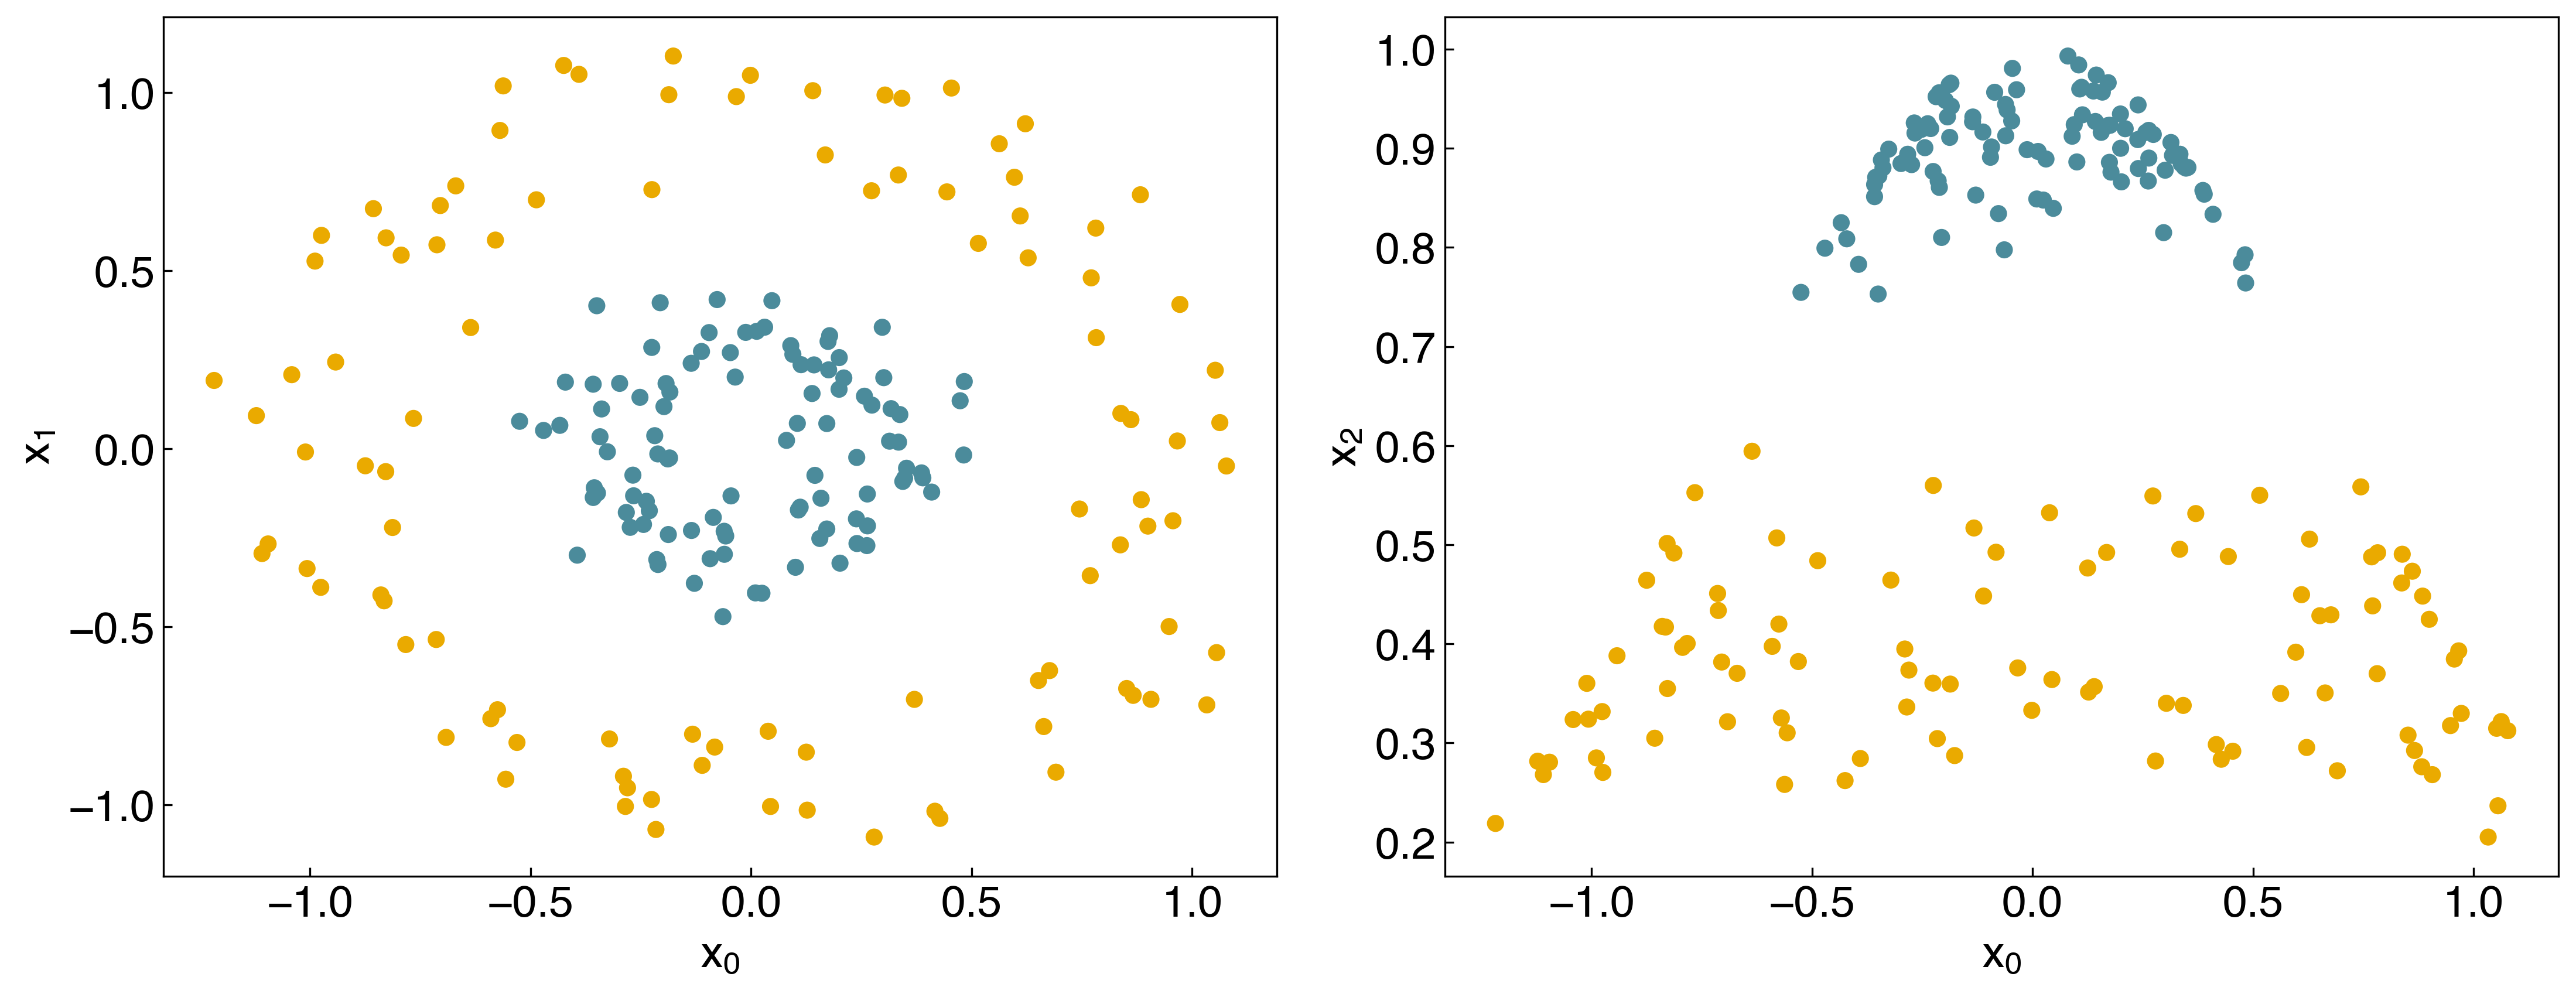

We see that the dataset is now linearly separable in this transformed space!

Let's see what happens if we use this new matrix as input to the SVM:

In [ ]:
w_guess = np.array([-10, -4, 0, -10]) #note that we have an extra parameter now

result = minimize(regularized_cost, w_guess, args = (X_nonlinear, y, 1))
w_svm = result.x

prediction = linear_classifier(X_nonlinear, w_svm)

fig, axes = plt.subplots(1, 2, figsize = (15, 6))
axes[0].scatter(X_nonlinear[:, 0], X_nonlinear[:, 1], c = clrs[y_circles + 1])
axes[1].scatter(X_nonlinear[:, 0], X_nonlinear[:, 2], c = clrs[prediction + 1])

#plot line
m = -w_svm[1] / w_svm[3]
b = -w_svm[0] / w_svm[3]
axes[1].plot(X[:, 0], m*X[:,0] + b, ls = '-')
axes[0].set_xlabel('$x_0$')
axes[0].set_ylabel('$x_1$')
axes[1].set_xlabel('$x_0$')
axes[1].set_ylabel('$x_2$');


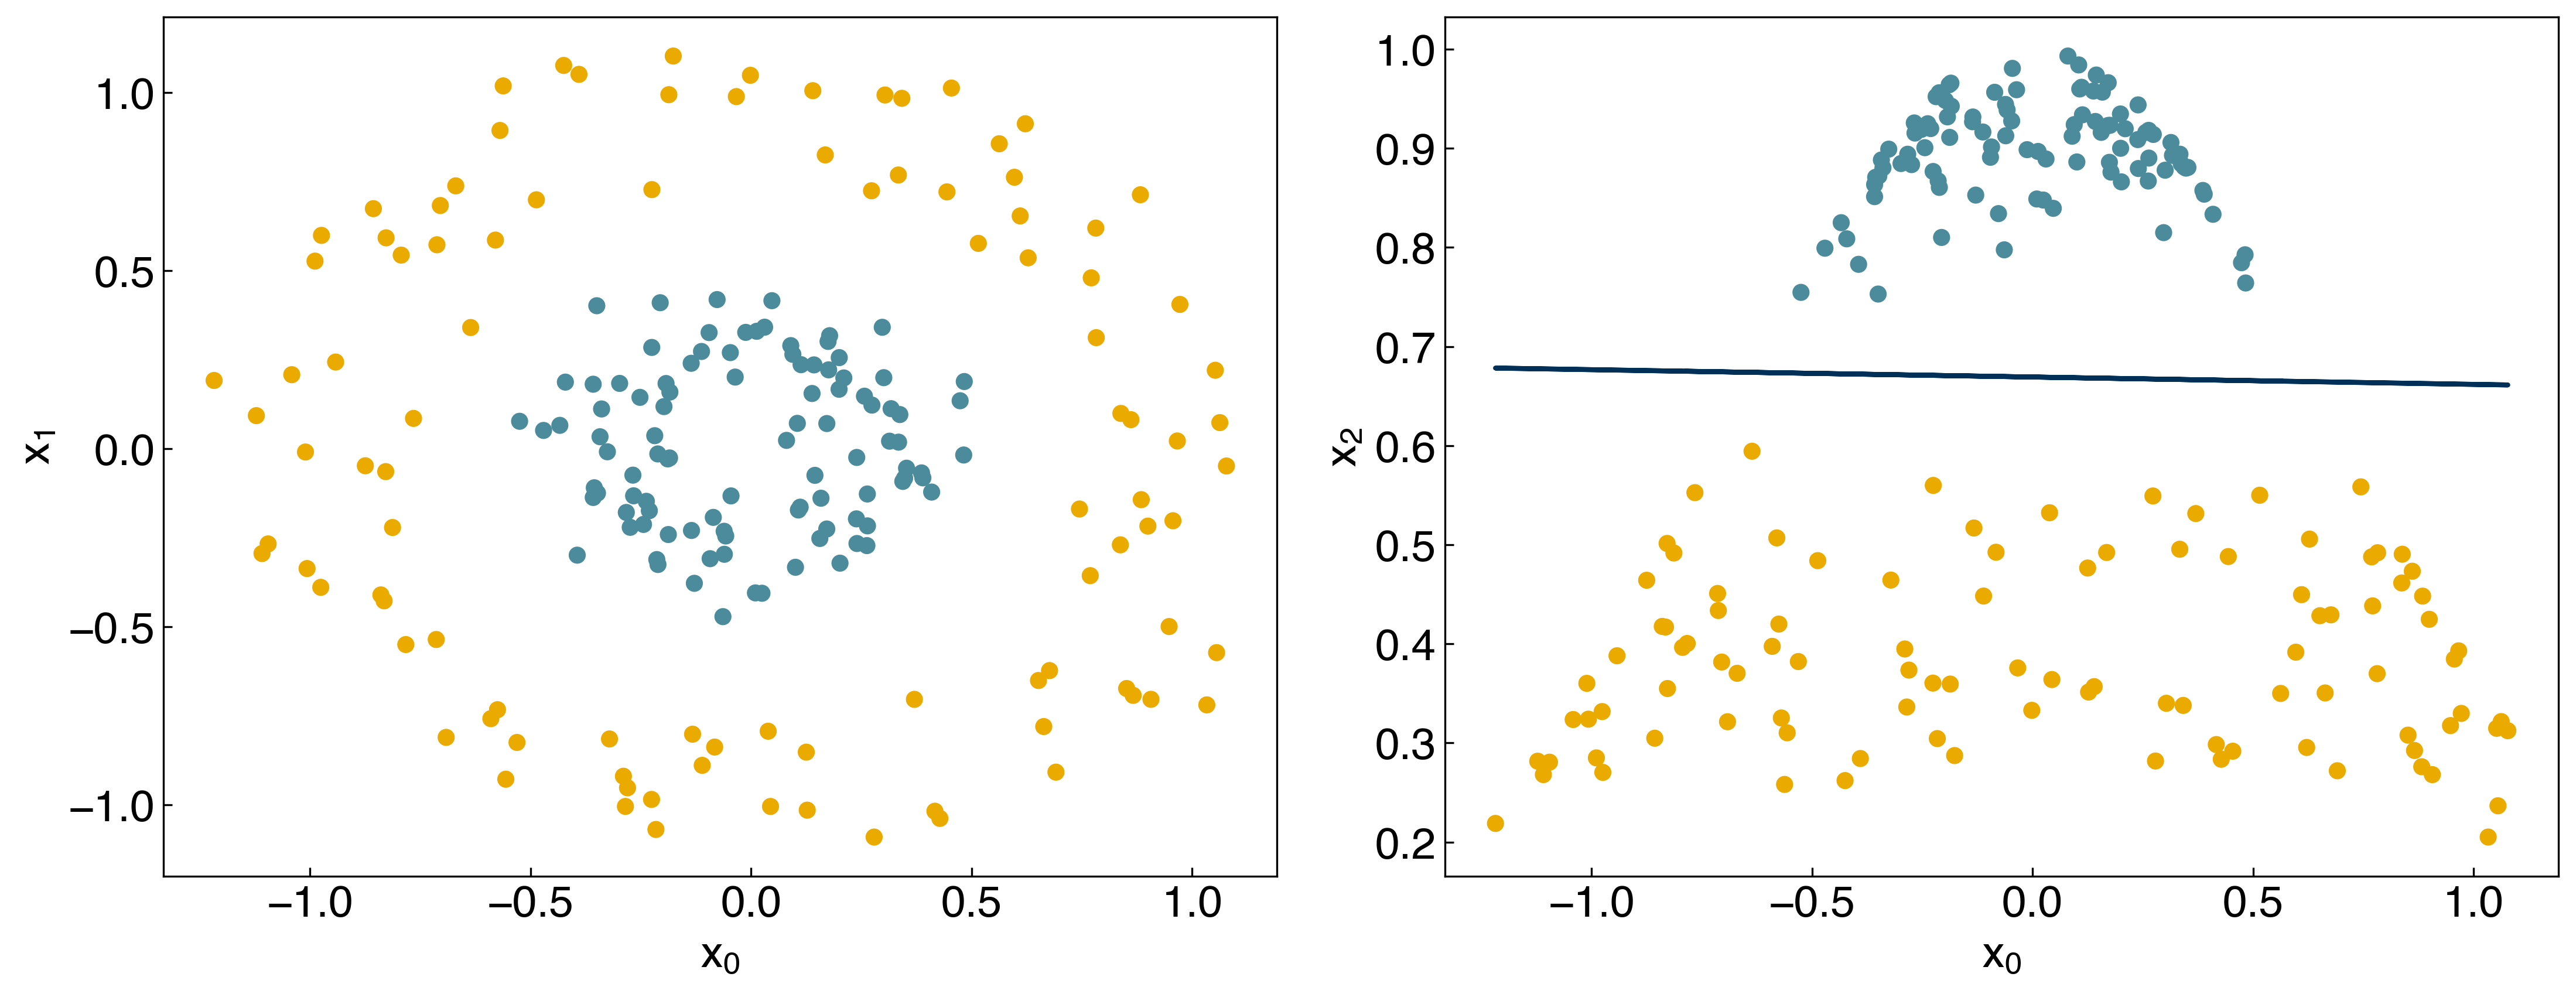

We can make this process easier and add regularization by using the SVM model from scikit-learn (note that it is called a support vector "classifier", or SVC). The kernel width is controlled by gamma, and the regularization strength is controlled by C:



In [ ]:
from sklearn.svm import SVC # "Support vector classifier"

model = SVC(kernel = 'rbf', gamma = 1, C = 1000)
model.fit(X, y)
y_predict = model.predict(X)

fig, axes = plt.subplots(1, 2, figsize = (15, 6))
axes[0].scatter(X[:, 0], X[:, 1], c = clrs[y])
axes[1].scatter(X[:, 0], X[:, 1], c = clrs[y_predict]);

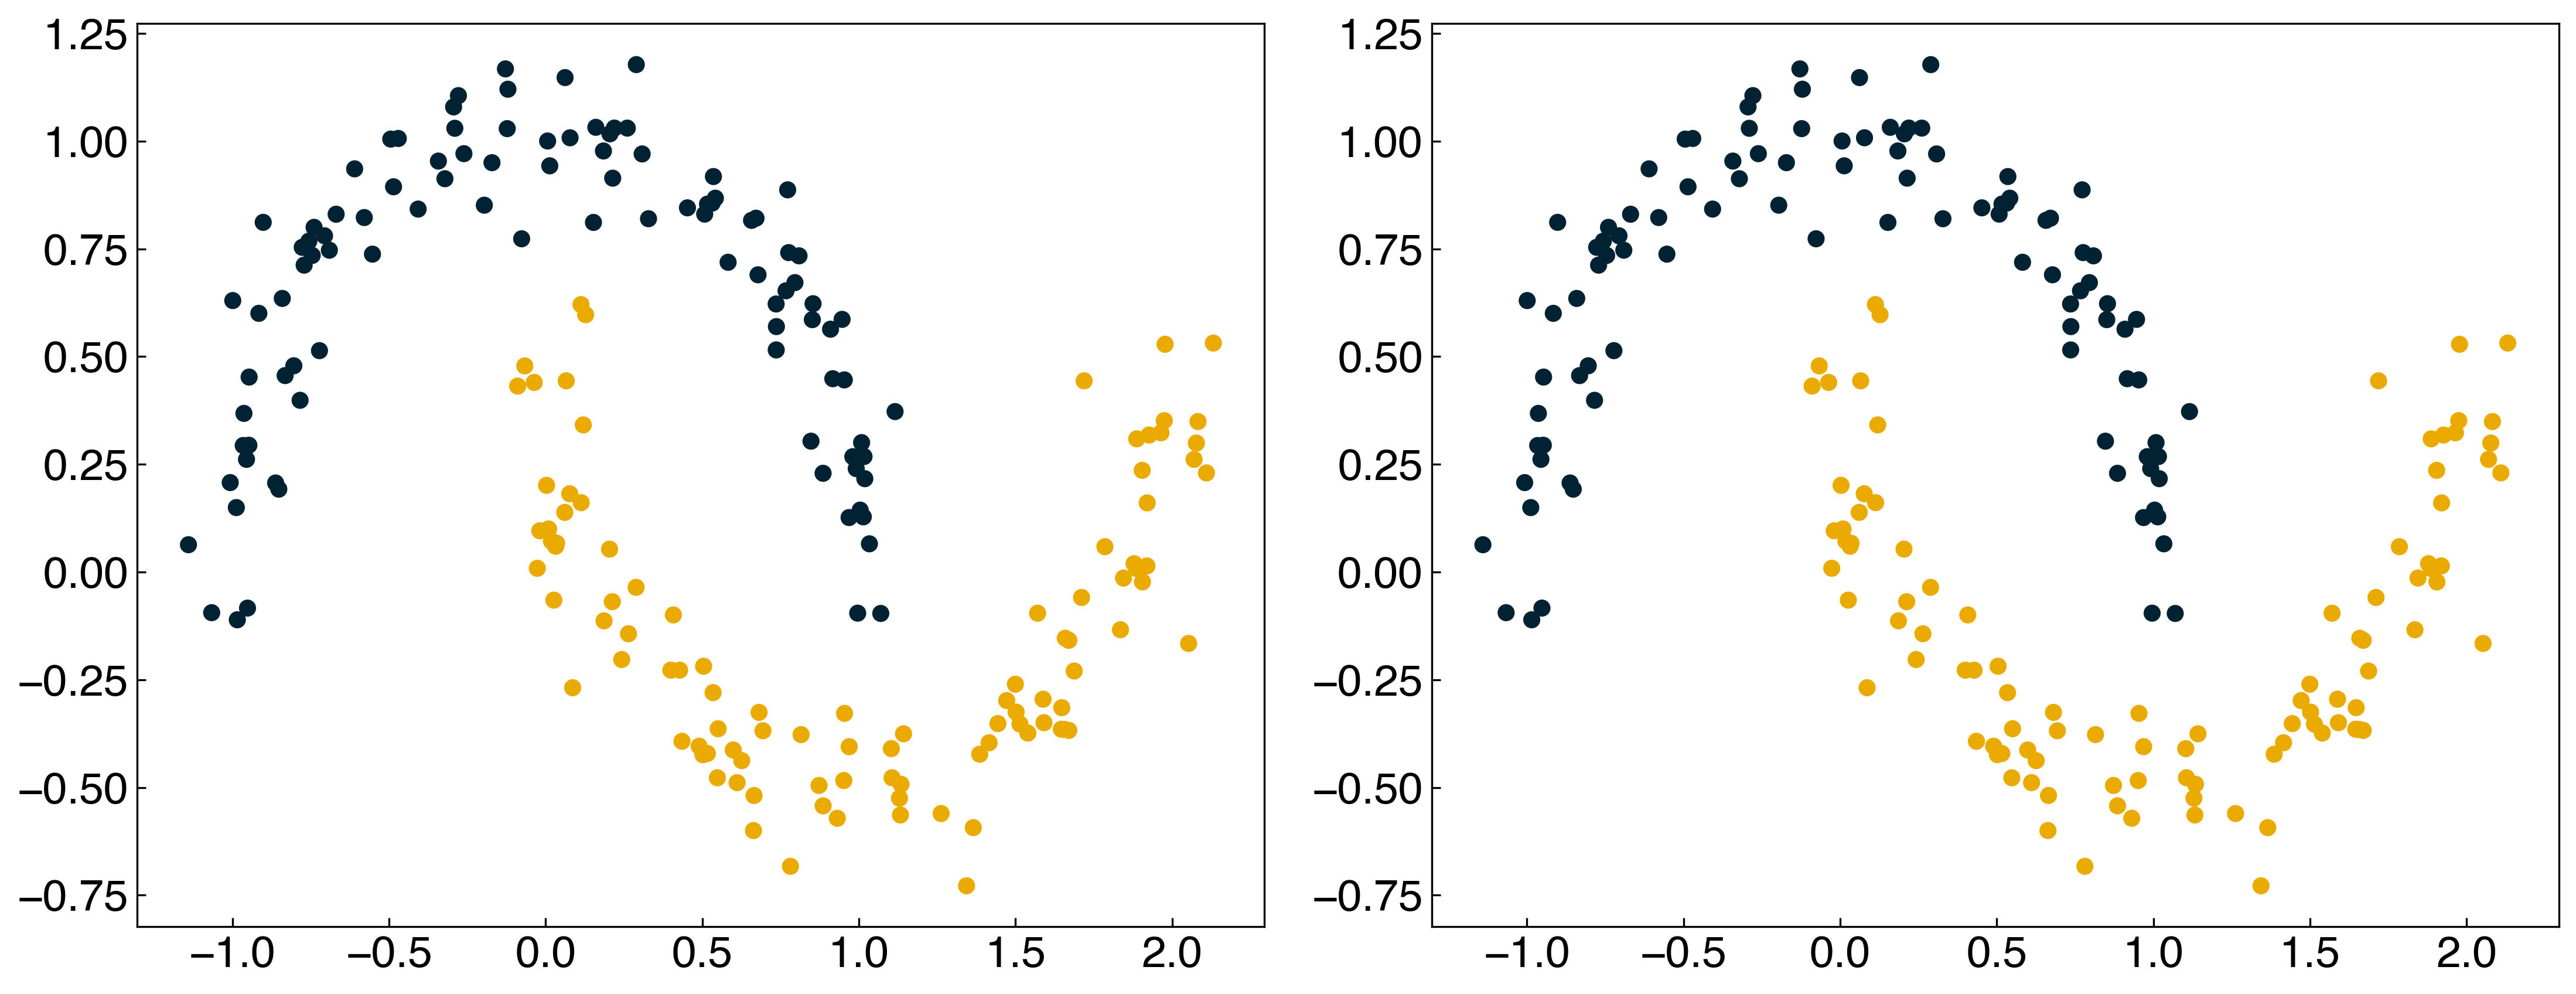

Note that there is a slight difference between the regularization strength in the SVC model and ridge regression. In the SVC model, the parameter C is inversely proportional to the regularization strength:



The function below will allow visualization of the decision boundary. You don't need to understand how it works, but should understand its output.



In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors = 'k',
               levels=[-1, 0, 1], alpha = 0.5,
               linestyles=['--', '-', '--'])
    if plot_support:
        # plot support vectors
        ax.scatter(model.support_vectors_[:, 0],
               model.support_vectors_[:, 1],
               s = 300, linewidth = 1, facecolors = 'none', edgecolors = 'k');
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Let's use this function to see how the decision boundary and the support vectors change as a function of C:



In [ ]:
fig, axes = plt.subplots(1,3, figsize=(8,3))

Cs = [1e-2, 1, 1e2]

for i, Ci in enumerate(Cs):
    model = SVC(kernel = 'rbf', gamma = 1, C = Ci)
    model.fit(X, y)
    y_predict = model.predict(X)
    ax_i = axes[i]
    ax_i.scatter(X[:, 0], X[:, 1], c = clrs[y_predict], s = 50, cmap = 'RdBu')
    plot_svc_decision_function(model, ax = ax_i)
    ax_i.set_title('C = {}'.format(Ci))

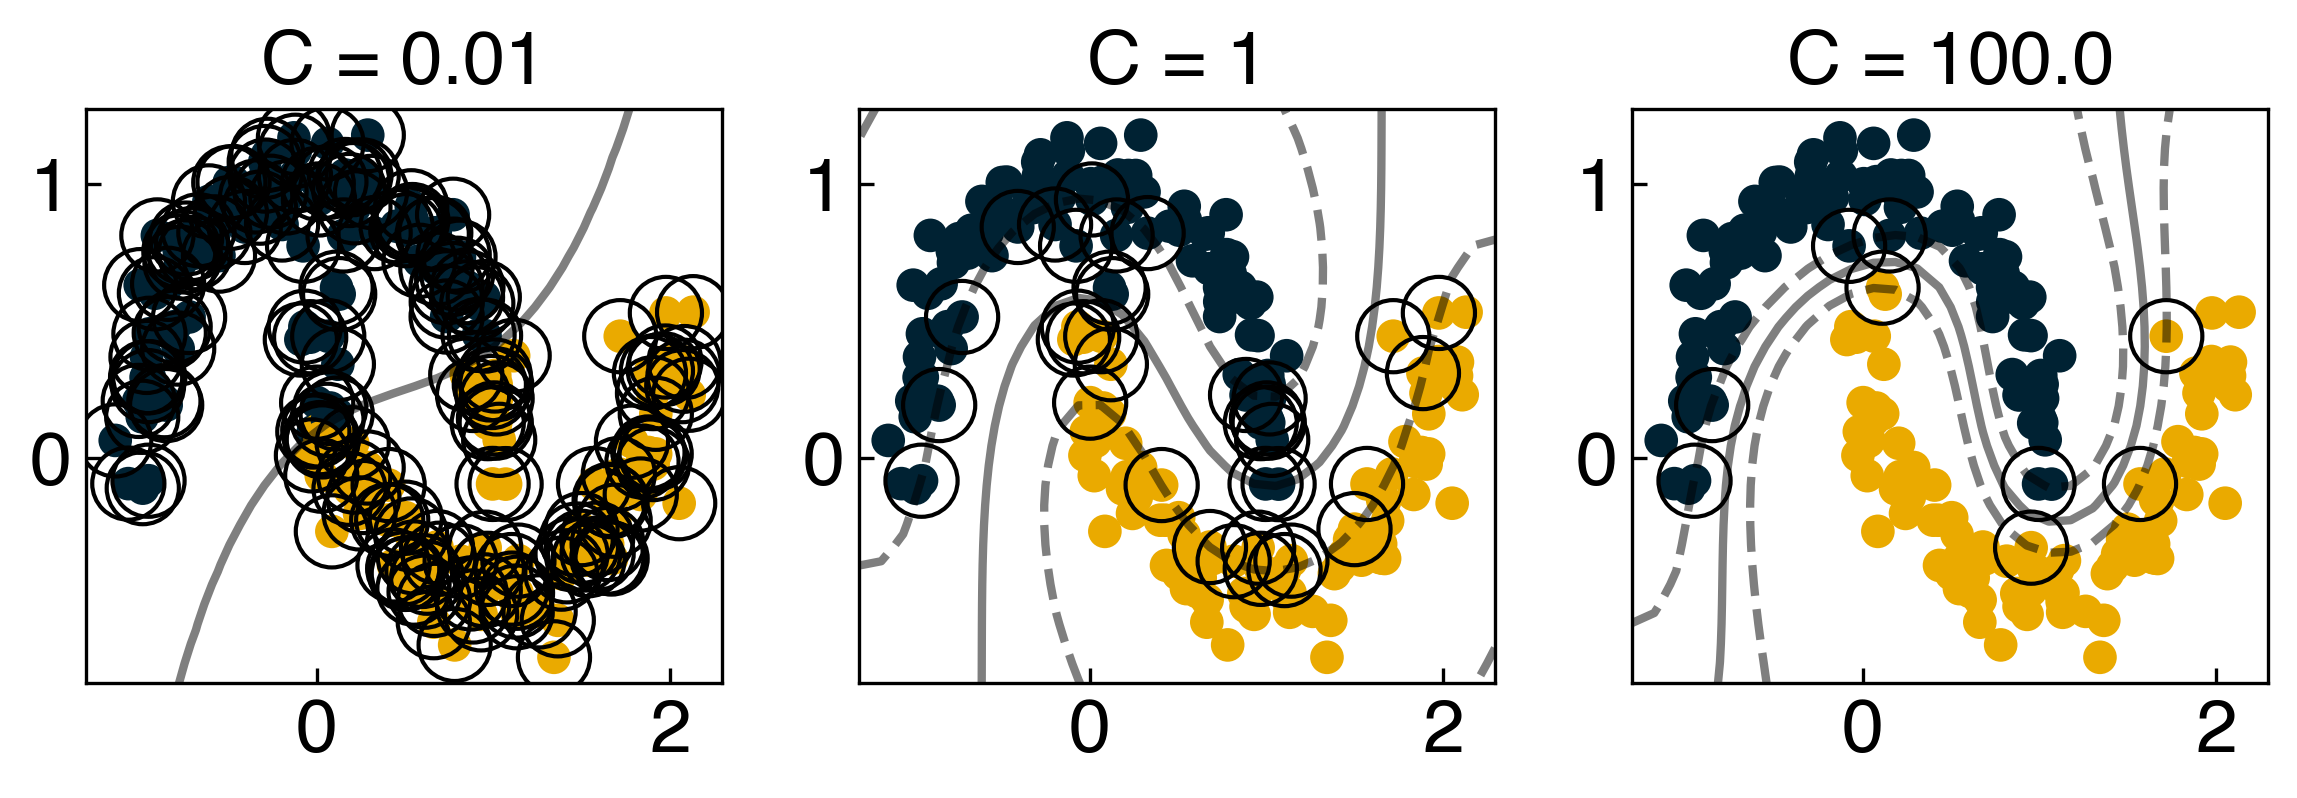

Discussion: How does the decision boundary change with $C$ and $\gamma$?

As C goes to infinity, a small margin is accepted so the decision boundary will be very complex.

The boundary will be complex as well if $\gamma$ goes to infinity. In this case, the boundaries will enclose just one data point. Look at the plots above and play with the values of C and gamma to get a better feel for how the boundary changes.

Note that there are more "support vectors" as C gets smaller (or as alpha gets larger). This is because when there is more regularization, more points are allowed to be in the "margins".

## k-Nearest Neighbors

An alternative non-linear classification method is the k-nearest neighbors algorithm. This operates on a principle that is very easy to understand: democracy.

The class of a point is determined by letting its k-nearest neighbors "vote" on which class it should be in. The point is assigned to whichever class has the most votes. In the case of a tie, k is decreased by 1 until the tie is broken.

The advantage of democracy is that it is "nonlinear" - we can distinguish classes with very complex structures.

We need 3 functions to implement kNN:

distance metric - calculate the distance between 2 points. We will use the Euclidean distance.
get neighbors - find the k points nearest to a given point.
assign class - poll the neighbors to assign the point to a class

In [ ]:

def distance(x1, x2):
    # we will use the numpy 2-norm to calculate Euclidean distance:
    return np.linalg.norm(x1 - x2, 2) #<- the 2 is optional here since 2 is the default.

In [ ]:
def get_neighbor_idxs(x, x_list, k):
    dist_pairs = []
    for i,xi in enumerate(x_list):
        dist = distance(x, xi)
        dist_pairs.append([dist, i, xi]) #<- gives us the distance for each point
    dist_pairs.sort() #<- sort by distance
    k_dists = dist_pairs[:k] #<- take the k closest points
    kNN_idxs = [i for di, i, xi in k_dists] #<- we will get the indices of neighbors instead of the point itself.
    return kNN_idxs

In [ ]:

from scipy.stats import mode

def assign_class(x, x_list, y_list, k): #<- now we need to know the responses
    neighbors = get_neighbor_idxs(x, x_list, k)
    y_list = list(y_list) #<- this ensures that indexing works properly if y_list is a `pandas` object.
    votes = [y_list[i] for i in neighbors]
    assignment = mode(votes)[0][0] #<- we won't deal with ties for this simple implementation
    return assignment

In [ ]:
#Now we can "wrap" all of these functions into a single function that predicts the class of an array of points:
def kNN(X, k, X_train, y_train):
    y_out = []
    for xi in X:
        y_out.append(assign_class(xi, X_train, y_train, k))
    y_out = np.array(y_out)
    return y_out

In [ ]:

X = X_moons
y = y_moons

y_knn = kNN(X, 20, X, y)

fig, axes = plt.subplots(1, 2, figsize = (15, 6))
axes[0].scatter(X[:, 0], X[:, 1], c = clrs[y])
axes[0].set_title('Original Data')
axes[1].scatter(X[:, 0], X[:, 1], c = clrs[y_knn])
axes[1].set_title('kNN prediction (k = 20)');

In [ ]:
#Let's try to visualize the model:

def visualize_neighbors(X, X_train, k):
    ## helper function to visualize neighbors
    fig, ax = plt.subplots()
    ax.scatter(X[:, 0], X[:, 1], color = 'k', alpha = 0.2)
    ax.scatter(X_train[:, 0], X_train[:, 1], color = 'r', alpha = 0.2)
    for xi in X:
        neighbors = get_neighbor_idxs(xi, X_train, k)
        for nj in neighbors:
            xj = X_train[nj]
            ax.plot([xi[0], xj[0]], [xi[1], xj[1]], ls = '-', color = 'b', alpha = 0.2)

In [ ]:
visualize_neighbors(X, X, 20)


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

y_knn = kNN(X_test, 20, X_train, y_train)

fig, axes = plt.subplots(1, 2, figsize = (15, 6))
axes[0].scatter(X_test[:,0], X_test[:,1], c = clrs[y_test])
axes[0].set_title('Testing Set')
axes[1].scatter(X_test[:, 0], X_test[:, 1], c = clrs[y_knn])
axes[1].set_title('kNN prediction (k = 20)');

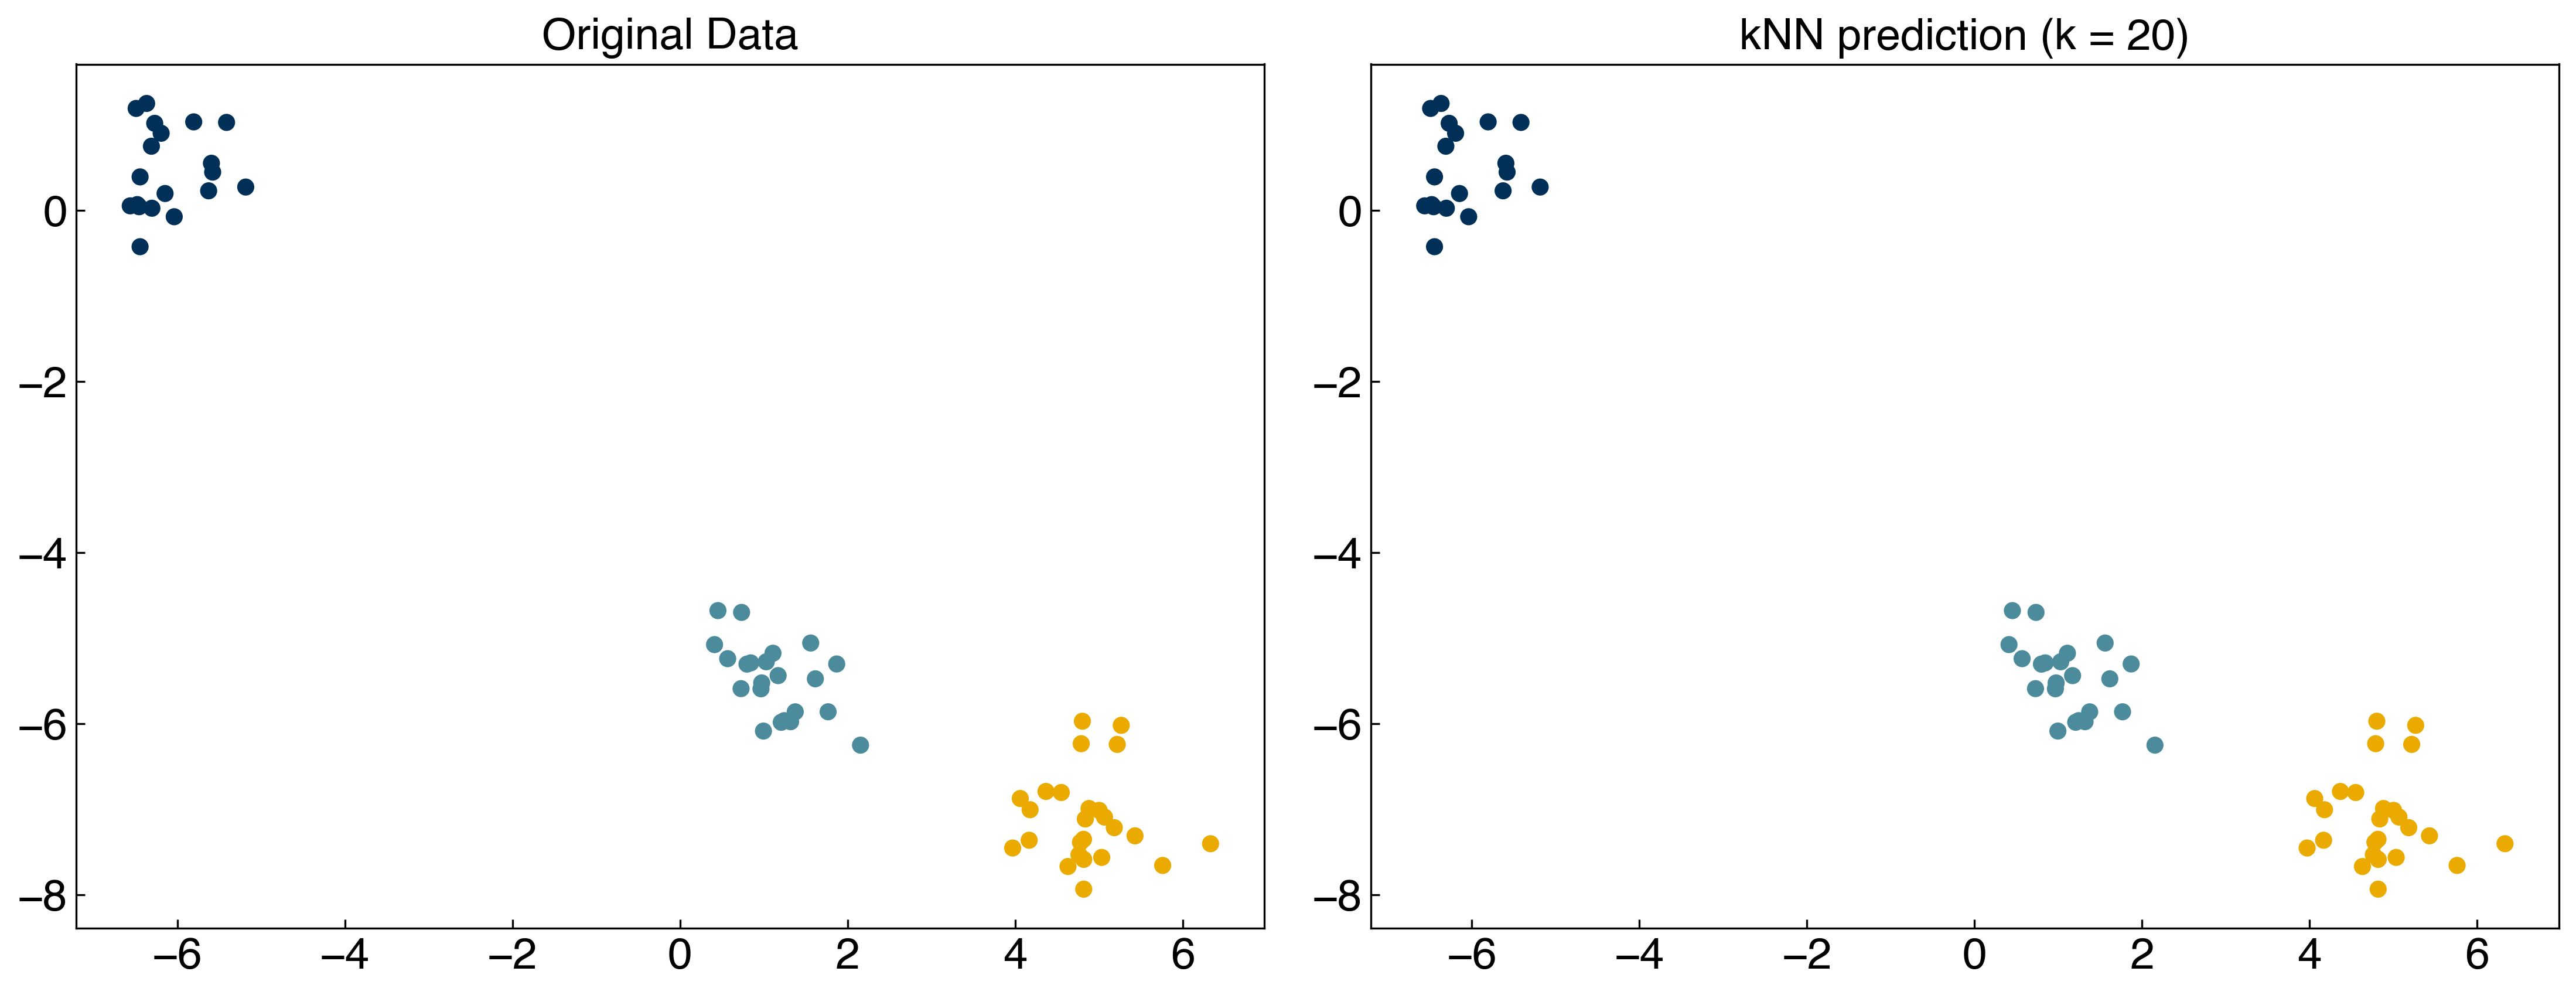

In [ ]:
#kNN model to trian and optimize hyperparameters
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X, y)
y_predict = knn.predict(X)

fig, axes = plt.subplots(1, 2, figsize = (15, 6))
axes[0].scatter(X[:, 0], X[:, 1], c = clrs[y])

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axes[1].contourf(xx, yy, Z, alpha = 0.4)
axes[1].scatter(X[:, 0], X[:, 1], c = clrs[y_predict])
axes[0].set_title('Original Data')
axes[1].set_title('kNN Prediction (k = 20)');

## Decision Trees
Decision trees are a very powerful type of discriminative classification algorithm, and they are relatively easy to interpret. They also have the advantage of working well with discrete input variables (e.g. discrete feature spaces). Essentially, a decision tree checks each input variable and attempts to make a discrete "cut" in that variable to decide which class it belongs in. It then repeates this process with other variables until the training data can be separated into the correct classes. In a sense, it breaks the problem into a lot of 1-dimensional classification models and repeats the process recursively. The way that the decision point is determined is slightly different than what we saw for generalized linear models, and is usually based on information theory concepts like gini criteria or information entropy. We will not go into the details here.

The disadvantage of decision trees is that they are very prone to over-fitting, because variables can be used more than once. The "Random forest" approach overcomes this by training an ensemble of decision trees with subsets of the data (similar to the "bootstrapping" we saw before) and using this ensemble of models to produce an estimate.

We will not go into the theory of decision trees here, but we will show a brief example using the toy datasets with the scikit-learn implementation.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [ ]:
X = X_mc
y = y_mc

In [ ]:
tree.fit(X, y)
y_tree = tree.predict(X)

fig, axes = plt.subplots(1, 2, figsize = (15, 6))
axes[0].scatter(X[:, 0], X[:, 1], c = clrs[y])

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axes[1].contourf(xx, yy, Z, alpha = 0.4)
axes[1].scatter(X[:, 0], X[:, 1], c = clrs[y_tree])

bottom, top = axes[0].get_ylim()
axes[1].set_ylim(bottom, top)

left, right = axes[0].get_xlim()
axes[1].set_xlim(left, right)

axes[0].set_title('Original Data')
axes[1].set_title('Decision Tree Prediction');

In [ ]:
from io import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(tree, out_file = dot_data,  
                filled = True, rounded = True,
                special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())